The central domain of the small subunit RNA (16S rRNA) from Thermus thermophilus. PDB: 1J5E

562C - 913A (E. Coli numbering)  
(6 residues missing from 842 to 847 )

1 - 346

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
#from matplotlib.colors import LogNorm
#import matplotlib.patches as mpatches
import numpy as np

plt.rc('text', usetex=True)  # To use bold font in LaTeX
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"] # To use bold font in LaTeX
plt.rcParams['figure.autolayout']=True
plt.rcParams['figure.figsize'] = 4, 3
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] ='Arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = 1.0
plt.rcParams['ytick.major.width'] = 1.0
plt.rcParams['font.size'] = 8
plt.rcParams['axes.linewidth'] = 1.0
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.pad_inches'] = 0.05
plt.rcParams['savefig.transparent'] = True

In [6]:
INITIAL_RUN = False

# Global setting

In [7]:
###############################################
####  RUN THIS WHENEVER RESTART THE KERNEL  ###
###############################################

import os
import glob

dat_format = 'nd1/%s_16SCD_EPS_Mg_Cl_K_D0.850_E3.975_d6.500_T0.615_cM%6.4f_f0.050_%s.dat'
kT = 0.615

### Restore
cMs = [0.0,
 0.0001,
 0.0002,
 0.0004,
 0.0006,
 0.0008,
 0.001,
 0.0012,
 0.0015,
 0.002,
 0.0025,
 0.003,
 0.004,
 0.005,
 0.01,
 0.02,
 0.03]


# %store -r cMs
# %store -r cM_s_lines
# %store -r Rg_ave
# %store -r cM_nMgs
# %store -r cM_nKs
# %store -r cM_nCls
# %store -r cM_nmps

In [8]:
###############################################################
####  RUN THIS ONLY WHEN YOU CHANGE ANY OF THESE VARIABLES  ###
###############################################################

%store cMs  > Analysis_storedvalues_cMs.txt
%store cM_s_lines  > Analysis_storedvalues_cM_s_lines.txt
%store Rg_ave  > Analysis_storedvalues_ave.txt
%store cM_nMgs  > Analysis_storedvalues_nMgs.txt
%store cM_nKs  > Analysis_storedvalues_nKs.txt
%store cM_nCls  > Analysis_storedvalues_nCls.txt
%store cM_nmps  > Analysis_storedvalues_nmps.txt

Writing 'cMs' (list) to file 'Analysis_storedvalues_cMs.txt'.
Writing 'cM_s_lines' (dict) to file 'Analysis_storedvalues_cM_s_lines.txt'.
Writing 'Rg_ave' (list) to file 'Analysis_storedvalues_ave.txt'.
Writing 'cM_nMgs' (dict) to file 'Analysis_storedvalues_nMgs.txt'.
Writing 'cM_nKs' (dict) to file 'Analysis_storedvalues_nKs.txt'.
Writing 'cM_nCls' (dict) to file 'Analysis_storedvalues_nCls.txt'.
Writing 'cM_nmps' (dict) to file 'Analysis_storedvalues_nmps.txt'.


# Data check and load


In [2]:
!ls nd1/

16SCD.pdb
16SCD_16SCD_unprocessed_bonds.dat
16SCD_16SCD_unprocessed_stacks.dat
16SCD_Mg_Cl_K_COPY_fast.cpp
16SCD_Mg_Cl_K_COPY_fast.exe
16SCD_Mg_Cl_K_COPY_fast_DD.cpp
16SCD_Mg_Cl_K_COPY_fast_DD.exe
16SCD_Mg_Cl_K_NOCOPY_fast.exe
Analysis_16SCD_Mg_Cl_K.c
Analysis_16SCD_Mg_Cl_K.exe
Contacts_16SCD_EPS_Mg_Cl_K_D0.850_E3.975_d6.500_T0.615_cM0.0000_f0.050_s11113.dat
Contacts_16SCD_EPS_Mg_Cl_K_D0.850_E3.975_d6.500_T0.615_cM0.0000_f0.050_s11113_16.dat
Contacts_16SCD_EPS_Mg_Cl_K_D0.850_E3.975_d6.500_T0.615_cM0.0000_f0.050_s11113_17.dat
Contacts_16SCD_EPS_Mg_Cl_K_D0.850_E3.975_d6.500_T0.615_cM0.0000_f0.050_s11113_18.dat
Contacts_16SCD_EPS_Mg_Cl_K_D0.850_E3.975_d6.500_T0.615_cM0.0000_f0.050_s11117.dat
Contacts_16SCD_EPS_Mg_Cl_K_D0.850_E3.975_d6.500_T0.615_cM0.0000_f0.050_s11117_14.dat
Contacts_16SCD_EPS_Mg_Cl_K_D0.850_E3.975_d6.500_T0.615_cM0.0000_f0.050_s11117_15.dat
Contacts_16SCD_EPS_Mg_Cl_K_D0.850_E3.975_d6.500_T0.615_cM0.0000_f0.050_s11117_16.dat
Contacts_16SCD_EPS_Mg_Cl_K_D0.850_E3.975_d6.500

Energies_16SCD_EPS_Mg_Cl_K_D0.850_E3.975_d6.500_T0.615_cM0.0015_f0.050_s1117_398.dat
Energies_16SCD_EPS_Mg_Cl_K_D0.850_E3.975_d6.500_T0.615_cM0.0015_f0.050_s1117_399.dat
Energies_16SCD_EPS_Mg_Cl_K_D0.850_E3.975_d6.500_T0.615_cM0.0015_f0.050_s1117_400.dat
Energies_16SCD_EPS_Mg_Cl_K_D0.850_E3.975_d6.500_T0.615_cM0.0015_f0.050_s1118.dat
Energies_16SCD_EPS_Mg_Cl_K_D0.850_E3.975_d6.500_T0.615_cM0.0015_f0.050_s1118_278.dat
Energies_16SCD_EPS_Mg_Cl_K_D0.850_E3.975_d6.500_T0.615_cM0.0015_f0.050_s1118_279.dat
Energies_16SCD_EPS_Mg_Cl_K_D0.850_E3.975_d6.500_T0.615_cM0.0015_f0.050_s1118_280.dat
Energies_16SCD_EPS_Mg_Cl_K_D0.850_E3.975_d6.500_T0.615_cM0.0015_f0.050_s112_600.dat
Energies_16SCD_EPS_Mg_Cl_K_D0.850_E3.975_d6.500_T0.615_cM0.0015_f0.050_s113_600.dat
Energies_16SCD_EPS_Mg_Cl_K_D0.850_E3.975_d6.500_T0.615_cM0.0015_f0.050_s114_600.dat
Energies_16SCD_EPS_Mg_Cl_K_D0.850_E3.975_d6.500_T0.615_cM0.0015_f0.050_s115_600.dat
Energies_16SCD_EPS_Mg_Cl_K_D0.850_E3.975_d6.500_T0.615_cM0.0015_f0.050_s1

In [44]:
!head nd1/Energies_16SCD_EPS_Mg_Cl_K_D0.850_E3.975_d6.500_T0.615_cM0.0000_f0.050_s11113.dat

-6.324415e+02 -1.748448e+02 -8.715562e+02 -1.631084e+02 7.488732e+01
-6.475700e+02 -1.796478e+02 -8.538056e+02 -1.428538e+02 6.956671e+01
-6.314667e+02 -1.610496e+02 -8.384416e+02 -1.599976e+02 6.979204e+01
-6.538838e+02 -1.735929e+02 -8.563188e+02 -1.500904e+02 6.898361e+01
-6.103330e+02 -1.844670e+02 -8.638695e+02 -1.766058e+02 7.172295e+01
-6.532034e+02 -1.717643e+02 -8.986673e+02 -1.553213e+02 7.061074e+01
-6.272586e+02 -1.695497e+02 -8.427560e+02 -1.644953e+02 7.141478e+01
-6.393244e+02 -1.913381e+02 -8.378771e+02 -1.684188e+02 6.525345e+01
-6.311273e+02 -1.826024e+02 -8.798991e+02 -1.617423e+02 7.043894e+01
-6.307953e+02 -1.679624e+02 -8.624985e+02 -1.639436e+02 7.438698e+01


### Energies file format

`16SCD_Mg_Cl_K_COPY_fast.cpp `
```C++
 fprintf ( f3, "%le %le %le %le %le\n", 
          erna [ s3_N + 1 ], erna [ s3_N + 2 ], erna [ 0 ], E3_STACK, radius_of_gyration ( 1, NTP_atom ) );
```

`nd1/Energies_16SCD_EPS_Mg_Cl_K_D0.850_E3.975_d6.500_T0.615_cM0.0000_f0.050_s11113.dat`
```
-6.324415e+02 -1.748448e+02 -8.715562e+02 -1.631084e+02 7.488732e+01
-6.475700e+02 -1.796478e+02 -8.538056e+02 -1.428538e+02 6.956671e+01
-6.314667e+02 -1.610496e+02 -8.384416e+02 -1.599976e+02 6.979204e+01
-6.538838e+02 -1.735929e+02 -8.563188e+02 -1.500904e+02 6.898361e+01
```



In [81]:
print ('#%5s  %6s  %6s  %6s' % ('cM', 'ID', 'subID', '#lines'))

cMs = []
cM_s_lines = {}

for filename in glob.glob('nd1/Energies*'):
    fsp = os.path.basename(filename)[:-4].split('_')
    
    ## Check all conditions below are same. No exception
    if fsp[1] != '16SCD':
        print f
    if fsp[2] != 'EPS':
        print f
    if fsp[3] != 'Mg':
        print f
    if fsp[4] != 'Cl':
        print f
    if fsp[5] != 'K':
        print f
    if fsp[6] != 'D0.850':
        print f
    if fsp[7] != 'E3.975':
        print f
    if fsp[8] != 'd6.500':
        print f
    if fsp[9] != 'T0.615':
        print f
    if fsp[11] != 'f0.050':
        print f
        
    # Count the number of lines
    nline = 0
    with open(filename) as f:
        for l in enumerate(f):
            nline += 1
    
    cM = fsp[10][2:]
    if float(cM) not in cMs:
        cMs.append(float(cM))
        cM_s_lines[float(cM)] = []

    if len(fsp) == 13:
        print ('%6s  %6s  %6s  %6i' % (cM, fsp[12], '-----', nline))
        cM_s_lines[float(cM)].append((fsp[12], nline))
    elif len(fsp) == 14:
        subID = fsp[13]
        print ('%6s  %6s  %6s  %6i' % (cM, fsp[12], subID, nline))
        if subID == '600':
            cM_s_lines[float(cM)].append((fsp[12]+'_600', nline))
    else:
        raise ValueError('len(fsp)=', len(fsp))

#   cM      ID   subID  #lines
0.0000  s11113      16      80
0.0000  s11113      17      85
0.0000  s11113      18      90
0.0000  s11113   -----      91
0.0000  s11117      14      70
0.0000  s11117      15      75
0.0000  s11117      16      80
0.0000  s11117   -----      81
0.0000  s11118      14      70
0.0000  s11118      15      75
0.0000  s11118      16      80
0.0000  s11118   -----      80
0.0000   s1112     212    1060
0.0000   s1112     213    1065
0.0000   s1112     214    1070
0.0000   s1112   -----    1072
0.0000   s1113     600    3000
0.0000   s1114      86     430
0.0000   s1114      87     435
0.0000   s1114      88     440
0.0000   s1114   -----     440
0.0000   s1115     319    1595
0.0000   s1115     320    1600
0.0000   s1115     321    1605
0.0000   s1115   -----    1609
0.0000   s1116      62     310
0.0000   s1116      63     315
0.0000   s1116      64     320
0.0000   s1116   -----     320
0.0000   s1117     600    3000
0.0000   s1118     600    3000
0.0000  

0.0008   s1116      58     290
0.0008   s1116      59     295
0.0008   s1116   -----     296
0.0008   s1117     538    2690
0.0008   s1117     539    2695
0.0008   s1117     540    2700
0.0008   s1117   -----    2700
0.0008   s1118     600    3000
0.0008    s112     600    3000
0.0008    s113     600    3000
0.0008    s114     600    3000
0.0008    s115     600    3000
0.0008    s116     600    3000
0.0008    s117     600    3000
0.0008    s118     600    3000
0.0008     s12     600    3000
0.0008     s13     600    3000
0.0008     s14     600    3000
0.0008     s15     600    3000
0.0008     s16     600    3000
0.0008     s17     600    3000
0.0008     s18     600    3000
0.0008      s2     600    3000
0.0008      s3     600    3000
0.0008      s4     600    3000
0.0008      s5     600    3000
0.0008      s6     600    3000
0.0008      s7     600    3000
0.0008      s8     600    3000
0.0010  s11116      12      60
0.0010  s11116      13      65
0.0010  s11116      14      70
0.0010  

0.0030    s118     600    3000
0.0030     s12     600    3000
0.0030     s13     600    3000
0.0030     s14     600    3000
0.0030     s15     600    3000
0.0030     s16     600    3000
0.0030     s17     600    3000
0.0030     s18     600    3000
0.0030      s2     600    3000
0.0030      s3     600    3000
0.0030      s4     600    3000
0.0030      s5     600    3000
0.0030      s6     600    3000
0.0030      s7     600    3000
0.0030      s8     600    3000
0.0040   s1112     286    1430
0.0040   s1112     287    1435
0.0040   s1112     288    1440
0.0040   s1112   -----    1440
0.0040   s1113     293    1465
0.0040   s1113     294    1470
0.0040   s1113     295    1475
0.0040   s1113   -----    1476
0.0040   s1114     145     725
0.0040   s1114     146     730
0.0040   s1114     147     735
0.0040   s1114   -----     739
0.0040   s1115     329    1645
0.0040   s1115     330    1650
0.0040   s1115     331    1655
0.0040   s1115   -----    1657
0.0040   s1116      10      50
0.0040  

ValueError: could not convert string to float: all

In [82]:
print ('%6s  %6s' % ('[Mg]', '#lines'))
for cM in cMs:
    print ('%.4f  %6i' % (cM, sum([n for (s,n) in cM_s_lines[cM]])))

  [Mg]  #lines
0.0000   75693
0.0001   77201
0.0002   75400
0.0004   74358
0.0006   73763
0.0008   75989
0.0010   75053
0.0012   55210
0.0015   77508
0.0020   81423
0.0025   77087
0.0030   74295
0.0040   70229
0.0050   66359
0.0100   62969
0.0200   58960
0.0300   57850


In [36]:
!head -5 nd1/Energies_16SCD_EPS_Mg_Cl_K_D0.850_E3.975_d6.500_T0.615_cM0.0000_f0.050_s11113.dat

-6.324415e+02 -1.748448e+02 -8.715562e+02 -1.631084e+02 7.488732e+01
-6.475700e+02 -1.796478e+02 -8.538056e+02 -1.428538e+02 6.956671e+01
-6.314667e+02 -1.610496e+02 -8.384416e+02 -1.599976e+02 6.979204e+01
-6.538838e+02 -1.735929e+02 -8.563188e+02 -1.500904e+02 6.898361e+01
-6.103330e+02 -1.844670e+02 -8.638695e+02 -1.766058e+02 7.172295e+01


In [38]:
!head -5 nd1/Energies_16SCD_EPS_Mg_Cl_K_D0.850_E3.975_d6.500_T0.615_cM0.0000_f0.050_s11113_16.dat

-6.324415e+02 -1.748448e+02 -8.715562e+02 -1.631084e+02 7.488732e+01
-6.475700e+02 -1.796478e+02 -8.538056e+02 -1.428538e+02 6.956671e+01
-6.314667e+02 -1.610496e+02 -8.384416e+02 -1.599976e+02 6.979204e+01
-6.538838e+02 -1.735929e+02 -8.563188e+02 -1.500904e+02 6.898361e+01
-6.103330e+02 -1.844670e+02 -8.638695e+02 -1.766058e+02 7.172295e+01


In [106]:
!head -5 nd1/Energies_16SCD_EPS_Mg_Cl_K_D0.850_E3.975_d6.500_T0.615_cM0.0000_f0.050_s11113_17.dat

-6.324415e+02 -1.748448e+02 -8.715562e+02 -1.631084e+02 7.488732e+01
-6.475700e+02 -1.796478e+02 -8.538056e+02 -1.428538e+02 6.956671e+01
-6.314667e+02 -1.610496e+02 -8.384416e+02 -1.599976e+02 6.979204e+01
-6.538838e+02 -1.735929e+02 -8.563188e+02 -1.500904e+02 6.898361e+01
-6.103330e+02 -1.844670e+02 -8.638695e+02 -1.766058e+02 7.172295e+01


In [107]:
!head -5 nd1/Energies_16SCD_EPS_Mg_Cl_K_D0.850_E3.975_d6.500_T0.615_cM0.0000_f0.050_s11113_18.dat

-6.324415e+02 -1.748448e+02 -8.715562e+02 -1.631084e+02 7.488732e+01
-6.475700e+02 -1.796478e+02 -8.538056e+02 -1.428538e+02 6.956671e+01
-6.314667e+02 -1.610496e+02 -8.384416e+02 -1.599976e+02 6.979204e+01
-6.538838e+02 -1.735929e+02 -8.563188e+02 -1.500904e+02 6.898361e+01
-6.103330e+02 -1.844670e+02 -8.638695e+02 -1.766058e+02 7.172295e+01


^^^ Head of files are all the same.

In [45]:
!tail -6 nd1/Energies_16SCD_EPS_Mg_Cl_K_D0.850_E3.975_d6.500_T0.615_cM0.0000_f0.050_s11113.dat

-6.576780e+02 -1.780212e+02 -8.525909e+02 -1.617552e+02 6.290844e+01
-6.194627e+02 -1.894868e+02 -8.394242e+02 -1.678238e+02 6.331537e+01
-6.743916e+02 -1.833422e+02 -8.882710e+02 -1.477717e+02 6.338122e+01
-6.460578e+02 -1.771303e+02 -8.562011e+02 -1.643978e+02 6.639833e+01
-6.466646e+02 -1.786656e+02 -8.743945e+02 -1.626936e+02 6.901175e+01
-6.379413e+02 -1.751286e+02 -8.340908e+02 -1.591114e+02 6.963014e+01


In [46]:
!tail -6 nd1/Energies_16SCD_EPS_Mg_Cl_K_D0.850_E3.975_d6.500_T0.615_cM0.0000_f0.050_s11113_16.dat

-6.248503e+02 -1.961726e+02 -8.374344e+02 -1.591190e+02 6.054561e+01
-6.247459e+02 -1.967829e+02 -8.593434e+02 -1.655242e+02 5.965546e+01
-6.608610e+02 -1.727634e+02 -8.390181e+02 -1.707720e+02 6.207178e+01
-6.562600e+02 -2.031451e+02 -8.766599e+02 -1.708951e+02 6.108430e+01
-6.427382e+02 -1.687814e+02 -8.829785e+02 -1.576647e+02 6.511501e+01
-6.381071e+02 -1.807940e+02 -8.363451e+02 -1.689944e+02 6.435595e+01


In [47]:
!tail -6 nd1/Energies_16SCD_EPS_Mg_Cl_K_D0.850_E3.975_d6.500_T0.615_cM0.0000_f0.050_s11113_17.dat

-6.381071e+02 -1.807940e+02 -8.363451e+02 -1.689944e+02 6.435595e+01
-6.266363e+02 -1.633205e+02 -8.427390e+02 -1.518487e+02 6.849365e+01
-6.369168e+02 -1.815894e+02 -8.677627e+02 -1.577864e+02 6.701908e+01
-6.574098e+02 -1.946425e+02 -8.889600e+02 -1.641692e+02 6.874518e+01
-6.417357e+02 -1.523188e+02 -9.344062e+02 -1.592586e+02 6.640449e+01
-6.414706e+02 -1.790134e+02 -9.044829e+02 -1.483232e+02 6.710506e+01


In [48]:
!tail -6 nd1/Energies_16SCD_EPS_Mg_Cl_K_D0.850_E3.975_d6.500_T0.615_cM0.0000_f0.050_s11113_18.dat

-6.414706e+02 -1.790134e+02 -9.044829e+02 -1.483232e+02 6.710506e+01
-6.576780e+02 -1.780212e+02 -8.525909e+02 -1.617552e+02 6.290844e+01
-6.194627e+02 -1.894868e+02 -8.394242e+02 -1.678238e+02 6.331537e+01
-6.743916e+02 -1.833422e+02 -8.882710e+02 -1.477717e+02 6.338122e+01
-6.460578e+02 -1.771303e+02 -8.562011e+02 -1.643978e+02 6.639833e+01
-6.466646e+02 -1.786656e+02 -8.743945e+02 -1.626936e+02 6.901175e+01


^^^ The tails of files are incremented 5 lines every files for `s11113_16.dat`, `s11113_17.dat`, and `_18s11113_18.dat` files, and lastly one more line is added to `_s11113.dat` file.

### The naming rule of dat files

* The first digit of ID is `s`.
* The last digit of ID is for the random seed which is any number between `2` and `8`.
* The digit of ID increases by additional "1" like `s2` -> `s12` -> `s112` -> `s1112` ...
* Some files have sub-ID which follows after an underscore like `s1112_12.dat`, `s1112_13.dat`, `s1112_14.dat`.
  These are residual files from on-going simulations.
  Most cases, data in those files are already merged to the main result file, like `s1112.dat` in the above case.
* Completed trajectory files have sub-ID of `_600.dat`.


* Use `s1*X_600.dat` and `s1*X.dat`.  Do not use `s1*X_xxx.dat` if `xxx` is not `600` (these are residual files).


In [84]:
for filename in glob.glob('nd1/Contacts*'):
    fsp = os.path.basename(filename)[:-4].split('_')
    
    ## Check all conditions below are same. No exception
    if fsp[1] != '16SCD':
        print f
    if fsp[2] != 'EPS':
        print f
    if fsp[3] != 'Mg':
        print f
    if fsp[4] != 'Cl':
        print f
    if fsp[5] != 'K':
        print f
    if fsp[6] != 'D0.850':
        print f
    if fsp[7] != 'E3.975':
        print f
    if fsp[8] != 'd6.500':
        print f
    if fsp[9] != 'T0.615':
        print f
    if fsp[11] != 'f0.050':
        print f
        
    # Count the number of lines
    nline = 0
    with open(filename) as f:
        for l in enumerate(f):
            nline += 1
    
    cM = fsp[10][2:]
    if float(cM) not in cMs:
        cMs.append(float(cM))
        cM_s_lines[float(cM)] = []

    if len(fsp) == 13:
        #print ('%6s  %6s  %6s  %6i' % (cM, fsp[12], '-----', nline))
        if (fsp[12], nline) not in cM_s_lines[float(cM)]:
            print ('(%s,%i) does not exist in cM_s_lines[%s])' % (fsp[12], nline, cM))
    elif len(fsp) == 14:
        subID = fsp[13]
        #print ('%6s  %6s  %6s  %6i' % (cM, fsp[12], subID, nline))
        if subID == '600':
            if (fsp[12]+'_600', nline) not in cM_s_lines[float(cM)]:
                print ('(%s,%i) does not exist in cM_s_lines[%s])' % (fsp[12], nline, cM))
    else:
        raise ValueError('len(fsp)=', len(fsp))

In [80]:
for filename in glob.glob('nd1/Coordinates*'):
    print os.path.getsize(filename)

6284160
6676920
7069680
7148232
5498640
5891400
6284160
6362712
5498640
5891400
6284160
6284160
83265120
83657880
84050640
84207744
235656000
33777360
34170120
34562880
34562880
125290440
125683200
126075960
126390168
24351120
24743880
25136640
25136640
235656000
235656000
235656000
235656000
235656000
235656000
235656000
235656000
235656000
235656000
235656000
235656000
235656000
235656000
235656000
235656000
235656000
235656000
235656000
235656000
235656000
235656000
235656000
1967400
2360880
2754360
2754360
236088
236088000
236088000
139291920
139685400
140078880
140393664
10623960
11017440
11410920
11410920
99550440
99943920
100337400
100337400
229398840
229792320
230185800
230343192
158965920
159359400
159752880
159910272
236088000
236088000
236088000
236088000
236088000
236088000
236088000
236088000
236088000
236088000
236088000
236088000
236088000
236088000
236088000
236088000
236088000
236088000
236088000
236088000
236088000
19728000
20122560
20517120
20753856
35115840
35510400

In [96]:
!cat nd1/Energies_16SCD_EPS_Mg_Cl_K_D0.850_E3.975_d6.500_T0.615_cMall_f0.050_sall.dat

0.000000e+00 -6.646667e+02 -1.838340e+02 -8.696353e+02 -1.620892e+02 6.626413e+01
2.000000e-04 -6.525785e+02 -2.072353e+02 -8.678415e+02 -1.731622e+02 6.626108e+01
4.000000e-04 -6.669695e+02 -2.128767e+02 -8.724075e+02 -1.757624e+02 6.540337e+01
6.000000e-04 -6.655217e+02 -2.126254e+02 -8.712617e+02 -1.763683e+02 6.493842e+01
8.000000e-04 -6.606950e+02 -2.170283e+02 -8.719202e+02 -1.782744e+02 6.487201e+01
1.000000e-03 -6.618192e+02 -2.261392e+02 -8.736453e+02 -1.825258e+02 6.445369e+01
1.200000e-03 -6.691135e+02 -2.308026e+02 -8.768927e+02 -1.849126e+02 6.357582e+01
1.500000e-03 -6.759426e+02 -2.252370e+02 -8.801649e+02 -1.837329e+02 6.293883e+01
2.000000e-03 -6.667893e+02 -2.475112e+02 -8.775192e+02 -1.945094e+02 6.116358e+01
3.000000e-03 -6.854598e+02 -2.942160e+02 -8.842719e+02 -2.188187e+02 5.590939e+01
4.000000e-03 -6.856904e+02 -3.542427e+02 -8.908075e+02 -2.316483e+02 4.928986e+01
5.000000e-03 -6.851604e+02 -3.805413e+02 -8.937562e+02 -2.367328e+02 4.694300e+01
1.000000e-02 -6.

## Number of ions

```c++
side_X = 350.0; side_Y = 350.0; side_Z = 350.0;
side_XYZ = side_X * side_Y * side_Z;
N_crwd [0] = (int) ( cM_crwd [0] * 6.022 * 0.0001 * side_XYZ );
N_crwd [2] = (int) ( cM_crwd [2] * 6.022 * 0.0001 * side_XYZ );
N_crwd [1] = 2 * N_crwd [0] + N_crwd [2] - ( NBP_atom - 1 ) / 2;


## cM = 0.0000 mM
RECORD   N_amino     691
RECORD   NBP_atom    691
RECORD   NB_atom    2926
RECORD   NTP_atom   1037
RECORD   NpTP_atom 538203
RECORD   NT_atom    3272
```




In [71]:
cM_nMgs = {}
cM_nKs = {}
cM_nCls = {}
cM_nmps = {}

print ('# nmp of the RNA: %i' % (345 * 3 + 2,))

side_XYZ = 350.0 * 350.0 * 350.0
print ('%6s  %5s  %5s  %5s  %5s' % ('cM', 'nMg', 'nK', 'nCl', 'nmp')) 
for cM in cMs:
    nMg = int( cM *6.022*0.0001*side_XYZ)
    nK  = int(0.05*6.022*0.0001*side_XYZ)
    nCl = 2 * nMg + nK - 345
    nmp = 345 * 3 + 2 + nMg + nK + nCl
    cM_nMgs[cM] = nMg
    cM_nCls[cM] = nCl
    cM_nKs[cM] = nK
    cM_nmps[cM] = nmp
    print ('%6.4f  %5i  %5i  %5i  %5i' % (cM, nMg, nK, nCl, nmp))

# nmp of the RNA: 1037
    cM    nMg     nK    nCl    nmp
0.0000      0   1290    945   3272
0.0001      2   1290    949   3278
0.0002      5   1290    955   3287
0.0004     10   1290    965   3302
0.0006     15   1290    975   3317
0.0008     20   1290    985   3332
0.0010     25   1290    995   3347
0.0012     30   1290   1005   3362
0.0015     38   1290   1021   3386
0.0020     51   1290   1047   3425
0.0025     64   1290   1073   3464
0.0030     77   1290   1099   3503
0.0040    103   1290   1151   3581
0.0050    129   1290   1203   3659
0.0100    258   1290   1461   4046
0.0200    516   1290   1977   4820
0.0300    774   1290   2493   5594


In [7]:
 os.path.getsize('nd1/Coordinates_16SCD_EPS_Mg_Cl_K_D0.850_E3.975_d6.500_T0.615_cM0.0000_f0.050_s112_600.dat')

235656000

In [31]:
235656000 / float(1290+945+(345*3+2+1))

72000.0

In [5]:
%cat 16SCD_16SCD_unprocessed_stacks.dat

In [6]:
!wc -l 16SCD_16SCD_unprocessed_stacks.dat

      49 16SCD_16SCD_unprocessed_stacks.dat


## Organizing data

* Convert `.dat` to `.dcd`
* Sort filenames (cM_s_lines).
* Concatenate `dcd`, `Energies`, and `Contacts`.

In [3]:
f_sh = open('coord2dcd.sh','w')
for cM in cMs:
    
    for (s,nline) in cM_s_lines[cM]:
         
        file_coord = dat_format % ('Coordinates', cM, s)
        file_dcd = 'dcd/cM%6.4f_%s.dcd' % (cM,s)
        
        f_sh.write ('coord2dcd.py %s %i %s\n' % (file_coord, nmps[cM], file_dcd) )
    
f_sh.close()

NameError: name 'cMs' is not defined

In [60]:
# sort cM_s_lines

new = {}

for cM in cMs:
    new = []

    for i in range(2,8+1):
        for n_i in range(0,10):
            query = '1'*n_i + ('%i' % (i,))
            
            for (s,lines) in cM_s_lines[cM]:
                if s.split('_')[0][1:] == query:
                    new.append((s, lines))
                    
    if len(new) != len(cM_s_lines[cM]):
        print cM
        print new
        print cM_s_lines[cM]
#cM_s_lines



0.0025
[('s2_600', 3000), ('s12_600', 3000), ('s112_600', 3000), ('s1112', 2036), ('s3_600', 3000), ('s13_600', 3000), ('s113_600', 3000), ('s1113', 1080), ('s4_600', 3000), ('s14_600', 3000), ('s114_600', 3000), ('s1114', 2789), ('s5_600', 3000), ('s15_600', 3000), ('s115_600', 3000), ('s1115', 1928), ('s6_600', 3000), ('s16_600', 3000), ('s116_600', 3000), ('s1116', 1224), ('s7_600', 3000), ('s17_600', 3000), ('s117_600', 3000), ('s1117', 971), ('s8_600', 3000), ('s18_600', 3000), ('s118_600', 3000), ('s1118', 1821)]
[('s0', 632), ('s1112', 2036), ('s1113', 1080), ('s1114', 2789), ('s1115', 1928), ('s1116', 1224), ('s1117', 971), ('s1118', 1821), ('s112_600', 3000), ('s113_600', 3000), ('s114_600', 3000), ('s115_600', 3000), ('s116_600', 3000), ('s117_600', 3000), ('s118_600', 3000), ('s12_600', 3000), ('s13_600', 3000), ('s14_600', 3000), ('s15_600', 3000), ('s16_600', 3000), ('s17_600', 3000), ('s18_600', 3000), ('s1', 387), ('s2_600', 3000), ('s3_600', 3000), ('s4_600', 3000), ('s

I found there are files named `s0` in cM=0.0025. 

Only 632 frames in `_s0.dat` ==> Ignore

```
nd1/Contacts_16SCD_EPS_Mg_Cl_K_D0.850_E3.975_d6.500_T0.615_cM0.0025_f0.050_s0.dat
nd1/Contacts_16SCD_EPS_Mg_Cl_K_D0.850_E3.975_d6.500_T0.615_cM0.0025_f0.050_s0_124.dat
nd1/Contacts_16SCD_EPS_Mg_Cl_K_D0.850_E3.975_d6.500_T0.615_cM0.0025_f0.050_s0_125.dat
nd1/Contacts_16SCD_EPS_Mg_Cl_K_D0.850_E3.975_d6.500_T0.615_cM0.0025_f0.050_s0_126.dat
nd1/Coordinates_16SCD_EPS_Mg_Cl_K_D0.850_E3.975_d6.500_T0.615_cM0.0025_f0.050_s0.dat
nd1/Coordinates_16SCD_EPS_Mg_Cl_K_D0.850_E3.975_d6.500_T0.615_cM0.0025_f0.050_s0_124.dat
nd1/Coordinates_16SCD_EPS_Mg_Cl_K_D0.850_E3.975_d6.500_T0.615_cM0.0025_f0.050_s0_125.dat
nd1/Coordinates_16SCD_EPS_Mg_Cl_K_D0.850_E3.975_d6.500_T0.615_cM0.0025_f0.050_s0_126.dat
nd1/Energies_16SCD_EPS_Mg_Cl_K_D0.850_E3.975_d6.500_T0.615_cM0.0025_f0.050_s0.dat
nd1/Energies_16SCD_EPS_Mg_Cl_K_D0.850_E3.975_d6.500_T0.615_cM0.0025_f0.050_s0_124.dat
nd1/Energies_16SCD_EPS_Mg_Cl_K_D0.850_E3.975_d6.500_T0.615_cM0.0025_f0.050_s0_125.dat
nd1/Energies_16SCD_EPS_Mg_Cl_K_D0.850_E3.975_d6.500_T0.615_cM0.0025_f0.050_s0_126.dat
```


In [70]:
# sort cM_s_lines

new = {}

for cM in cMs:
    new = []

    for i in range(2,8+1):
        for n_i in range(0,10):
            query = '1'*n_i + ('%i' % (i,))
            
            for (s,lines) in cM_s_lines[cM]:
                if s.split('_')[0][1:] == query:
                    new.append((s, lines))
                    
#     if len(new) != len(cM_s_lines[cM]):
#         print cM
#         print new
#         print cM_s_lines[cM]

    cM_s_lines[cM] = new


In [72]:
f_sh = open('dcd_concatenate.sh','w')
for cM in cMs:
    
    f_sh.write('dcd_concatenate_noskip.py')
    for (s,nline) in cM_s_lines[cM]:
         
        f_sh.write(' dcd/cM%6.4f_%s.dcd' % (cM,s))
        
    f_sh.write (' cM%6.4f.dcd >> dcd_concatenate.log\n' % (cM,) )
    
f_sh.close()


f_sh = open('Energies_concatenate.sh', 'w')
for cM in cMs:
    
    f_sh.write('cat')
    for (s,nline) in cM_s_lines[cM]:
         
         
        filename = dat_format % ('Energies', cM, s)
        f_sh.write(' %s' % (filename,))
        
    f_sh.write (' > dcd/cM%6.4f.energies\n' % (cM,) )
f_sh.close()


f_sh = open('Contacts_concatenate.sh', 'w')
for cM in cMs:
    
    f_sh.write('cat')
    for (s,nline) in cM_s_lines[cM]:
         
         
        filename = dat_format % ('Contacts', cM, s)
        f_sh.write(' %s' % (filename,))
        
    f_sh.write (' > dcd/cM%6.4f.contacts\n' % (cM,) )
f_sh.close()

In [73]:
!wc -l dcd/*.energies

   75693 dcd/cM0.0000.energies
   77201 dcd/cM0.0001.energies
   75400 dcd/cM0.0002.energies
   74358 dcd/cM0.0004.energies
   73763 dcd/cM0.0006.energies
   75989 dcd/cM0.0008.energies
   75053 dcd/cM0.0010.energies
   55210 dcd/cM0.0012.energies
   77508 dcd/cM0.0015.energies
   81423 dcd/cM0.0020.energies
   74849 dcd/cM0.0025.energies
   74295 dcd/cM0.0030.energies
   70229 dcd/cM0.0040.energies
   66359 dcd/cM0.0050.energies
   62969 dcd/cM0.0100.energies
   58960 dcd/cM0.0200.energies
   57850 dcd/cM0.0300.energies
 1207109 total


In [8]:
cM_nframe = {}
for cM in cMs:
    n = 0
    for (s, nline) in cM_s_lines[cM]:
        n += nline
    cM_nframe[cM] = n
    print ('%6.4f  %8i' % (cM, cM_nframe[cM]))

0.0000     75693
0.0001     77201
0.0002     75400
0.0004     74358
0.0006     73763
0.0008     75989
0.0010     75053
0.0012     55210
0.0015     77508
0.0020     81423
0.0025     74849
0.0030     74295
0.0040     70229
0.0050     66359
0.0100     62969
0.0200     58960
0.0300     57850


# Rg

In [7]:
if INITIAL_RUN:
    Rg_ave = []
    for cM in cMs:

        nfile = len(cM_s_lines[cM])

        #fig, axs = 

        Rg = []

        for (s,nline) in cM_s_lines[cM]:

            for l in open(dat_format % ('Energies', cM, s)):
                Rg.append(float(l.split()[-1]))
        print ('%6.4f  %6.3f' % (cM, sum(Rg)/float(len(Rg))))
        Rg_ave.append(sum(Rg)/float(len(Rg)))

else:
    Rg_ave =  [68.060, 67.640, 67.376, 67.427, 66.764, 66.582, 
               66.001, 65.665, 65.174, 63.682, 60.192, 58.225, 
               53.281, 46.182, 43.690, 43.263, 43.157]

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


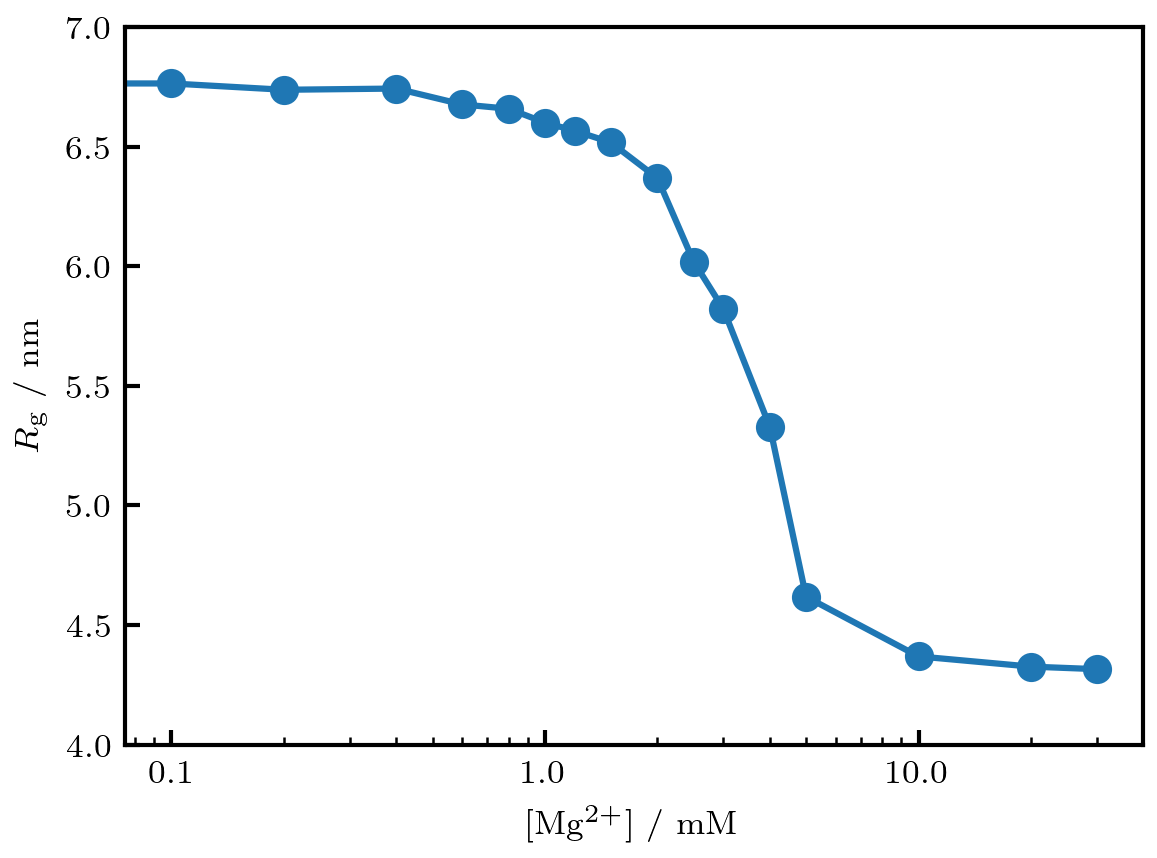

In [25]:
import matplotlib

fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(4, 3), dpi=300)
ax = axs

ax.plot([cM * 1000 for cM in cMs], [Rg * 0.1 for Rg in Rg_ave], 'o-')
ax.set_ylabel(r'$R_{\mathrm{g}}$ / nm')
ax.set_xlabel(r'[Mg$^{2+}$] / mM')

ax.set_ylim(4.0, 7.0)

ax.set_xscale('log')
ax.set_xticks([0.1, 1, 10])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

fig.savefig('Rg.pdf', dpi=300)

## Fit to Hill equation

In [8]:
def hill_equation(conc, n, mid):
    return conc**n / (mid**n + conc**n)

In [9]:
Rg_min = min(Rg_ave)
Rg_max = max(Rg_ave)
print('Rg_min = %f' % Rg_min)
print('Rg_max = %f' % Rg_max)

thetas = [-(Rg - Rg_min) / (Rg_max - Rg_min) + 1.0 for Rg in Rg_ave]
print(thetas)

Rg_min = 43.157000
Rg_max = 68.060000
[0.0, 0.016865437899048374, 0.027466570292735693, 0.025418624262136924, 0.05204192265992069, 0.05935027908284174, 0.08268080150985813, 0.09617315182909669, 0.11588965184917455, 0.17580211219531783, 0.315945869975505, 0.39493233746938117, 0.5934626350238927, 0.8785286913223305, 0.9785969561900172, 0.9957434847207163, 1.0]


[2.95779456 3.26271652]


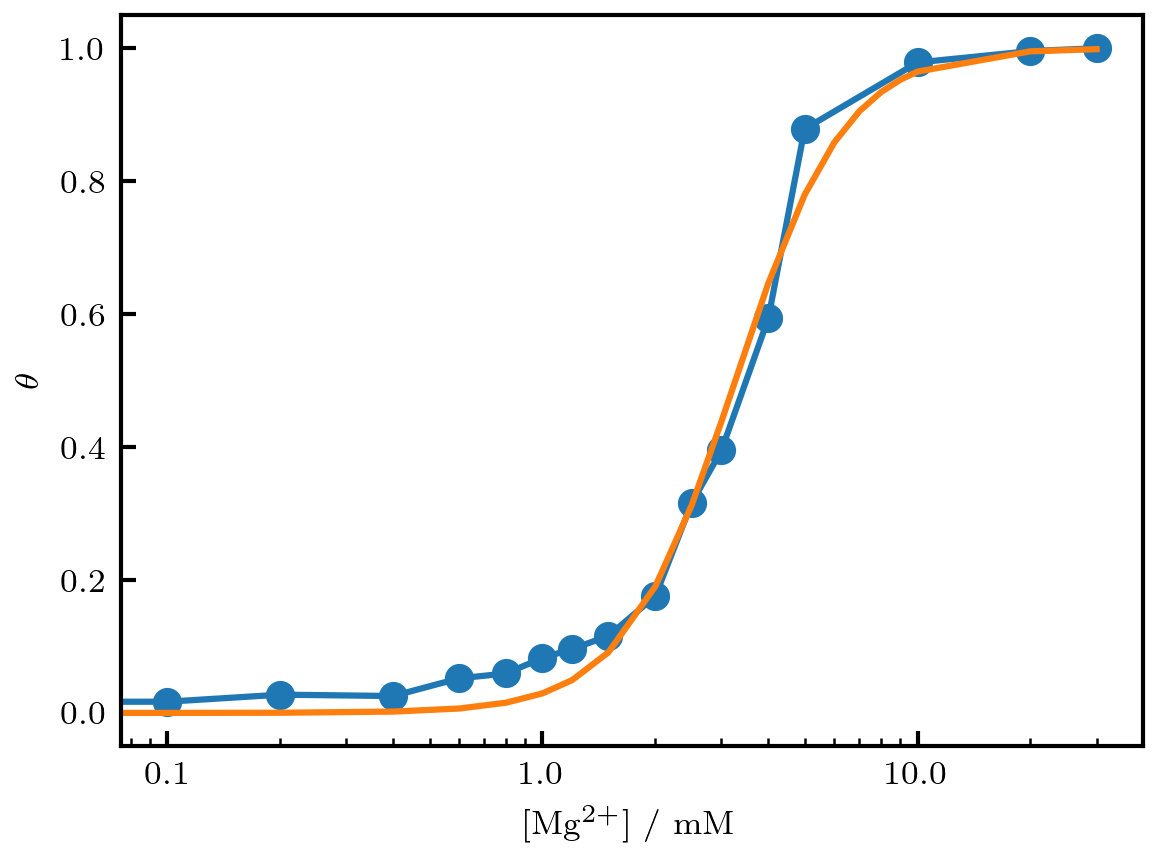

In [17]:
from scipy.optimize import curve_fit

para, dev = curve_fit(hill_equation, [cM * 1000 for cM in cMs], thetas) # p0=p0, bounds=bounds

print (para)

fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(4, 3), dpi=300)
ax = axs

ax.plot([cM * 1000 for cM in cMs], thetas, 'o-')
ax.set_ylabel(r'$\theta$')
ax.set_xlabel(r'[Mg$^{2+}$] / mM')

Hill_n = para[0]
Hill_mid = para[1]
cMs_plot = [0.0, 0.0001, 0.0002, 0.0004, 0.0006, 0.0008, 0.001,
            0.0012, 0.0015, 0.002, 0.0025, 0.003, 0.004, 0.005, 0.006,0.007,0.008,0.009,0.01, 0.02, 0.03]
ax.plot([cM * 1000 for cM in cMs_plot], [hill_equation(cM * 1000, Hill_n, Hill_mid) for cM in cMs_plot])

#ax.set_ylim(4.0, 7.0)

ax.set_xscale('log')
ax.set_xticks([0.1, 1, 10])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

fig.savefig('Rg_fitHill_theta.pdf', dpi=300)

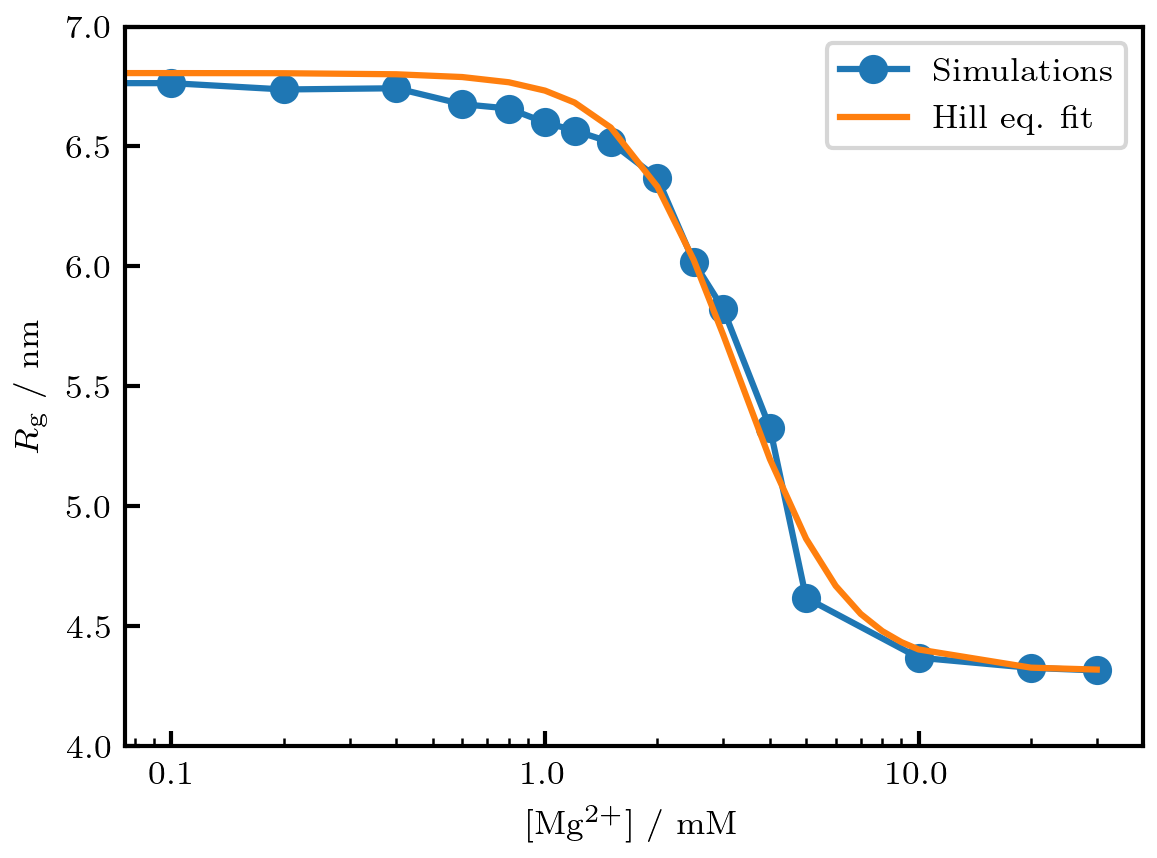

In [19]:
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(4, 3), dpi=300)
ax = axs

ax.plot([cM * 1000 for cM in cMs], [Rg * 0.1 for Rg in Rg_ave], 'o-', label='Simulations')
ax.set_ylabel(r'$R_{\mathrm{g}}$ / nm')
ax.set_xlabel(r'[Mg$^{2+}$] / mM')

ax.plot([cM * 1000 for cM in cMs_plot],
        [0.1*(-(Rg_max - Rg_min) * (hill_equation(cM * 1000, Hill_n, Hill_mid) - 1.0) + Rg_min) for cM in cMs_plot],
       label='Hill eq. fit')

ax.set_ylim(4.0, 7.0)

ax.set_xscale('log')
ax.set_xticks([0.1, 1, 10])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.legend()

fig.savefig('Rg_fitHill_Rg.pdf', dpi=300)

# RMSD

In [134]:
# Full length RMSD

f_sh = open('rmsd.sh','w')
for cM in cMs:
    f_sh.write('bestfit_dcd_by_pdb_part_onlyRMSD.py')
    f_sh.write(' ./make_ninfo/16SCD_ninfo.cg.pdb ./dcd/cM%6.4f.dcd 1 1037' % (cM,))
    f_sh.write(' > rmsd/cM%6.4f.rmsd\n' % (cM,))
f_sh.close()

In [136]:
# Exclude H21

# H21  =  residue 27 to 90 (residue starts from 1)

# 27 phosphate ==> 3 * (27-1) = 3 * 26 = 78
# 90 base ==> 3 * (90-1) + 2 = 3 * 89 + 2 = 269

# 78 - 269 corresponds H21
# 
# To exclude H21,
# 1 - 77 and 270 - 1037


f_sh = open('rmsd_excludeH21.sh','w')
for cM in cMs:
    f_sh.write('bestfit_dcd_by_pdb_part_onlyRMSD.py')
    f_sh.write(' ./make_ninfo/16SCD_ninfo.cg.pdb ./dcd/cM%6.4f.dcd 1 77 270 1037' % (cM,))
    f_sh.write(' > rmsd/cM%6.4f.excludeH21.rmsd\n' % (cM,))
f_sh.close()

In [140]:
# Exclude H21 and H27

# For H21, see one above column


# H27  =  residue 318 to 346 (residue starts from 1, continueous for the entire sequence)

# 318 phosphate ==> 3 * (318-1) = 3 * 317 = 951
# 346 base ==> 3 * (346-1) + 2 = 3 * 345 + 2 = 1037

# 951 - 1037 corresponds H27
#  (1037 is the last id of this RNA)

# To exclude H21 and H27,
# 1 - 77 and 270 - 950


f_sh = open('rmsd_excludeH21H27.sh','w')
for cM in cMs:
    f_sh.write('bestfit_dcd_by_pdb_part_onlyRMSD.py')
    f_sh.write(' ./make_ninfo/16SCD_ninfo.cg.pdb ./dcd/cM%6.4f.dcd 1 77 270 950' % (cM,))
    f_sh.write(' > rmsd/cM%6.4f.excludeH21H27.rmsd\n' % (cM,))
f_sh.close()

In [146]:
f_out = open('cM_RMSDave.out','w')

for cM in cMs:
    f_out.write('%6.4f' % (cM,))
    
    rmsd = 0.0
    n = 0
    for l in open('rmsd/cM%6.4f.rmsd' % (cM,)):
        rmsd += float(l)
        n += 1
    f_out.write(' %5.1f' % (rmsd/float(n)))
    
    rmsd = 0.0
    n = 0
    for l in open('rmsd/cM%6.4f.excludeH21.rmsd' % (cM,)):
        rmsd += float(l)
        n += 1
    f_out.write(' %5.1f' % (rmsd/float(n)))
        
    rmsd = 0.0
    n = 0
    for l in open('rmsd/cM%6.4f.excludeH21H27.rmsd' % (cM,)):
        rmsd += float(l)
        n += 1
    f_out.write(' %5.1f' % (rmsd/float(n)))0
    f_out.write('\n')
f_out.close()

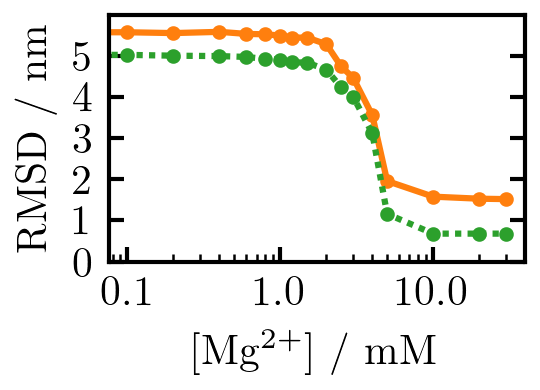

In [175]:
import matplotlib

fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(2, 1.5), dpi=300)
ax = axs

RMSD_full = []
RMSD_excludeH21H27 = []
for l in open('cM_RMSDave.out'):
    lsp = l.split()
    RMSD_full.append( float(lsp[1]) )
    RMSD_excludeH21H27.append( float(lsp[3]) )
    
ax.plot([cM * 1000 for cM in cMs], [RMSD * 0.1 for RMSD in RMSD_full], '.-', c='C1', markersize=5)
ax.plot([cM * 1000 for cM in cMs], [RMSD * 0.1 for RMSD in RMSD_excludeH21H27], '.', linestyle=(0,(1,1)), c='C2', markersize=5)
ax.set_ylabel(r'RMSD / nm')
ax.set_xlabel(r'[Mg$^{2+}$] / mM')

ax.set_ylim(0.0, 6.0)
ax.set_yticks([0,1,2,3,4,5])
ax.yaxis.set_ticks_position('both')

ax.set_xscale('log')
ax.set_xticks([0.1, 1, 10])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

fig.savefig('RMSD.pdf', dpi=300)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


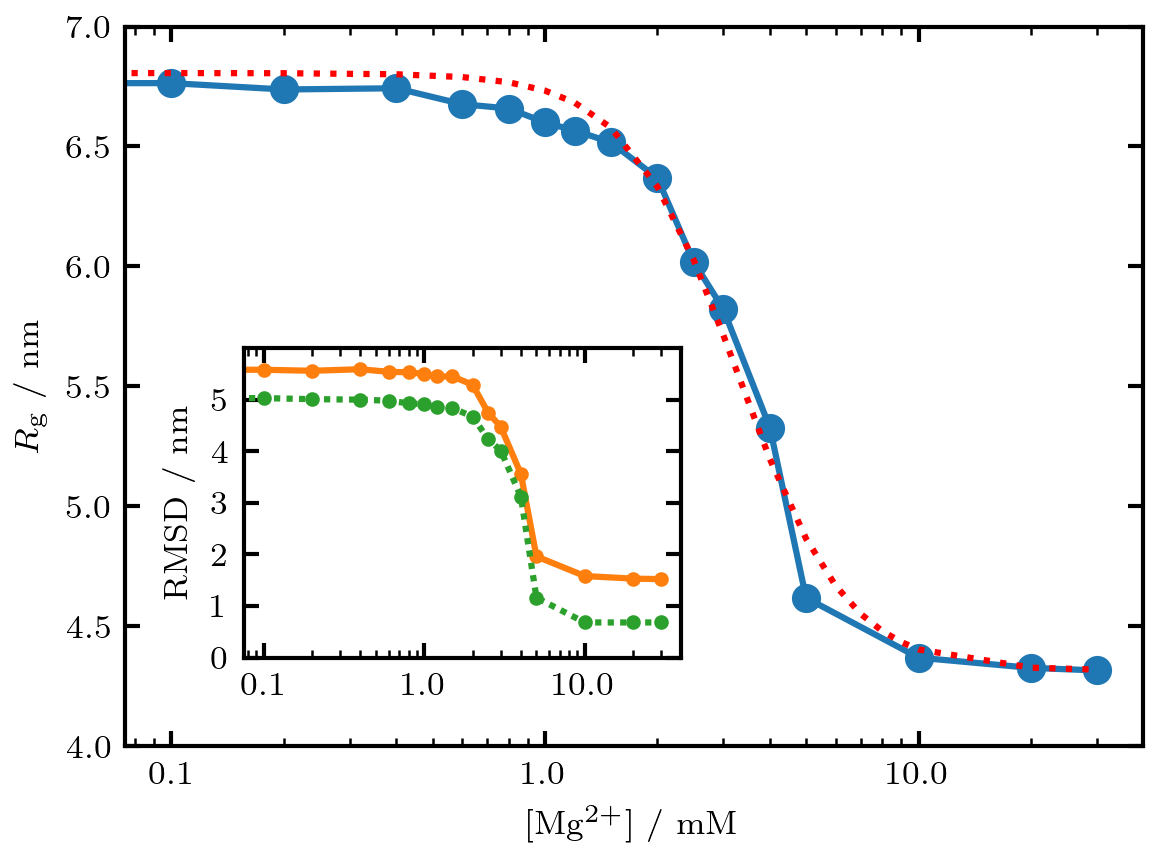

In [21]:
import matplotlib
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(4, 3), dpi=300)
ax = axs

# Rg from the simulations
ax.plot([cM * 1000 for cM in cMs], [Rg * 0.1 for Rg in Rg_ave], 'o-')

# Rg from Hill equation fitting
cMs_plot = [0.0, 0.0001, 0.0002, 0.0004, 0.0006, 0.0008, 0.001,
            0.0012, 0.0015, 0.002, 0.0025, 0.003, 0.004, 0.005,
            0.006,0.007,0.008,0.009,0.01, 0.02, 0.03]
ax.plot([cM * 1000 for cM in cMs_plot],
        [0.1*(-(Rg_max - Rg_min) * (hill_equation(cM * 1000, Hill_n, Hill_mid) - 1.0) + Rg_min) for cM in cMs_plot], ':', c='red')

ax.set_ylabel(r'$R_{\mathrm{g}}$ / nm')
ax.set_xlabel(r'[Mg$^{2+}$] / mM')

ax.set_ylim(4.0, 7.0)
ax.yaxis.set_ticks_position('both')

ax.set_xscale('log')
ax.set_xticks([0.1, 1, 10])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.xaxis.set_ticks_position('both')


##### INSET ##################################################
axins = inset_axes(ax, width="100%", height="100%", 
                   bbox_to_anchor=(.1, .1, .43, .43),
                   bbox_transform=ax.transAxes,
                   loc=3)

RMSD_full = []
RMSD_excludeH21H27 = []
for l in open('cM_RMSDave.out'):
    lsp = l.split()
    RMSD_full.append( float(lsp[1]) )
    RMSD_excludeH21H27.append( float(lsp[3]) )
    
axins.plot([cM * 1000 for cM in cMs], [RMSD * 0.1 for RMSD in RMSD_full], '.-', c='C1', markersize=5)
axins.plot([cM * 1000 for cM in cMs], [RMSD * 0.1 for RMSD in RMSD_excludeH21H27], '.', linestyle=(0,(1,1)), c='C2', markersize=5)
axins.set_ylabel(r'RMSD / nm')
#axins.set_xlabel(r'[Mg$^{2+}$] / mM')

axins.set_ylim(0.0, 6.0)
axins.set_yticks([0,1,2,3,4,5])
axins.yaxis.set_ticks_position('both')

axins.set_xscale('log')
axins.set_xticks([0.1, 1, 10])
axins.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axins.xaxis.set_ticks_position('both')
#################################################################

fig.savefig('Rg_RMSD.svg', dpi=300) # To add structures in Inkscape
fig.savefig('Rg_RMSD.pdf', dpi=300)

# Run MDcode

In `16SCD/make_ninfo/`, ran `16SCD_info.cpp`, and generated `16SCD.ninfo`.

In [14]:
for cM in cMs:
    cMstr = 'cM%6.4f' % (cM,)
    f_out = open('MDcode/16SCD.%s.inp' % (cMstr,),'w')
    for l in open('MDcode/16SCD.temp.inp'):
        l = l.replace('##cM##', cMstr)
        l = l.replace('##N_ION_K##', '%i' % (cM_nKs[cM],))
        l = l.replace('##N_ION_CL##', '%i' % (cM_nCls[cM],))
        l = l.replace('##N_ION_MG##', '%i' % (cM_nMgs[cM],))
        l = l.replace('##N_FRAME##', '%i' % (cM_nframe[cM]-1,))  # Since MDcode treat the first frame as the 0th step.
        f_out.write(l)
    f_out.close()

http://rna.tbi.univie.ac.at/forna/forna.html?id=share/7bfd2fa312f74b27b8233f52737b9526

http://rna.tbi.univie.ac.at/forna/forna.html?id=share/a987388dbe86469383546fb6340f41d3 (only link updated)

# Helix formation

In [52]:
def residue_pairing(i_begin, i_end, j_begin, j_end):
    pairs = []
    for i,j in zip(range(i_begin,i_end+1), range(j_end,j_begin-1,-1)):
        pairs.append((i,j)) 
    return pairs

resH = {}
resH[19] = residue_pairing(6,8,314,316)
resH[20] = residue_pairing(16,25,194,203)
resH[21] = (  residue_pairing(27,33,84,90) 
            + residue_pairing(35,36,82,83) 
            + residue_pairing(37,45,71,79)
            + residue_pairing(50,57,61,68) )
resH[22] = (  residue_pairing(94,96,188,190)
            + residue_pairing(97,103,180,186)
            + residue_pairing(105,111,173,179) )
resH[23] = (  residue_pairing(112,126,142,156)
            + residue_pairing(127,130,135,138) 
            + residue_pairing(164,166,169,171) )
resH[24] = residue_pairing(207,213,244,250) + residue_pairing(217,225,235,243)
resH[25] = residue_pairing(260,265,307,312)
resH[26] = residue_pairing(267,277,281,291) + residue_pairing(293,295,300,302)
resH[27] = residue_pairing(318,322,341,345) + residue_pairing(324,325,339,340) + residue_pairing(327,331,334,338)

for iH in range(19,27+1):
    print ('H%i  %2i' % (iH, len(resH[iH])))

H19   3
H20  10
H21  26
H22  17
H23  22
H24  16
H25   6
H26  14
H27  12


In [53]:
# Convert to imp in MDcode

impH = {}

for iH in range(19,27+1):
    impH[iH] = []
    for (i,j) in resH[iH]:
        imp = 3 * (i-1) + 2
        jmp = 3 * (j-1) + 2
        impH[iH].append((imp,jmp))

In [54]:
ihbH = {}
for iH in range(19,27+1):
    ihbH[iH] = []

for l in open('make_ninfo/16SCD.ninfo'):
    if l[0:7] != 'hb-dist':
        continue
    lsp = l.split()
    
    # Only consider "S" secondary. Do not consider "T" tertiary
    if lsp[11] != 'S':
        continue
        
    imp = int(lsp[4])
    jmp = int(lsp[5])
    
    for iH in range(19,27+1):
        if (imp,jmp) in impH[iH]:
            ihbH[iH].append(int(lsp[1]))
            
for iH in range(19,27+1):
    print ('H%i  %2i' % (iH, len(ihbH[iH])))

H19   3
H20   8
H21  23
H22  15
H23  15
H24  13
H25   6
H26  14
H27   8


In [47]:
%store resH
%store impH
%store ihbH


Stored 'resH' (dict)
Stored 'impH' (dict)
Stored 'ihbH' (dict)


In [5]:
%store -r

In [6]:
import os.path

cM_Hfractions = {}

for cM in cMs:
    print ('Working on cM=%f' % (cM,))
    
    hbfilepath = 'MDcode/data/cM%6.4f.hb' % (cM,)
    if not os.path.isfile(hbfilepath):
        continue

    average = {}  # for each iH
    nframe = 0
    for iH in range(19,27+1):
        average[iH] = 0.0
        
    for l in open(hbfilepath):
        lsp = l.split()
        if (len(lsp) % 2 != 0):
            raise ValueError('len(lsp)%2!=0')
        n = len(lsp) / 2
        
        for iH in range(19,27+1):
            nform = 0
            for i in range(n):
                ihb = int(lsp[i*2])
                if ihb in ihbH[iH]:
                    nform += 1
            average[iH] += nform / float(len(ihbH[iH]))
            
        nframe += 1
        
    cM_Hfractions[cM] = {}
    for iH in range(19,27+1):
        cM_Hfractions[cM][iH] = average[iH] / float(nframe)

Working on cM=0.000000
Working on cM=0.000100
Working on cM=0.000200
Working on cM=0.000400
Working on cM=0.000600
Working on cM=0.000800
Working on cM=0.001000
Working on cM=0.001200
Working on cM=0.001500
Working on cM=0.002000
Working on cM=0.002500
Working on cM=0.003000
Working on cM=0.004000
Working on cM=0.005000
Working on cM=0.010000
Working on cM=0.020000
Working on cM=0.030000


In [8]:
import os

filepath = 'cM_Hfractions.out'

if os.path.exists(filepath):
    
    cM_Hfractions = {}
    
    for cM in cMs:
        cM_Hfractions[cM] = {}
    
    for l in open(filepath,'r'):
        lsp = l.split()
        cM = float(lsp[0])
        iH = int(lsp[1])
        cM_Hfractions[cM][iH] = float(lsp[2])
    
else:
    f_out = open(filepath,'w')
    for cM in cMs:
        if not cM_Hfractions.has_key(cM):
            continue
        for iH in range(19,27+1):
            f_out.write('%6.4f %i %6.4f\n' % (cM,iH,cM_Hfractions[cM][iH]))
    f_out.close()

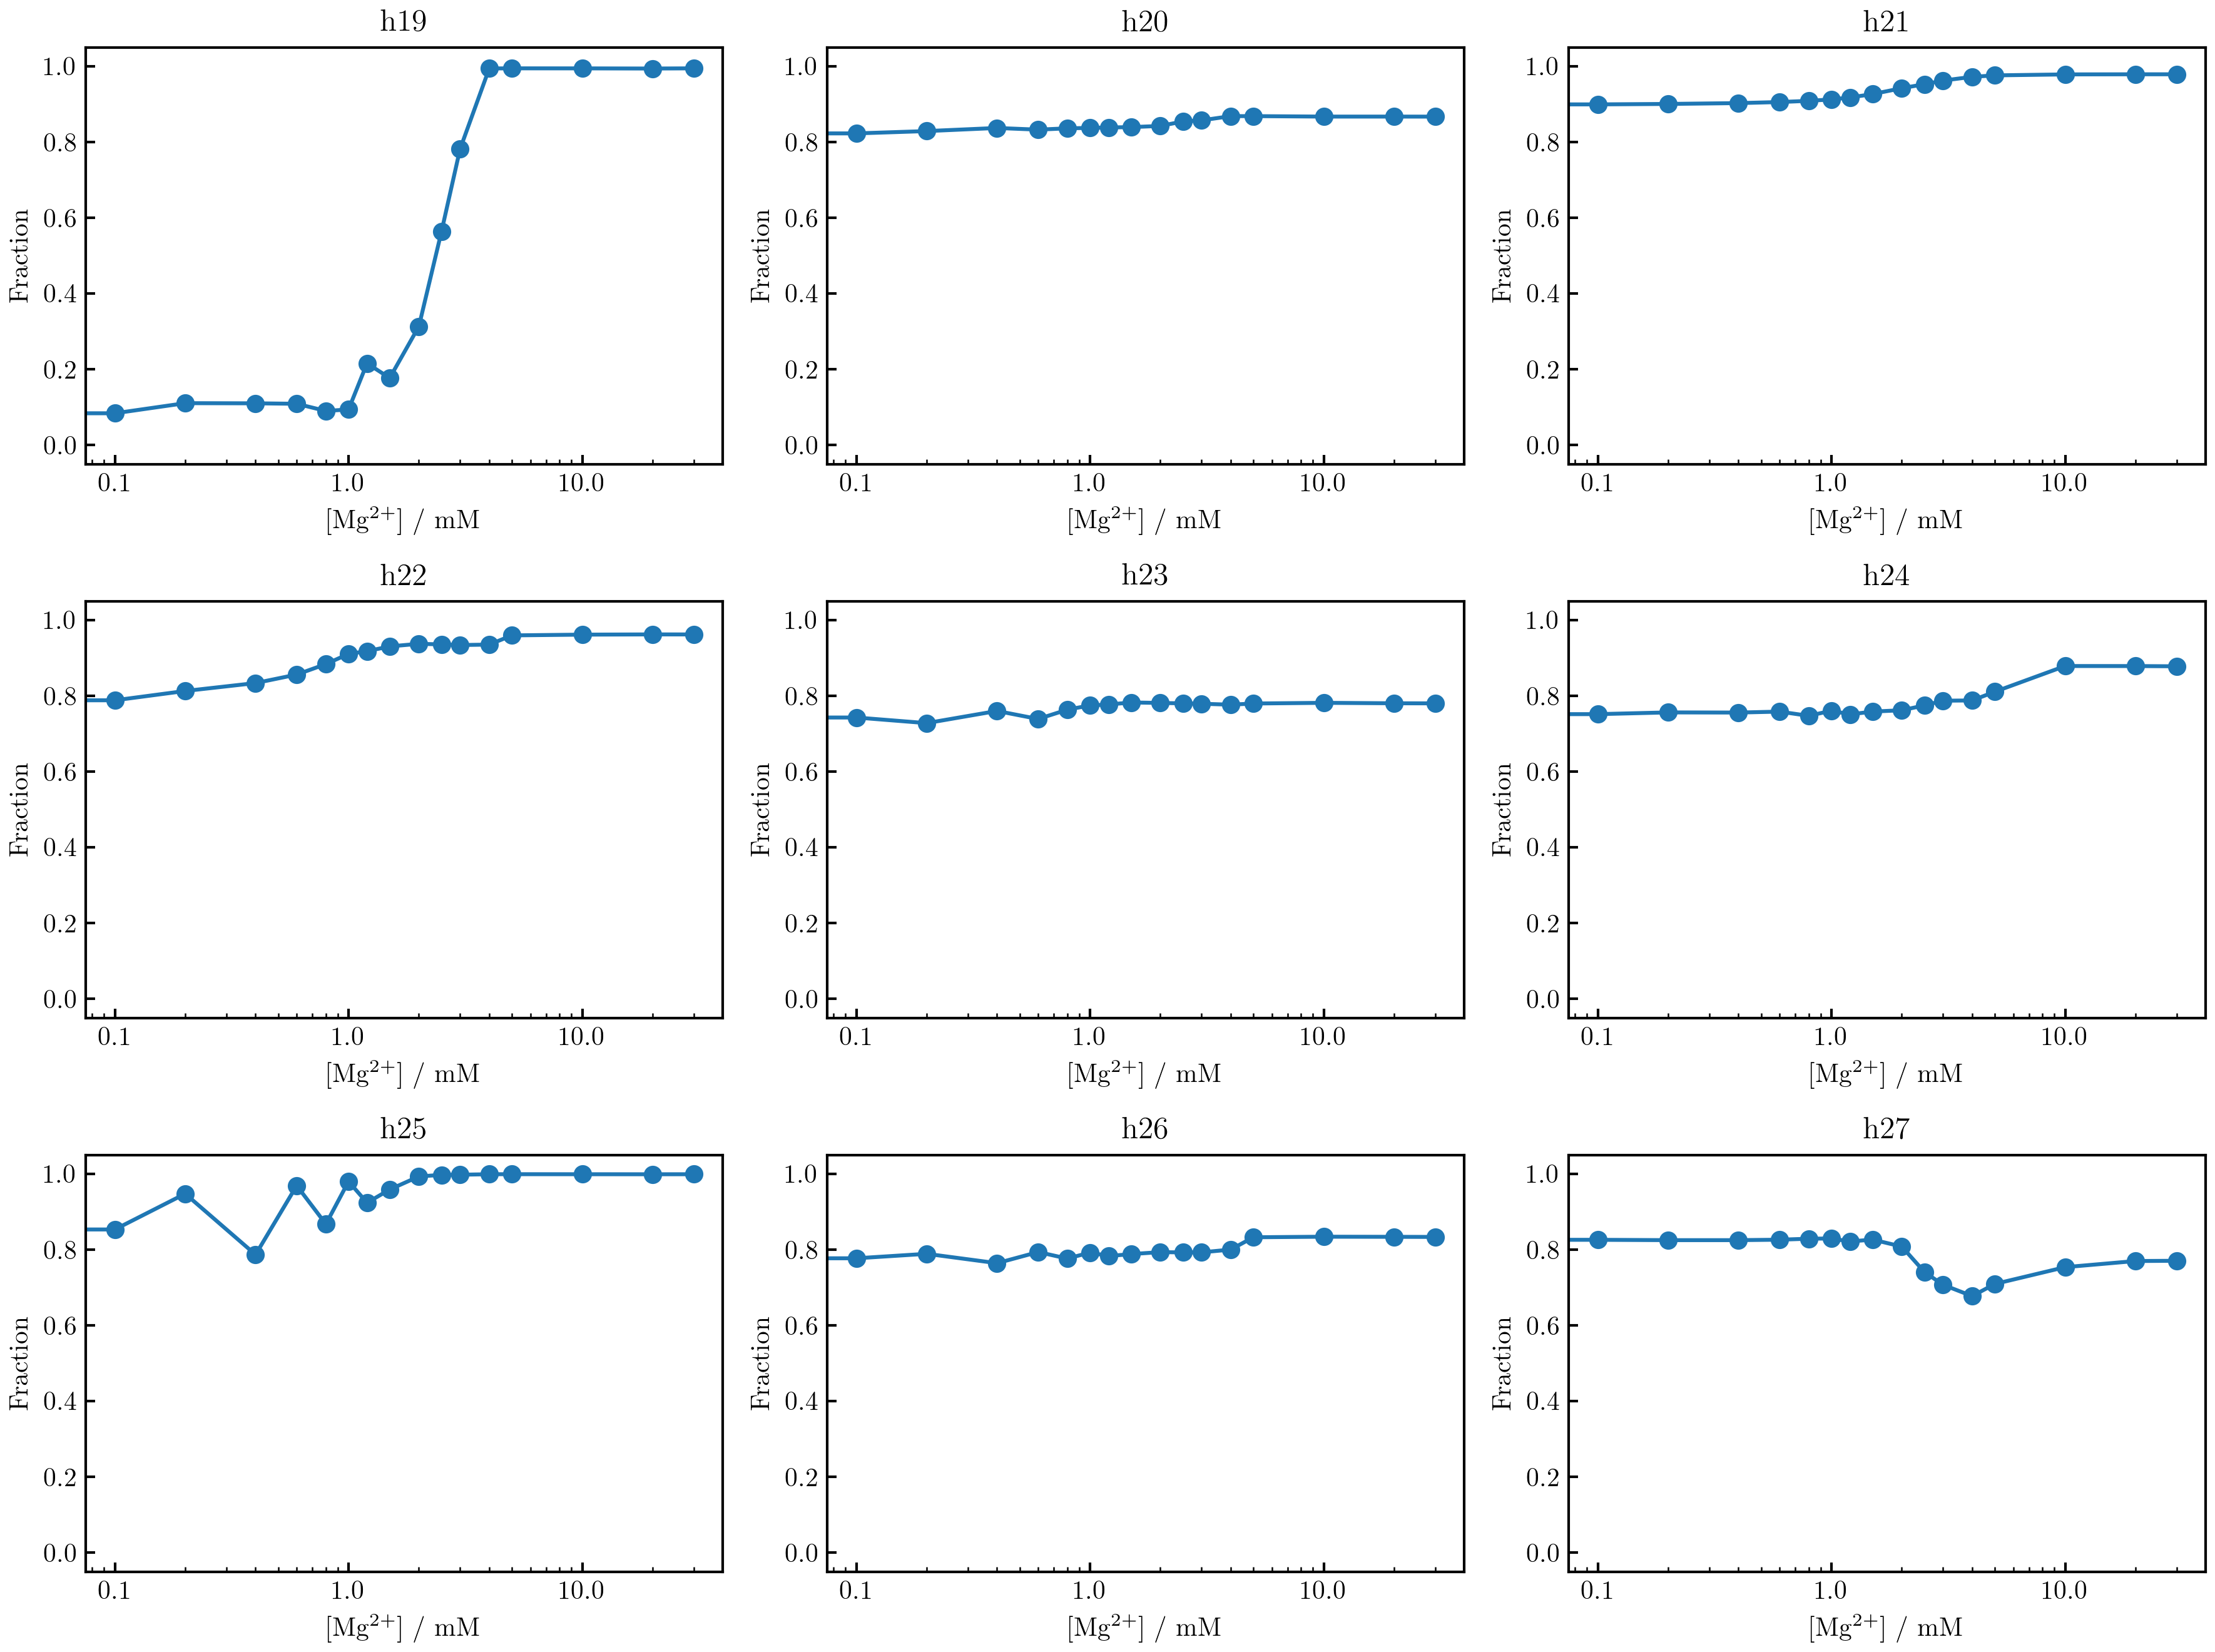

In [9]:
import matplotlib

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(12, 9), dpi=300)

for ii, iH in enumerate(range(19,27+1)):
    
    icol = ii % 3
    irow = ii / 3
    ax = axs[irow,icol]

    ax.set_title('h%i' % (iH,))

    x = []; y = []
    for cM in cMs:
        if not cM_Hfractions.has_key(cM):
            continue
        if cM_Hfractions[cM].has_key(iH):
            x.append(cM*1000)
            y.append(cM_Hfractions[cM][iH])
    ax.plot(x,y, 'o-')
    ax.set_ylabel(r'Fraction')
    ax.set_xlabel(r'[Mg$^{2+}$] / mM')

    ax.set_ylim(-0.05, 1.05)

    ax.set_xscale('log')
    ax.set_xticks([0.1, 1, 10])
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

fig.savefig('Hfractions.pdf', dpi=300)

In [7]:
# Treat helix formation as "all" or "none".
# For each helix, if there are at least 2 HBs formed, the helix is deemed to be formed.

import os.path

NHB_HELIX_FORM = 2
cM_Hfractions_allornone = {}

for cM in cMs:
    print ('Working on cM=%f' % (cM,))
    
    hbfilepath = 'MDcode/data/cM%6.4f.hb' % (cM,)
    if not os.path.isfile(hbfilepath):
        continue

    average = {}  # for each iH
    nframe = 0
    fout = {}
    for iH in range(19,27+1):
        average[iH] = 0.0
        fout[iH] = open('cM_Hfractions_allornone/cM%6.4f_H%02i.out' % (cM,iH), 'w')
        
    for l in open(hbfilepath):
        lsp = l.split()
        if (len(lsp) % 2 != 0):
            raise ValueError('len(lsp)%2!=0')
        n = len(lsp) / 2
        
        for iH in range(19,27+1):
            nform = 0
            for i in range(n):
                ihb = int(lsp[i*2])
                if ihb in ihbH[iH]:
                    nform += 1
                    if nform >= NHB_HELIX_FORM:
                        break
            
            if nform >= NHB_HELIX_FORM:
                average[iH] += 1.0
                fout[iH].write('1\n')
            else:
                fout[iH].write('0\n')
                
            #average[iH] += nform / float(len(ihbH[iH]))
            
        nframe += 1
        
    cM_Hfractions_allornone[cM] = {}
    for iH in range(19,27+1):
        cM_Hfractions_allornone[cM][iH] = average[iH] / float(nframe)
        fout[iH].close()

Working on cM=0.000000
Working on cM=0.000100
Working on cM=0.000200
Working on cM=0.000400
Working on cM=0.000600
Working on cM=0.000800
Working on cM=0.001000
Working on cM=0.001200
Working on cM=0.001500
Working on cM=0.002000
Working on cM=0.002500
Working on cM=0.003000
Working on cM=0.004000
Working on cM=0.005000
Working on cM=0.010000
Working on cM=0.020000
Working on cM=0.030000


In [10]:
import os

if os.path.exists('cM_Hfractions_allornone.out'):
    
    cM_Hfractions_allornone = {}
    
    for cM in cMs:
        cM_Hfractions_allornone[cM] = {}
    
    for l in open('cM_Hfractions_allornone.out','r'):
        lsp = l.split()
        cM = float(lsp[0])
        iH = int(lsp[1])
        cM_Hfractions_allornone[cM][iH] = float(lsp[2])
    
else:
    f_out = open('cM_Hfractions_allornone.out','w')
    for cM in cMs:
        if not cM_Hfractions_allornone.has_key(cM):
            continue
        for iH in range(19,27+1):
            f_out.write('%6.4f %i %6.4f\n' % (cM,iH,cM_Hfractions_allornone[cM][iH]))
    f_out.close()


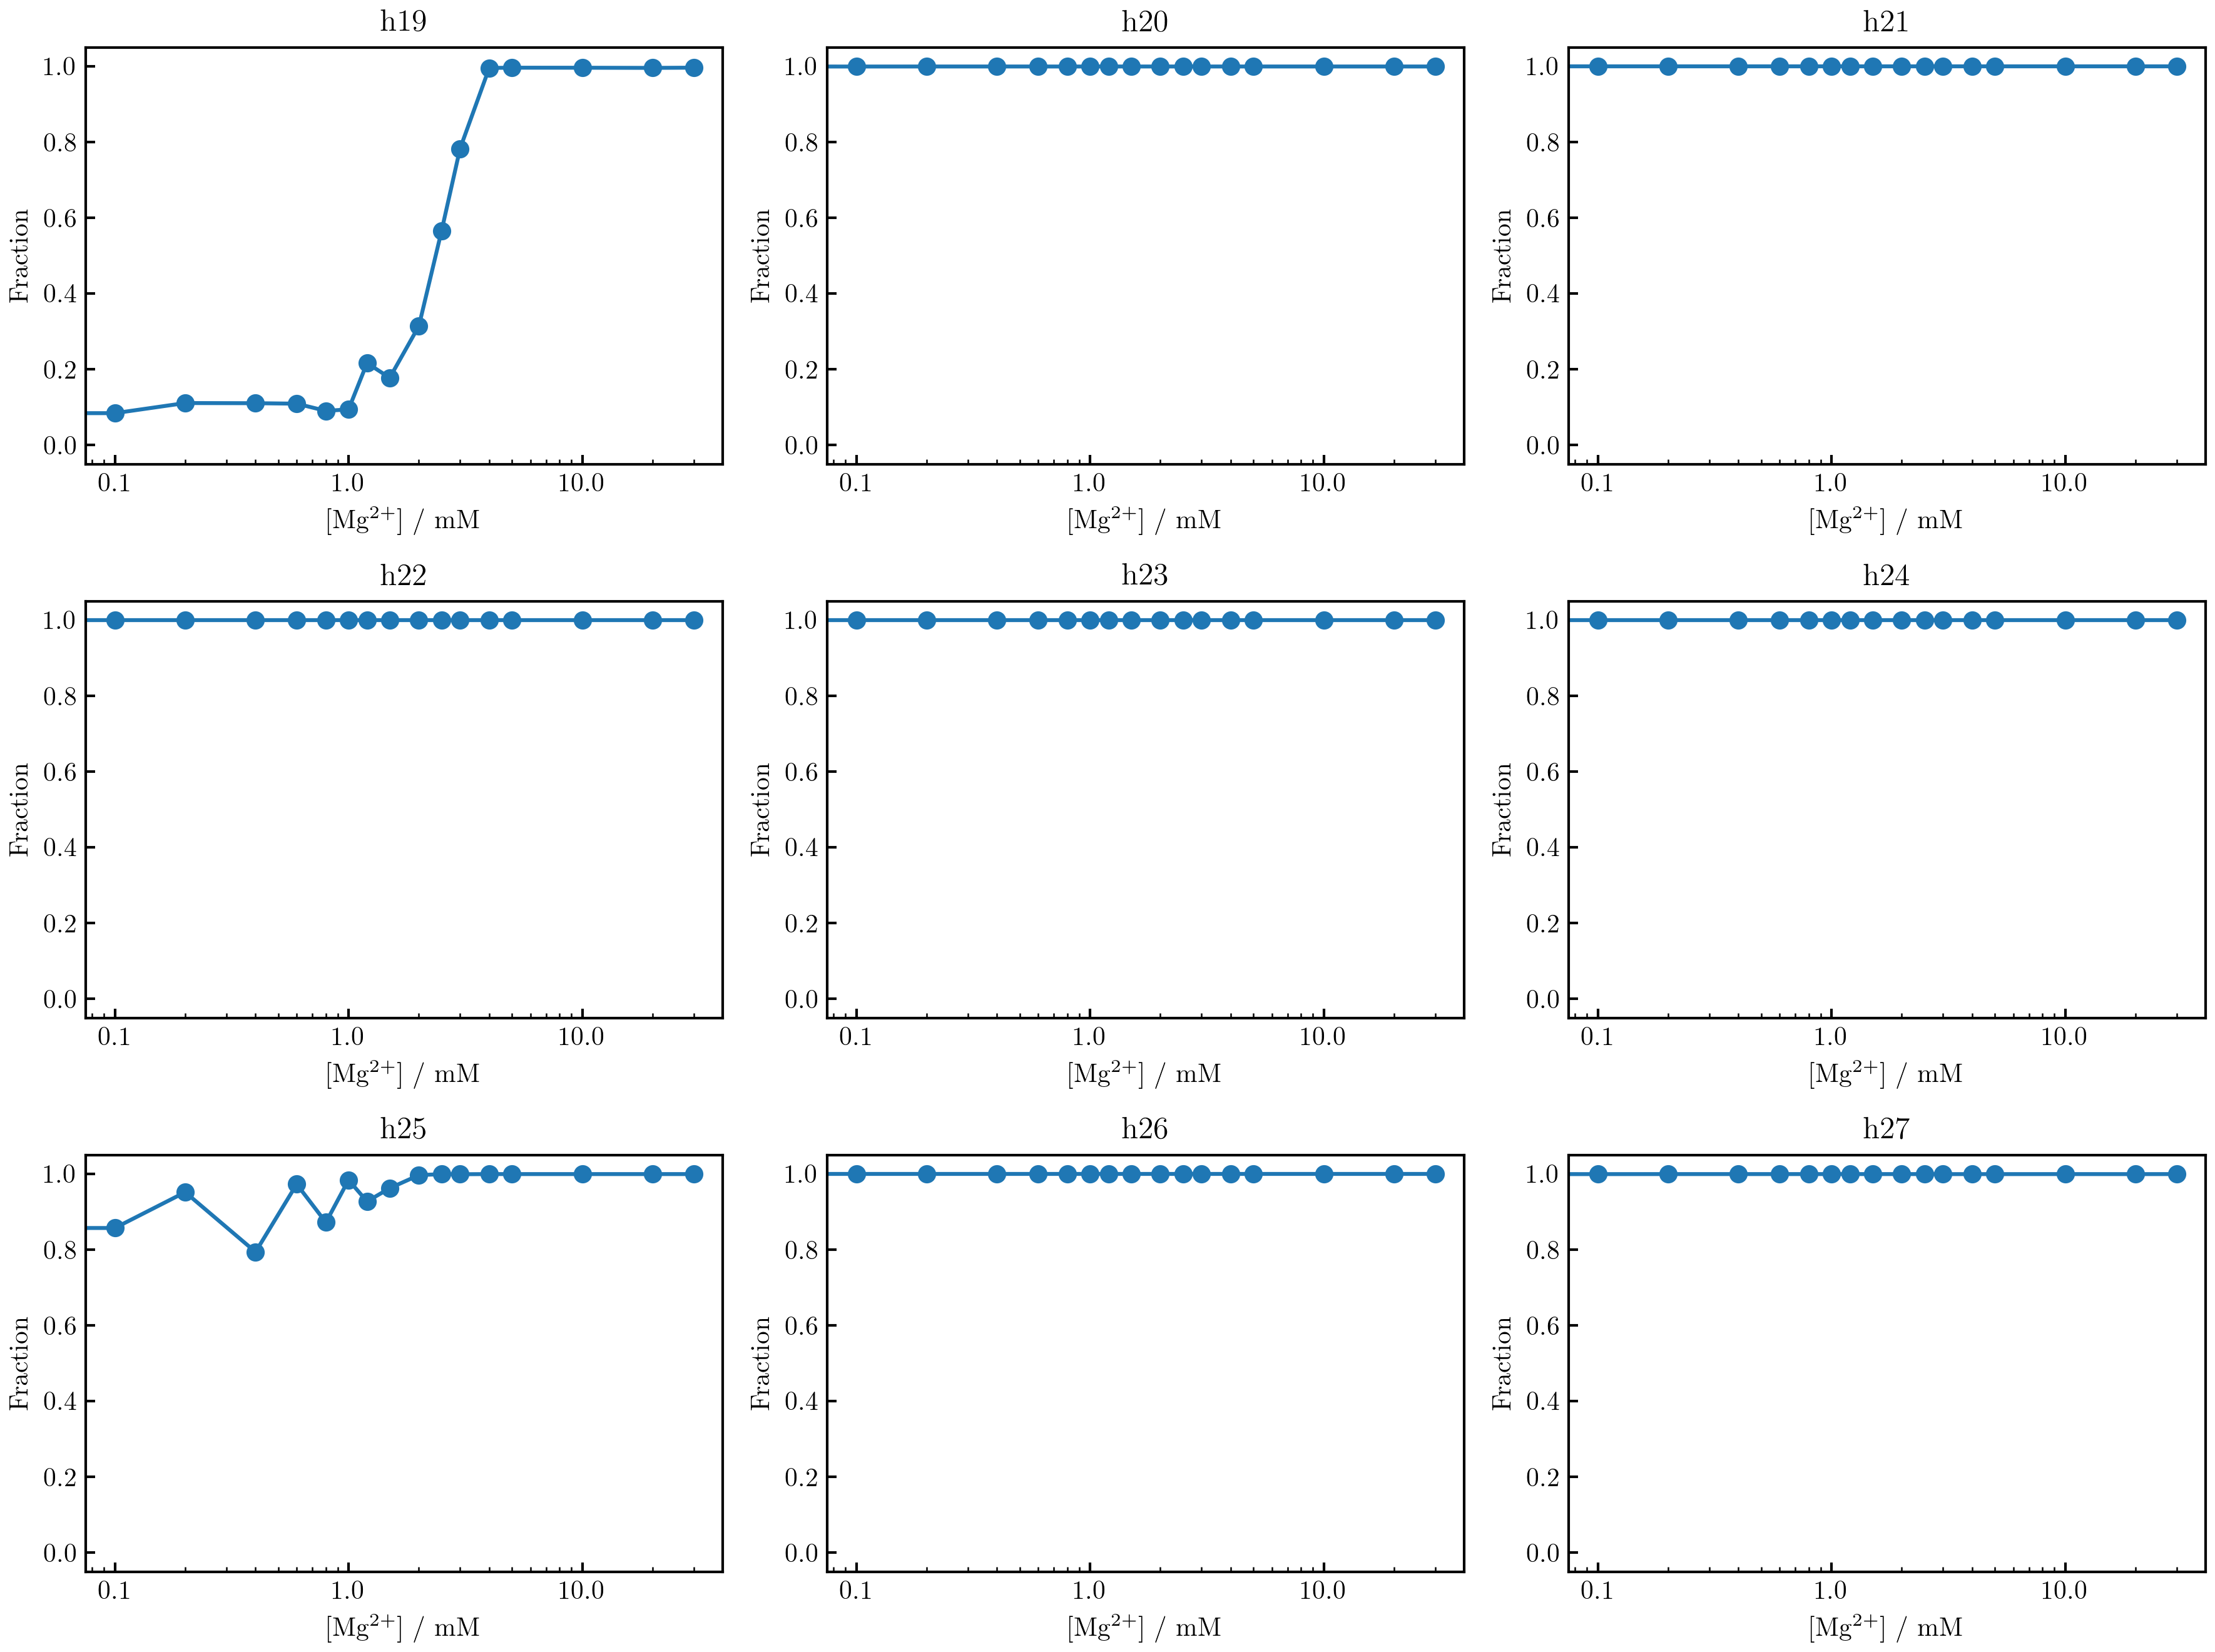

In [11]:
import matplotlib

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(12, 9), dpi=300)

for ii, iH in enumerate(range(19,27+1)):
    
    icol = ii % 3
    irow = ii / 3
    ax = axs[irow,icol]

    ax.set_title('h%i' % (iH,))

    x = []; y = []
    for cM in cMs:
        if not cM_Hfractions_allornone.has_key(cM):
            continue
        if cM_Hfractions_allornone[cM].has_key(iH):
            x.append(cM*1000)
            y.append(cM_Hfractions_allornone[cM][iH])
    ax.plot(x,y, 'o-')
    ax.set_ylabel(r'Fraction')
    ax.set_xlabel(r'[Mg$^{2+}$] / mM')

    ax.set_ylim(-0.05, 1.05)

    ax.set_xscale('log')
    ax.set_xticks([0.1, 1, 10])
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

#fig.savefig('Hfractions_allornone.pdf', dpi=300)

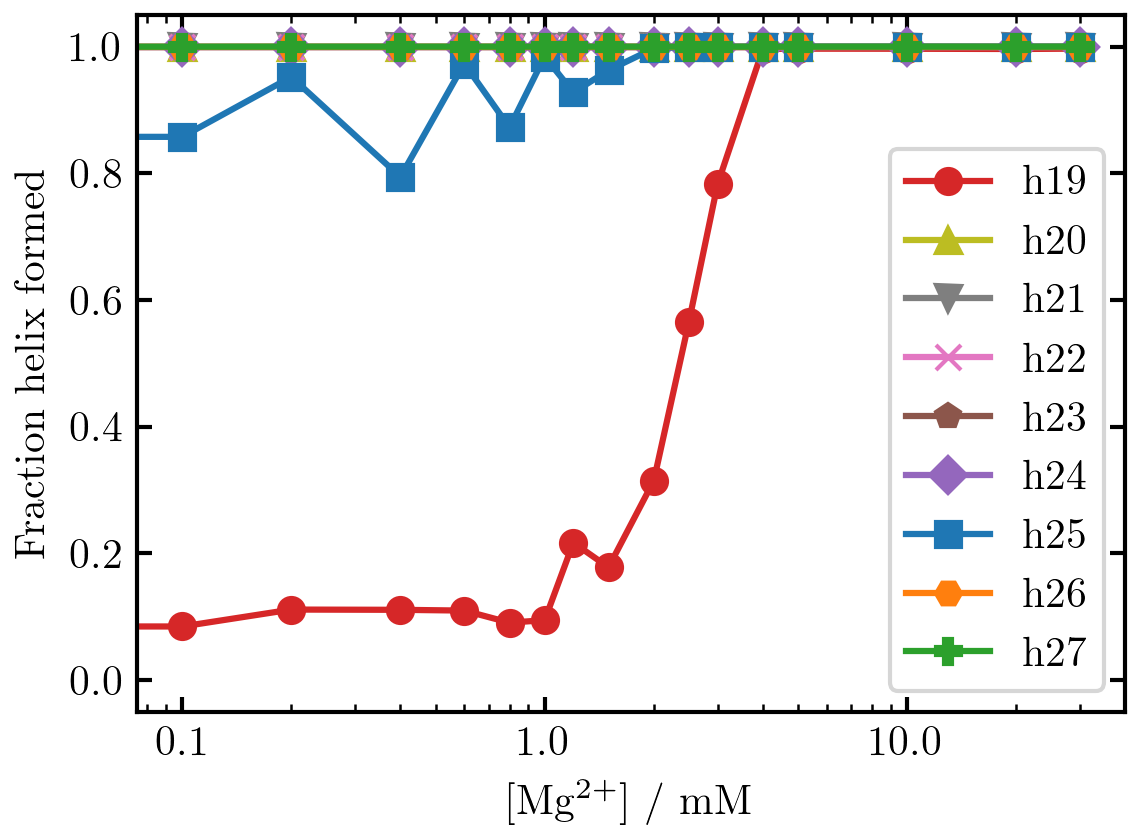

In [12]:
import matplotlib

fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(4*1, 3*1), dpi=300)
    
ax = axs

marks  = ['o-', '^-', 'v-', 'x-', 'p-', 'D-', 's-', 'H-', 'P-']
colors = ['C3', 'C8', 'C7', 'C6', 'C5', 'C4', 'C0', 'C1', 'C2']

for i, iH in enumerate(range(19,27+1)):

    x = []; y = []
    for cM in cMs:
        if not cM_Hfractions_allornone.has_key(cM):
            continue
        x.append(cM*1000)
        y.append(cM_Hfractions_allornone[cM][iH])
        
    #ax.plot(x,y, 'o-', label='H%i' % (iH,), color=colors[i])
    ax.plot(x,y, marks[i], label='h%i' % (iH,), color=colors[i])
    #ax.plot(x,y, label='H%i' % (iH,))

ax.set_ylabel(r'Fraction helix formed')
ax.set_xlabel(r'[Mg$^{2+}$] / mM')

ax.set_ylim(-0.05, 1.05)
ax.yaxis.set_ticks_position('both')

ax.set_xscale('log')
ax.set_xticks([0.1, 1, 10])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.xaxis.set_ticks_position('both')
ax.legend()

fig.savefig('Hfractions_allornone.pdf', dpi=300)

# Tertiary stacking

In [51]:
kT = 0.615
cM_TSfractions = {}

import os

if os.path.exists('cM_TSfractions.out'):
    for l in open('cM_TSfractions.out','r'):
        lsp = l.split()
        cM = float(lsp[0])
        st = int(lsp[1])
        f  = float(lsp[2])
        ist = st - 1
        
        if not cM_TSfractions.has_key(cM):
            cM_TSfractions[cM] = [0.0]*49
            
        cM_TSfractions[cM][ist] = f
    
else:
    f_out = open('cM_TSfractions.out','w')

    for cM in cMs:

        nform = [0]*49
        nframe = 0
        for l in open('dcd/cM%6.4f.contacts' % (cM,)):
            lsp = l.split()
            if len(lsp) != 49:
                raise ValueError('len(lsp) = %i (has to be 49), cM=%6.4f' % (len(lsp), cM,))
            for ist in range(49):
                if float(lsp[ist]) <= -kT:
                    nform[ist] += 1
            nframe += 1

        cM_TSfractions[cM] = []

        for ist in range(49):
            cM_TSfractions[cM].append( nform[ist] / float(nframe) )
            f_out.write('%6.4f %2i %6.4f\n' % (cM,ist+1,cM_TSfractions[cM][ist]))

    f_out.close()

In [12]:
import matplotlib

fig, axs = plt.subplots(ncols=3, nrows=17, figsize=(4*3, 3*17), dpi=300)

for ist in range(49):
    
    icol = ist % 3
    irow = ist / 3
    ax = axs[irow,icol]

    ax.set_title('TS %i' % (ist+1,))

    x = []; y = []
    for cM in cMs:
        if not cM_TSfractions.has_key(cM):
            continue
        x.append(cM*1000)
        y.append(cM_TSfractions[cM][ist])
    ax.plot(x,y, 'o-')
    ax.set_ylabel(r'Fraction')
    ax.set_xlabel(r'[Mg$^{2+}$] / mM')

    ax.set_ylim(-0.05, 1.05)

    ax.set_xscale('log')
    ax.set_xticks([0.1, 1, 10])
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

fig.savefig('TSfractions.pdf', dpi=300)

## Correlation

In [22]:
stack_plots = [2,3,4,5,10,11,18,19,25,31,32,37,38,39,40,43]

import scipy.stats

f_out = open('cM_TSfractions_cor.out','w')

E = [[] for i in range(49)]

for cM in cMs:    
    for l in open('dcd/cM%6.4f.contacts' % (cM,)):
        lsp = l.split()
        if len(lsp) != 49:
            raise ValueError('len(lsp) = %i (has to be 49), cM=%6.4f' % (len(lsp), cM,))
        for ist in range(49):
            E[ist].append(float(lsp[ist]))
    
for i in stack_plots:
    for j in stack_plots:
        if i >= j :
            continue
        cor = scipy.stats.pearsonr(E[i-1], E[j-1])
        f_out.write('%2i %2i %7.4f %7.4f\n' % (i,j,cor[0],cor[1]))
            
f_out.close()

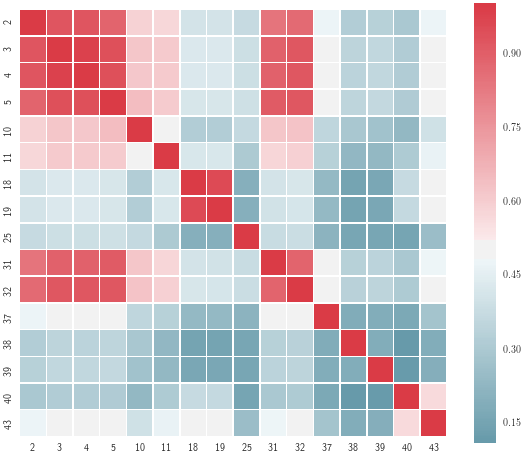

In [43]:
import pandas as pd

import seaborn as sns

stack_plots = [2,3,4,5,10,11,18,19,25,31,32,37,38,39,40,43]

df = pd.DataFrame(index=stack_plots, columns=stack_plots,dtype=float)

for i in stack_plots:
    df[i][i] = 1.0
    
for l in open('cM_TSfractions_cor.out'):
    lsp = l.split()
    i = int(lsp[0])
    j = int(lsp[1])
    cor = float(lsp[2])
    # p = float(lsp[3])
    df[i][j] = cor
    df[j][i] = cor
    
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df, cmap=cmap, vmax=1.0, center=0.5, 
            square=True, linewidths=.5, cbar_kws={"shrink": .8})

f.savefig('TSfractions_cor.png')

## Fractions

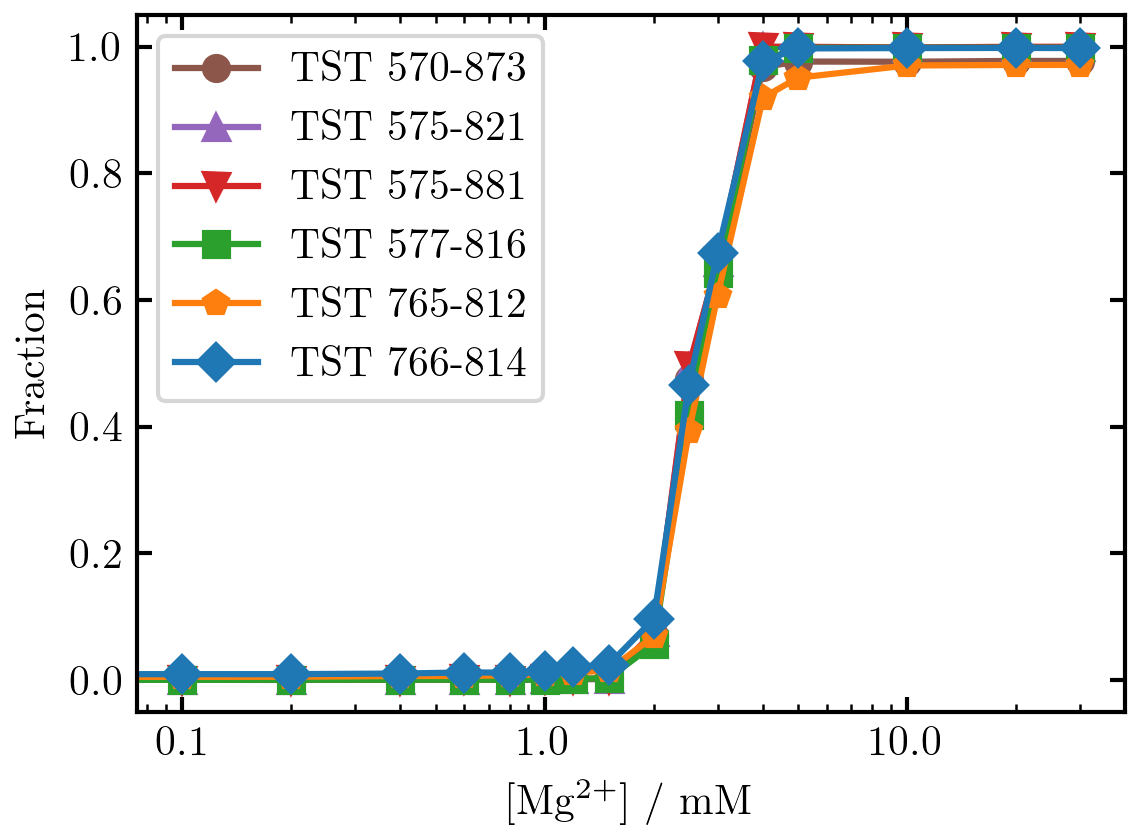

In [191]:
import matplotlib

fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(4*1, 3*1), dpi=300)
    
ax = axs

stack_name = ['570-873', '575-821', '575-881', '577-816', '765-812', '766-814']
marks = ['o-', '^-', 'v-', 's-','p-','D-']
colors = ['C5','C4','C3','C2','C1','C0']

for i, st in enumerate([2,3,4,5,31,32]):
    
    ist = st - 1

    x = []; y = []
    for cM in cMs:
        if not cM_TSfractions.has_key(cM):
            continue
        x.append(cM*1000)
        y.append(cM_TSfractions[cM][ist])
        
    ax.plot(x,y, marks[i], label='TST %s' % (stack_name[i],), color=colors[i])
    
ax.set_ylabel(r'Fraction')
ax.set_xlabel(r'[Mg$^{2+}$] / mM')
ax.yaxis.set_ticks_position('both')

ax.set_ylim(-0.05, 1.05)

ax.set_xscale('log')
ax.set_xticks([0.1, 1, 10])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.xaxis.set_ticks_position('both')
ax.legend()

fig.savefig('TSfractions_central_junction.pdf', dpi=300)
fig.savefig('TSfractions_central_junction.svg', dpi=300)  # To edit in Inkscape

## Distance

G570 base: imp = 26
A873 base: imp = 917

G575 base: imp = 41
G821 base: imp = 779

G575 base: imp = 41 
G881 base: imp = 941

G577 base: imp = 47
A816 base: imp = 764

G765 base: imp = 611
C812 base: imp = 752

A766 base: imp = 614
A814 base: imp = 758

In [8]:
tertiary_stack_imp_pairs = {'570-873':(26,917), 
                            '575-821':(41,779),
                            '575-881':(41,941),
                            '577-816':(47,764),
                            '765-812':(611,752),
                            '766-814':(614,758)}

In [11]:
#Usage: % SCRIPT [input DCD] [boxsize] [ID1] [ID2] [output] 

f_out = open('do_dcd_traj_distance_TST.sh','w')
for cM in cMs:
    for tst in sorted(tertiary_stack_imp_pairs.keys()):
        imp1, imp2 = tertiary_stack_imp_pairs[tst]
        f_out.write("dcd_traj_distance_PBC.py")
        f_out.write(" dcd/cM{:6.4f}.dcd 350.0 {:d} {:d}".format(cM, imp1, imp2))
        f_out.write(" tertiary_stacking/cM{:6.4f}.{:d}_{:d}_dist\n".format(cM, imp1, imp2))
f_out.close()

In [14]:
if INITIAL_RUN:

    import os
    if not os.path.isdir("tertiary_stacking"):
        os.mkdir("tertiary_stacking")
        
    import subprocess
    subprocess.call(['bash', './do_dcd_traj_distance_TST.sh'])

In [17]:
if INITIAL_RUN:
    import numpy as np

    for tst in sorted(tertiary_stack_imp_pairs.keys()):

        imp1, imp2 = tertiary_stack_imp_pairs[tst]

        f_out = open('./tertiary_stacking/average_dist.{:d}_{:d}.out'.format(imp1,imp2), 'w')
        
        for cM in cMs:
            distfile = './tertiary_stacking/cM{:6.4f}.{:d}_{:d}_dist'.format(cM, imp1, imp2)

            dists = []
            for l in open(distfile):
                dists.append(float(l))
            
            ave = np.mean(dists)
            f_out.write('{:6.4f} {:5.2f}\n'.format(cM, ave))

        f_out.close()

/home/hori/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/home/hori/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


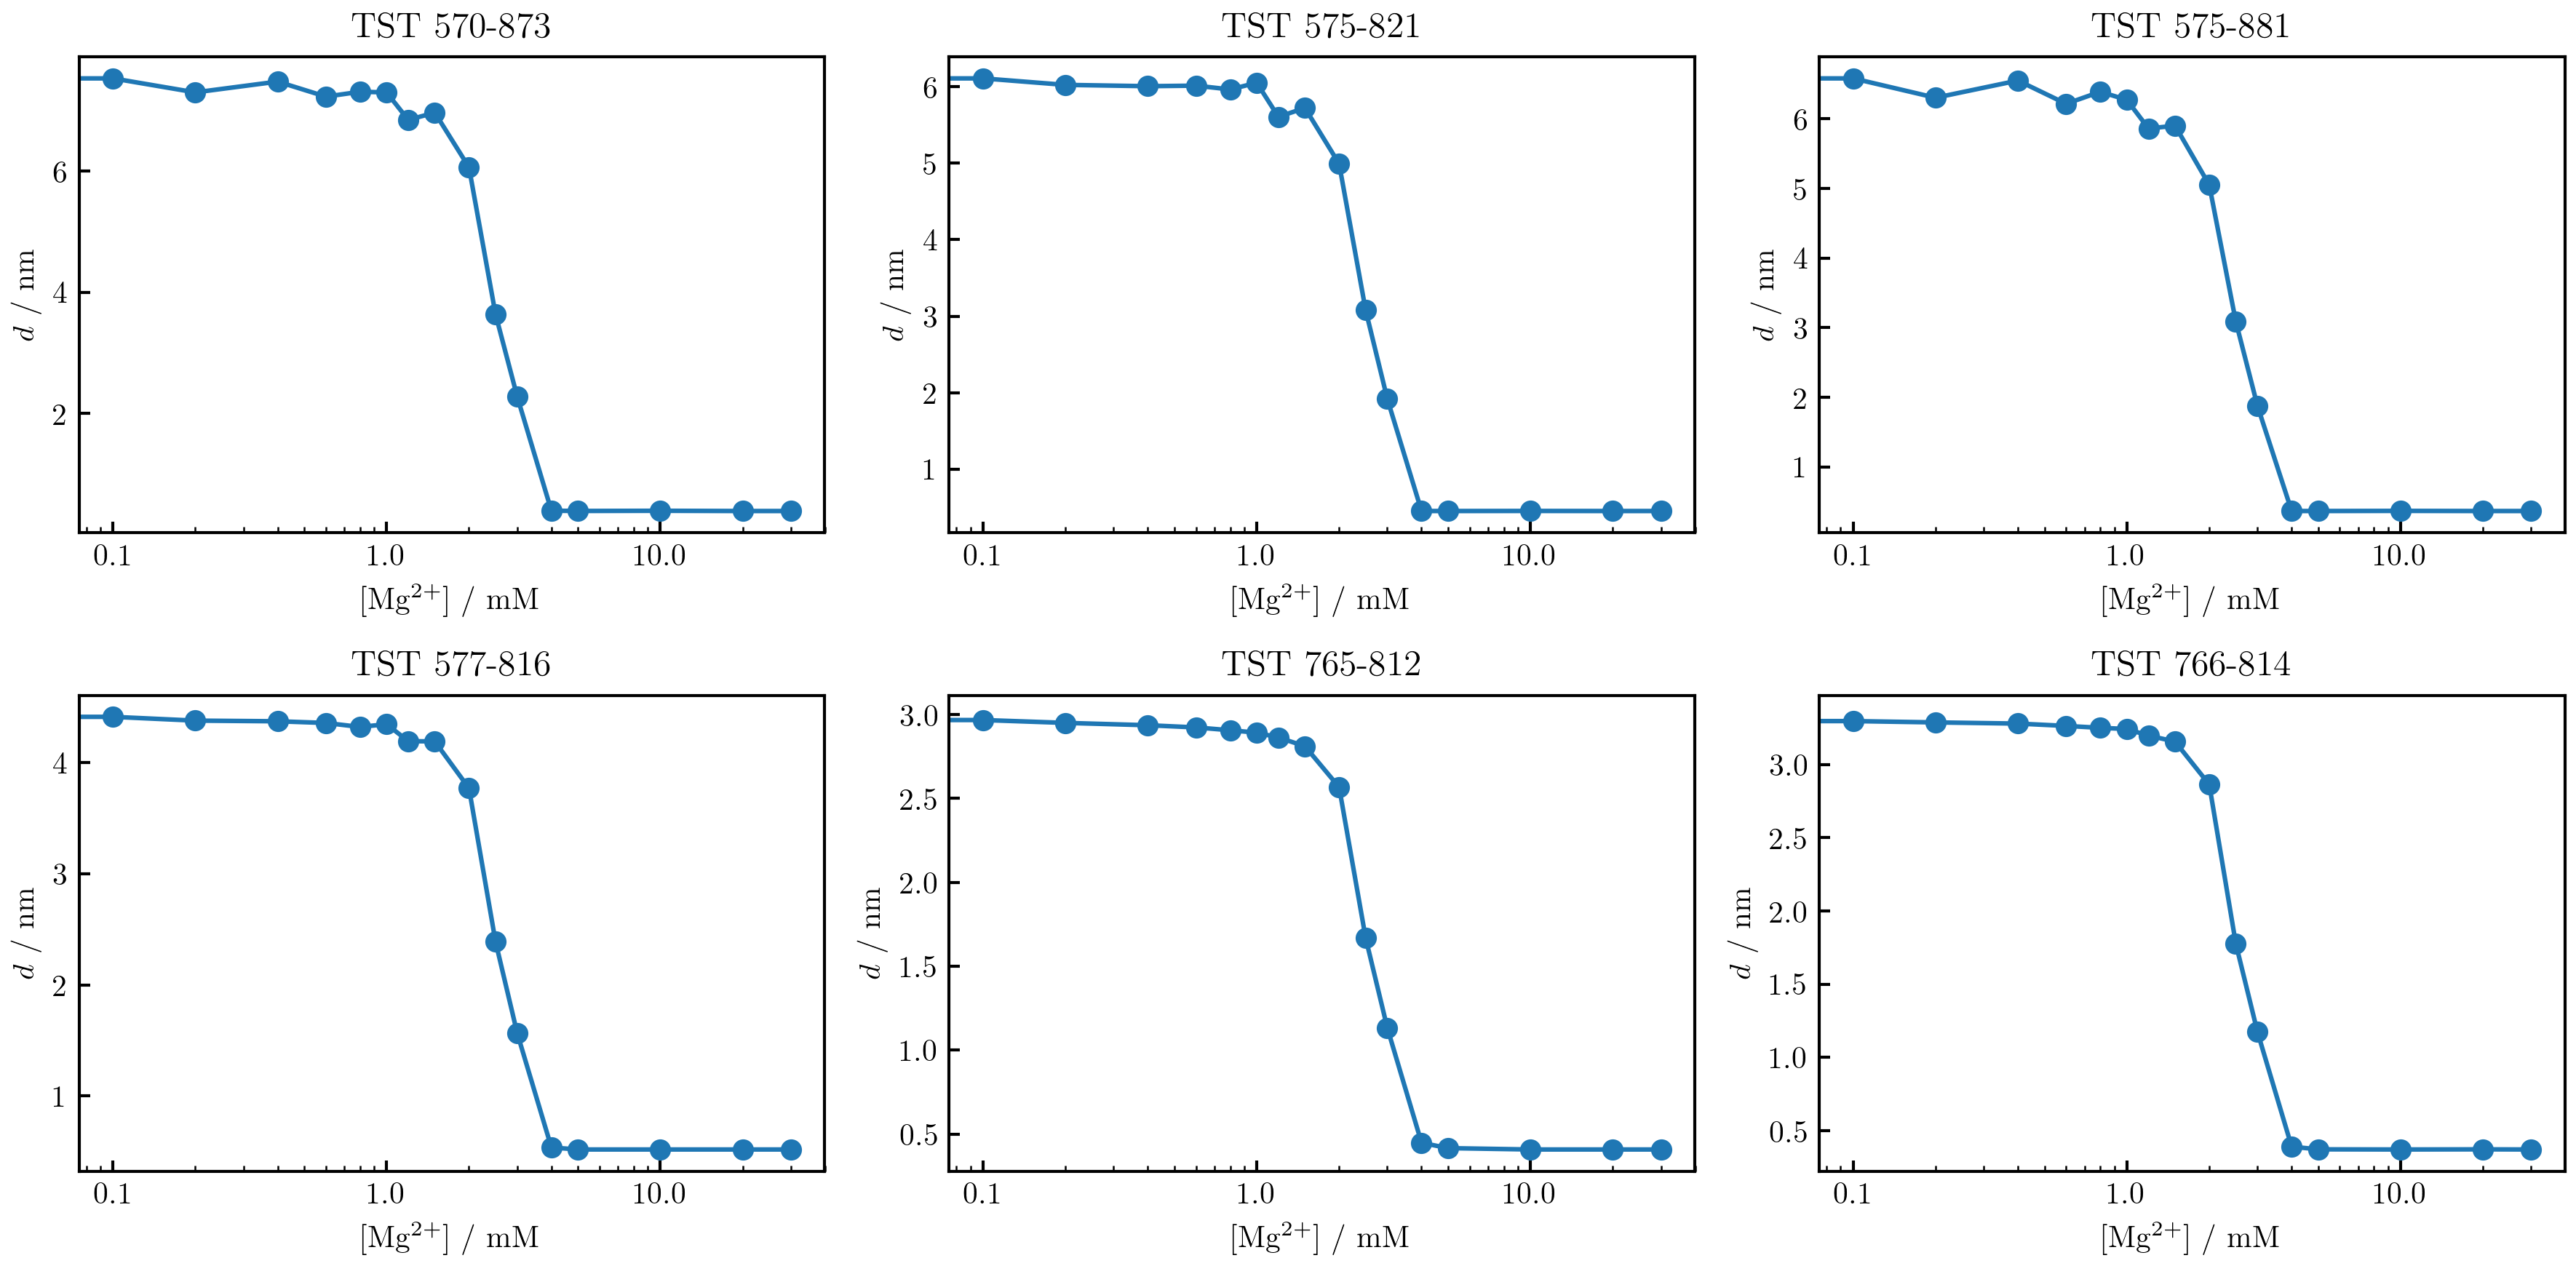

In [25]:
import matplotlib

ncols = 3
nrows = 2
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(4*ncols, 3*nrows), dpi=300)

for itst, tst in enumerate(sorted(tertiary_stack_imp_pairs.keys())):

    imp1, imp2 = tertiary_stack_imp_pairs[tst]
    
    xs = []
    ys =[]
    for l in open('./tertiary_stacking/average_dist.{:d}_{:d}.out'.format(imp1,imp2)):
        lsp = l.split()
        xs.append(float(lsp[0])*1000.0)
        ys.append(float(lsp[1])*0.1)
    
    icol = itst % ncols
    irow = itst // ncols
    ax = axs[irow,icol]

    ax.set_title('TST {:s}'.format(tst))

    ax.plot(xs,ys, 'o-')
    ax.set_ylabel(r'$d$ / nm')
    ax.set_xlabel(r'[Mg$^{2+}$] / mM')

    #ax.set_ylim(-0.05, 1.05)

    ax.set_xscale('log')
    ax.set_xticks([0.1, 1, 10])
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

fig.savefig('TST_distances_separate.pdf', dpi=300)

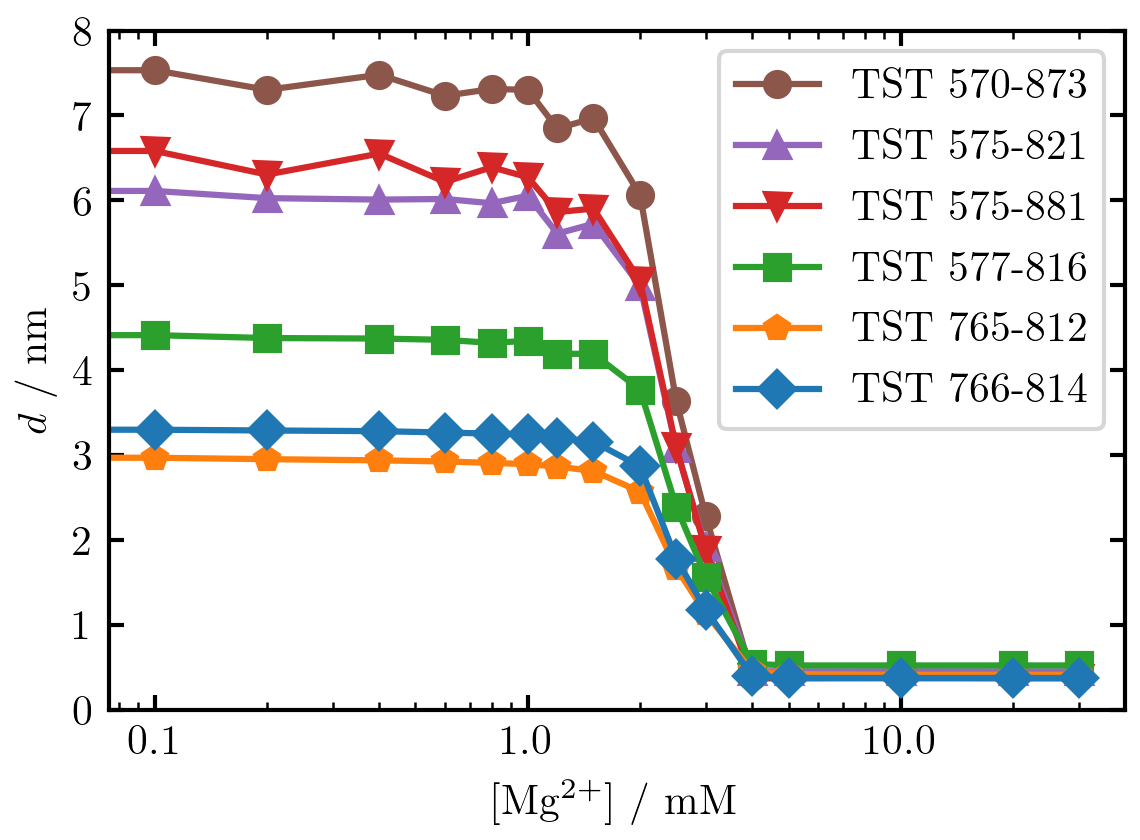

In [31]:
import matplotlib

fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(4*1, 3*1), dpi=300)
    
ax = axs

stack_name = ['570-873', '575-821', '575-881', '577-816', '765-812', '766-814']
marks = ['o-', '^-', 'v-', 's-','p-','D-']
colors = ['C5','C4','C3','C2','C1','C0']
       
for itst, tst in enumerate(sorted(tertiary_stack_imp_pairs.keys())):
    
    imp1, imp2 = tertiary_stack_imp_pairs[tst]
    
    xs = []
    ys =[]
    for l in open('./tertiary_stacking/average_dist.{:d}_{:d}.out'.format(imp1,imp2)):
        lsp = l.split()
        xs.append(float(lsp[0])*1000.0)
        ys.append(float(lsp[1])*0.1)
        
    ax.plot(xs, ys, marks[itst], label='TST {:s}'.format(tst), color=colors[itst])
    
ax.set_ylabel(r'$d$ / nm')
ax.set_xlabel(r'[Mg$^{2+}$] / mM')
ax.yaxis.set_ticks_position('both')

ax.set_ylim(0.0, 8.0)

ax.set_xscale('log')
ax.set_xticks([0.1, 1, 10])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.xaxis.set_ticks_position('both')
ax.legend()

fig.savefig('TST_distances.pdf', dpi=300)
fig.savefig('TST_distances.svg', dpi=300)  # To edit in Inkscape

# Tertiary hydrogen bonding

In [41]:
residues_H = {}
residues_H[19] = range(1,15+1) + range(314,317+1)
residues_H[20] = range(16,26+1) + range(194, 203+1)
residues_H[21] = range(27,90+1)
residues_H[22] = range(91, 111+1) + range(173,193+1)
residues_H[23] = range(112, 172+1)
residues_H[24] = range(204, 259+1)
residues_H[25] = range(260, 265+1) + range(293, 313+1)
residues_H[26] = range(266, 292+1)
residues_H[27] = range(318, 346+1)


# Convert to imp in MDcode
imps_in_H = {}
for iH in range(19,27+1):
    imps_in_H[iH] = []
    for i in residues_H[iH]:
        imp = 3 * (i-1) + 2  # this is base
        if imp - 2 > 0: # the first residue does not have phosphate
            imps_in_H[iH].append(imp-2)  # P
        imps_in_H[iH].append(imp-1) # S
        imps_in_H[iH].append(imp) # B
        
imps_to_H = {}
for ires in range(1,346+1):
    if ires > 1:
        imp = 3 * (ires-1) # P
        for iH in range(19,27+1):
            if imp in imps_in_H[iH]:
                imps_to_H[imp] = iH
                break

    imp = 3 * (ires-1) + 1 # S
    for iH in range(19,27+1):
        if imp in imps_in_H[iH]:
            imps_to_H[imp] = iH
            break
                
    imp = 3 * (ires-1) + 2 # B
    for iH in range(19,27+1):
        if imp in imps_in_H[iH]:
            imps_to_H[imp] = iH
            break

In [64]:
H_search = [(23,24), (24,27), (22,26), (19,25), (20,25), (20,23)]   # (iH, jH) such that iH < jH

In [63]:
# Get hb-dist IDs that are formed in the native structure
HBid_native = []
l = open('MDcode/16SCD_native.hb').readline()
lsp = l.split()

for i in range(0, len(lsp), 2):
    HBid_native.append(int(lsp[i]))

In [65]:
thb_native = {}
for Hpair in thb_search:
    thb_native[Hpair] = []

for l in open('make_ninfo/16SCD.ninfo'):
    if l[0:7] != 'hb-dist':
        continue
    lsp = l.split()
    hbid = int(lsp[1])
    
    # Only consider HBid in the native structure.
    if hbid not in HBid_native:
        continue
    
    imp = int(lsp[4])
    jmp = int(lsp[5])
    
    iH = imps_to_H[imp]
    jH = imps_to_H[jmp]
    
    if iH < jH:
        Hpair = (iH, jH)
    else:
        Hpair = (jH, iH)

    for Hp in H_search:
        if Hpair == Hp:
            thb_native[Hpair].append((hbid, imp, jmp))  # save (id, imp, jmp)

In [72]:
f_out = open('tertiary_HB.list.txt','w')

for Hpair in H_search:
    f_out.write('# H%i - H%i\n' % Hpair)
    print('# H%i - H%i' % Hpair)
    
    for hb in thb_native[Hpair]:
        imp = hb[1]
        jmp = hb[2]
        
        ires = imp / 3 + 1
        jres = jmp / 3 + 1
        
        if imp % 3 == 2:
            itype = 'B'
        elif imp % 3 == 1:
            itype = 'S'
        else:
            itype = 'P'
        if jmp % 3 == 2:
            jtype = 'B'
        elif jmp % 3 == 1:
            jtype = 'S'
        else:
            jtype = 'P'
        
        if ires <= 280:
            ires_orig = ires + 561
        else:
            ires_orig = ires + 567
            
        if jres <= 280:
            jres_orig = jres + 561
        else:
            jres_orig = jres + 567
            
        f_out.write('%6i  %4i %4i  %4i%s %4i%s  %4i%s %4i%s\n' % (hb[0], imp, jmp, ires, itype, jres, jtype, ires_orig, itype, jres_orig, jtype))
        print ('%6i  %4i %4i  %4i%s %4i%s  %4i%s %4i%s' % (hb[0], imp, jmp, ires, itype, jres, jtype, ires_orig, itype, jres_orig, jtype))
    
    f_out.write('\n')
    
f_out.close()

# H23 - H24
 12739   349  646   117S  216S   678S  777S
 12741   349  648   117S  217P   678S  778P
 13855   388  706   130S  236S   691S  797S
 14135   398  676   133B  226S   694B  787S
 14166   401  674   134B  225B   695B  786B
 14170   401  706   134B  236S   695B  797S
 14198   403  673   135S  225S   696S  786S
 14199   404  673   135B  225S   696B  786S
 14203   404  706   135B  236S   696B  797S
 14277   406  670   136S  224S   697S  785S
 14278   407  671   136B  224B   697B  785B
 14280   406  673   136S  225S   697S  786S
 14287   407  709   136B  237S   697B  798S
 14385   409  709   137S  237S   698S  798S
 15430   455  646   152B  216S   713B  777S
 15518   458  647   153B  216B   714B  777B
 15593   459  730   154P  244S   715P  805S
 16535   505  610   169S  204S   730S  765S
 16536   506  612   169B  205P   730B  766P
 16557   505  758   169S  253B   730S  814B
 16619   507  613   170P  205S   731P  766S
# H24 - H27
 18874   623  998   208B  333B   769B  900B
 18924  

## Definition of tertiary HBs

In [3]:
#THB_names = ('H20H23H24','H23H24a', 'H23H24b', 'H24H27', 'H22H26', 'H19H25', 'H20H25')
#THB_names =  ('TC3',       'TC6',     'TC5',    'TC7',    'TC4',     'TC1',    'TC2')

THB_names =  ('TC1',       'TC2',     'TC3',    'TC4',    'TC5',     'TC6',    'TC7')
THB_ihbs = {}

# THB_ihbs['H20H23H24'] = (1765, 1912, 1913, 1914, 16493, 16535, 16536, 16557, 16619)
# THB_ihbs['H23H24a'] = (13855,14135,14166,14170,14198,14199,14203,14277,14278,14280,14280,14287,14385)
# THB_ihbs['H23H24b'] = (12739,12741,15430,15518,15593)
# THB_ihbs['H24H27'] = (18874,18924,18925,20709,20746,20747,20785,20836)
# THB_ihbs['H22H26'] = (11160,11161,11266,17489,17544,17551)
# THB_ihbs['H19H25'] = (1056,1250)
# THB_ihbs['H20H25'] = (2808,2943,3068,18187,18236,18266,18267,18310)

THB_ihbs['TC3'] = (1765, 1912, 1913, 1914, 16493, 16535, 16536, 16557, 16619)
THB_ihbs['TC6'] = (13855,14135,14166,14170,14198,14199,14203,14277,14278,14280,14280,14287,14385)
THB_ihbs['TC5'] = (12739,12741,15430,15518,15593)
THB_ihbs['TC7'] = (18874,18924,18925,20709,20746,20747,20785,20836)
THB_ihbs['TC4'] = (11160,11161,11266,17489,17544,17551)
THB_ihbs['TC1'] = (1056,1250)
THB_ihbs['TC2'] = (2808,2943,3068,18187,18236,18266,18267,18310)

## Make "any" to judge whether certain ihb is one of THB or not.
tmp = []
for THB in THB_names:
    for ihb in THB_ihbs[THB]:
        tmp.append(ihb)
    
THB_ihbs['any'] = tuple(tmp)

In [5]:
kT = 0.615
cM_THBfractions = {}

import os

if os.path.exists('cM_THBfractions.out'):
    for l in open('cM_THBfractions.out','r'):
        lsp = l.split()
        cM = float(lsp[0])
        THB = lsp[1]
        f  = float(lsp[2])
        
        if cM not in cM_THBfractions:
            cM_THBfractions[cM] = {}
            
        if THB in cM_THBfractions[cM]:
            raise KeyError('cM_THBfractions[%s] has already has key %s' % (cM,THB))

        cM_THBfractions[cM][THB] = f
    
else:
    
    f_out = open('cM_THBfractions.out','w')

    for cM in cMs:
        
        num_form = {}
        for THB in THB_names:
            num_form[THB] = 0
            
        nframe = 0
        
        fout_thb = {}
        for THB in THB_names:
            fout_thb[THB] = open('./cM_THBfractions/cM%6.4f_%s.out' % (cM, THB), 'w')
            
        for l in open('MDcode/data/cM%6.4f.hb' % (cM,)):
            nframe += 1
            
            lsp = l.split()
            
            num_form_now = {}
            for THB in THB_names:
                num_form_now[THB] = 0
                
            for isp in range(0,len(lsp),2):
                ihb = int(lsp[isp])
                
                if ihb not in THB_ihbs['any']:
                    continue
                
                for THB in THB_names:
                    if ihb in THB_ihbs[THB]:
                        num_form[THB] += 1
                        num_form_now[THB] += 1
                        break
            
            for THB in THB_names:
                fout_thb[THB].write('%i\n' % (num_form_now[THB],))
                    
        for THB in THB_names:
            frac = num_form[THB] / float(len(THB_ihbs[THB]) * nframe)
            f_out.write('%6.4f %s %f\n' % (cM,THB,frac))
            fout_thb[THB].close()
            
    f_out.close()

## Plot

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


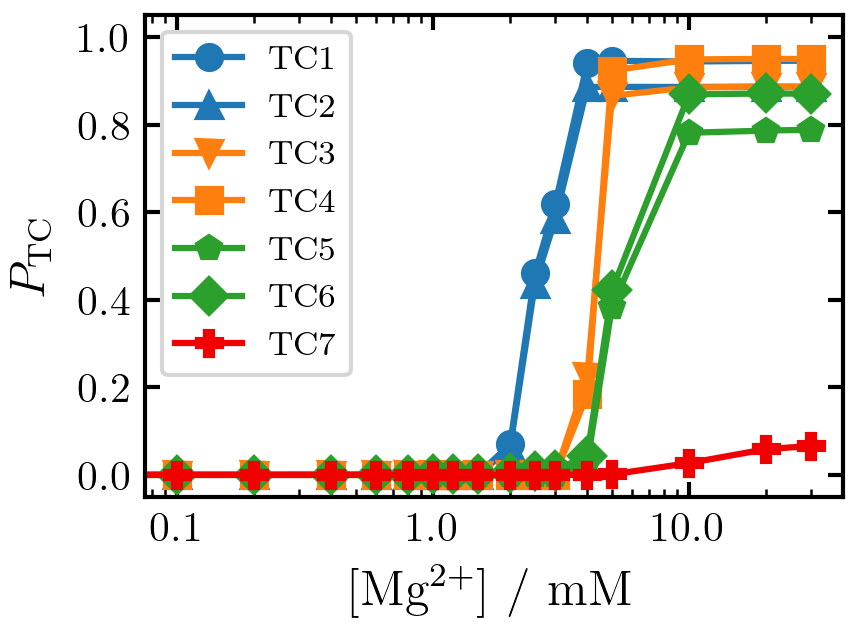

In [14]:
import matplotlib

fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(3, 2.25), dpi=300)
    
ax = axs

#name = ['TC1', '575-821', '575-881', '577-816', '765-812', '766-814']
marks = ['o-', '^-', 'v-', 's-','p-','D-','P-']
#colors = ['#d7b5d8','#d7b5d8','#df65b0','#df65b0','#ce1256','#ce1256', '#f00000']
colors = ['C0','C0','C1','C1','C2','C2', '#f00000']

for iTHB, THB in enumerate(THB_names):

    x = []; y = []
    for cM in cMs:
        if cM not in cM_THBfractions:
            continue
        x.append(cM*1000)
        y.append(cM_THBfractions[cM][THB])
        
    ax.plot(x,y, marks[iTHB], label='%s' % (THB,), color=colors[iTHB])
    
#ax.set_ylabel(r'Contact Fraction', fontsize=12)
ax.set_ylabel(r'$P_{\textrm{TC}}$', fontsize=12)
ax.set_xlabel(r'[Mg$^{2+}$] / mM', fontsize=12)

ax.set_ylim(-0.05, 1.05)
ax.yaxis.set_ticks_position('both')
ax.set_yticks((0.0,0.2,0.4,0.6,0.8,1.0))
ax.set_yticklabels((0.0,0.2,0.4,0.6,0.8,1.0),fontsize=10)

ax.set_xscale('log')
ax.set_xticks([0.1, 1, 10])
ax.set_xticklabels([0.1, 1, 10],fontsize=10)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.xaxis.set_ticks_position('both')
ax.legend()

fig.savefig('TCfractions.pdf', dpi=300)
fig.savefig('TCfractions.svg', dpi=300)

# Mg binding

In [9]:
# dir = './salt_nt'

# concMg_nt = {}
# concK_nt  = {}
# concCl_nt = {}

# for cM in cMs:
    
#     concMg = []
#     concK  = []
#     concCl = []
    
#     for l in open('%s/cM%6.4f.nion' % (dir, cM)):
#         if l[0] == '#':
#             continue
#         lsp = l.split()
#         #concP.append( float(lsp[1]))
#         concMg.append( float(lsp[2]))
#         concK.append(  float(lsp[3]))
#         concCl.append( float(lsp[4]))
        
#     concMg_nt[cM] = concMg
#     concK_nt[cM]  = concK
#     concCl_nt[cM] = concCl

In [10]:
# fig, axs = plt.subplots(nrows=len(cMs), ncols=3,  figsize=(12,2*len(cMs)), dpi= 120, sharex=True)

# x = np.arange(1,345+1)

# for icM, cM in enumerate(cMs):
    
#     ax = axs[icM,0]
#     ax.plot(x, concMg_nt[cM], '-',color='blue')
#     ax.set_ybound(0,)
#     ax.set_ylabel(r'$c^{\ast}_{\mathrm{Mg}}$ / M')
#     ax.set_title('%6.4f' % (cM,), loc='left')
    
#     ax = axs[icM,1]
#     ax.plot(x, concK_nt[cM], '-',color='blue')
#     ax.set_ybound(0,)
#     ax.set_ylabel(r'$c^{\ast}_{\mathrm{Mg}}$ / M')
    
#     ax = axs[icM,2]
#     ax.plot(x, concCl_nt[cM], '-',color='blue')
#     ax.set_ybound(0,)
#     ax.set_ylabel(r'$c^{\ast}_{\mathrm{Mg}}$ / M')

In [11]:

# cM_plot = [0.0002, 0.001, 0.0025, 0.005, 0.020]

# Nrows = len(cM_plot)
# fig, axs = plt.subplots(nrows=Nrows, ncols=1,  figsize=(6,1.5*Nrows), dpi= 120, sharex=False)

# #x = np.arange(2,346+1)
# x = np.append( np.arange(563,841+1), np.arange(848,913+1) )

# # 0.0002
# icM = 0
# cM = cM_plot[icM]
# ax = axs[icM]
# #ax.plot(x, concMg_nt[cM], '-',color='blue')
# ax.bar(x, concMg_nt[cM], color='#a5cfed')
# ax.set_xbound(562, 915)
# ax.set_ybound(0,)
# ax.set_ylabel(r'$c^{\ast}_{}$ / M')
# ax.set_title('(A) 0.2 mM Mg$^{2+}$', loc='left')
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)

# # 0.001
# icM = 1
# cM = cM_plot[icM]
# ax = axs[icM]
# ax.bar(x, concMg_nt[cM], color='#7db9e5')
# ax.set_xbound(562, 915)
# ax.set_ybound(0,)
# ax.set_ylabel(r'$c^{\ast}_{}$ / M')
# ax.set_title('(B) 1 mM Mg$^{2+}$', loc='left')
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)


# # 0.0025
# icM = 2
# cM = cM_plot[icM]
# ax = axs[icM]
# ax.bar(x, concMg_nt[cM], color='#0077cc')
# ax.set_xbound(562, 915)
# ax.set_ybound(0,)
# ax.set_ylabel(r'$c^{\ast}_{}$ / M')
# ax.set_title('(C) 2.5 mM Mg$^{2+}$', loc='left')
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)


# # 0.005
# icM = 3
# cM = cM_plot[icM]
# ax = axs[icM]
# ax.bar(x, concMg_nt[cM], color='#005da0')
# ax.set_xbound(562, 915)
# ax.set_ybound(0,)
# ax.set_ylabel(r'$c^{\ast}_{}$ / M')
# ax.set_title(r'(D) 5 mM Mg$^{2+}$', loc='left')
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)

# # 0.020
# icM = 4
# cM = cM_plot[icM]
# ax = axs[icM]
# ax.bar(x, concMg_nt[cM], color='#00365d')
# ax.set_xbound(562, 915)
# ax.set_ybound(0,)
# ax.set_ylabel(r'$c^{\ast}_{}$ / M')
# ax.set_title('(E) 20 mM Mg$^{2+}$', loc='left')
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.set_xlabel('Nucleotide ID')

# fig.savefig('concMg_nt.pdf', dpi=300)

## Contact Mg concentration (ND)

In [12]:
dir = './salt_nt'

concMg_ND_nt = {}
concK_ND_nt  = {}
concCl_ND_nt = {}

for cM in cMs:
    
    concMg_ND = []
    concK_ND  = []
    concCl_ND = []
    
    for l in open('%s/cM%6.4f.nion_ND' % (dir, cM)):
        if l[0] == '#':
            continue
        lsp = l.split()
        #concP.append( float(lsp[1]))
        concMg_ND.append( float(lsp[2]))
        concK_ND.append(  float(lsp[3]))
        concCl_ND.append( float(lsp[4]))
        
    concMg_ND_nt[cM] = concMg_ND
    concK_ND_nt[cM]  = concK_ND
    concCl_ND_nt[cM] = concCl_ND

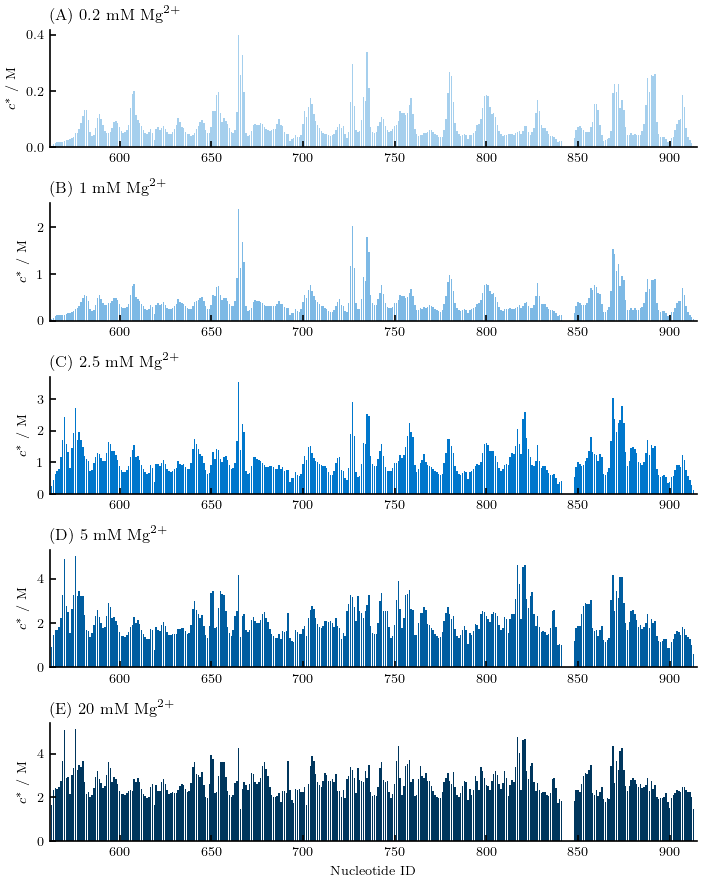

In [56]:

cM_plot = [0.0002, 0.001, 0.0025, 0.005, 0.020]

Nrows = len(cM_plot)
fig, axs = plt.subplots(nrows=Nrows, ncols=1,  figsize=(6,1.5*Nrows), dpi= 120, sharex=False)

#x = np.arange(2,346+1)
x = np.append( np.arange(563,841+1), np.arange(848,913+1) )

# 0.0002
icM = 0
cM = cM_plot[icM]
ax = axs[icM]
#ax.plot(x, concMg_ND_nt[cM], '-',color='blue')
ax.bar(x, concMg_ND_nt[cM], color='#a5cfed')
ax.set_xbound(562, 915)
ax.set_ybound(0,)
ax.set_ylabel(r'$c^{\ast}_{}$ / M')
ax.set_title('(A) 0.2 mM Mg$^{2+}$', loc='left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# 0.001
icM = 1
cM = cM_plot[icM]
ax = axs[icM]
ax.bar(x, concMg_ND_nt[cM], color='#7db9e5')
ax.set_xbound(562, 915)
ax.set_ybound(0,)
ax.set_ylabel(r'$c^{\ast}_{}$ / M')
ax.set_title('(B) 1 mM Mg$^{2+}$', loc='left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# 0.0025
icM = 2
cM = cM_plot[icM]
ax = axs[icM]
ax.bar(x, concMg_ND_nt[cM], color='#0077cc')
ax.set_xbound(562, 915)
ax.set_ybound(0,)
ax.set_ylabel(r'$c^{\ast}_{}$ / M')
ax.set_title('(C) 2.5 mM Mg$^{2+}$', loc='left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# 0.005
icM = 3
cM = cM_plot[icM]
ax = axs[icM]
ax.bar(x, concMg_ND_nt[cM], color='#005da0')
ax.set_xbound(562, 915)
ax.set_ybound(0,)
ax.set_ylabel(r'$c^{\ast}_{}$ / M')
ax.set_title(r'(D) 5 mM Mg$^{2+}$', loc='left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# 0.020
icM = 4
cM = cM_plot[icM]
ax = axs[icM]
ax.bar(x, concMg_ND_nt[cM], color='#00365d')
ax.set_xbound(562, 915)
ax.set_ybound(0,)
ax.set_ylabel(r'$c^{\ast}_{}$ / M')
ax.set_title('(E) 20 mM Mg$^{2+}$', loc='left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Nucleotide ID')

fig.savefig('concMg_ND_nt.pdf', dpi=300)

In [18]:

x = np.append( np.arange(563,841+1), np.arange(848,913+1) )

for c, nt in sorted(zip(concMg_ND_nt[0.0025],x), reverse=True):
    if c > 2.0:
        print (c, nt)

3.5253283224 665
3.0256891972 869
2.88741176882 727
2.77960014076 874
2.71357018171 576
2.59954104338 821
2.51112804736 735
2.4519373496 736
2.4242694289 570
2.37863290353 820
2.37316149449 870
2.34617749993 873
2.24800301278 758
2.23849022207 872
2.23544364204 875
2.2159828349 667
2.04270082371 817


In [21]:
x = np.append( np.arange(563,841+1), np.arange(848,913+1) )

for c, nt in sorted(zip(concMg_ND_nt[0.0050],x), reverse=True):
    if c > 3.0:

        print ('{:5.3f} {:d}'.format(c, nt))

5.035 576
4.890 570
4.631 817
4.594 821
4.542 820
4.185 869
4.166 665
4.071 874
4.069 873
3.912 752
3.754 818
3.486 758
3.444 578
3.442 651
3.436 871
3.427 655
3.409 825
3.359 650
3.351 743
3.312 656
3.293 757
3.282 726
3.274 575
3.271 569
3.266 756
3.266 657
3.244 736
3.237 580
3.212 579
3.202 577
3.201 824
3.199 730
3.170 727
3.140 872
3.090 822
3.080 816
3.053 751
3.029 868
3.017 857


```
CJ: Central Junction
TWJ: Three-Way Junction

5.035 576  CJ
4.890 570  CJ
4.631 817  CJ
4.594 821  CJ
4.542 820  CJ
4.185 869  h25
4.166 665  h22 elbow
4.071 874  h25
4.069 873  h25
3.912 752  TWJ (h22)
3.754 818  CJ
3.486 758  h20
3.444 578  h20 (CJ)
3.442 651  TWJ (h21)
3.436 871  h25
3.427 655  TWJ (h22)
3.409 825  h25
3.359 650  TWJ (h21)
3.351 743  h21
3.312 656  TWJ (h22)
3.293 757  h20
3.282 726  h22
3.274 575  CJ
3.271 569  CJ (h19)
3.266 756  TWJ (h20)
3.266 657  H22 upper TWJ
3.244 736  H22
3.237 580  H20
3.212 579  H20 near CJ
3.202 577  CJ
3.201 824
3.199 730
3.170 727
3.140 872
3.090 822
3.080 816
3.053 751
3.029 868
3.017 857
```

### Generate data files to deposit

In [29]:
outdir = './Zenodo/ContactMgConcentrations/'

x = np.append( np.arange(563,841+1), np.arange(848,913+1) )

for cM in cMs:
    
    f_out = open('{:s}{:6.4f}.dat'.format(outdir, cM), 'w')
    
    f_out.write('# Contact Mg concentration at [Mg] = {:6.4f}\n'.format(cM))
    f_out.write('## 1st column: Nucleotide number\n')
    f_out.write('## 2nd column: Contact Mg concentration (M)\n')
    
    for nt, c in zip(x, concMg_ND_nt[cM]):
        
        f_out.write('{:4d} {:5.3f}\n'.format(nt, c))
        
    f_out.close()

## Total number of bound Mg

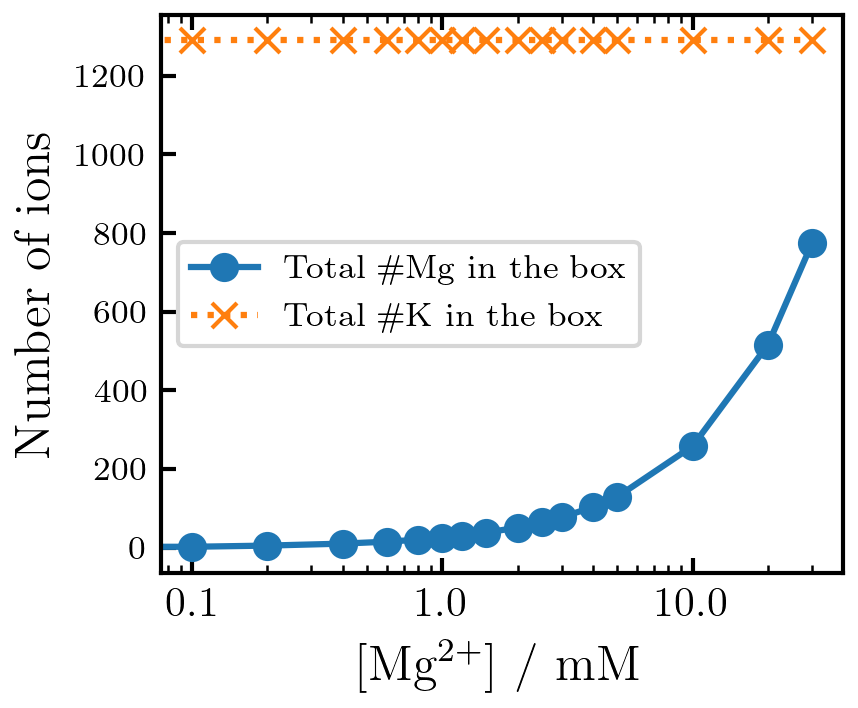

In [115]:
fig, axs = plt.subplots(nrows=1, ncols=1,  figsize=(3,2.5), dpi= 300)

ax = axs
ax.plot([cM*1000 for cM in cMs], [cM_nMgs[cM] for cM in cMs], 'o-', label=r'Total \#Mg in the box')
ax.plot([cM*1000 for cM in cMs], [cM_nKs[cM] for cM in cMs], 'x:', label=r'Total \#K in the box')

ax.set_xlabel(r'[Mg$^{2+}$] / mM', fontsize=12)
ax.set_ylabel(r'Number of ions', fontsize=12)

ax.set_xscale('log')
ax.set_xticks([0.1, 1, 10])
ax.set_xticklabels([0.1, 1, 10],fontsize=10)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.xaxis.set_ticks_position('both')
ax.legend()

fig.savefig('nions_total.pdf')

In [59]:
if INITIAL_RUN:
    
    f_out = open('boundsalt.total','w')
    
    for cM in cMs:
        
        nMg = 0 
        nK = 0
        n = 0
        for l in open('./salt_nt/cM%6.4f.boundsalt.total' % cM):
            lsp = l.split()
            nMg += int(lsp[0])
            nK += int(lsp[1])
            n += 1
        
        f_out.write('%6.4f  %f  %f\n' % (cM, nMg/n, nK/n))

    f_out.close()
    
    
    f_out = open('boundsalt.PBC.total','w')
    
    for cM in cMs:
        
        nMg = 0 
        nK = 0
        n = 0
        for l in open('./salt_nt/cM%6.4f.PBC.boundsalt.total' % cM):
            lsp = l.split()
            nMg += int(lsp[0])
            nK += int(lsp[1])
            n += 1
        
        f_out.write('%6.4f  %f  %f\n' % (cM, nMg/n, nK/n))

    f_out.close()

In [86]:
boundMg = {}
boundK = {}

for l in open('./boundsalt.total'):
    lsp = l.split()
    cM = float(lsp[0])
    boundMg[cM] = float(lsp[1])
    boundK[cM] = float(lsp[2])
    
freeMg = {}
for cM in cMs:
    freeMg[cM] = cM_nMgs[cM] - boundMg[cM]
 

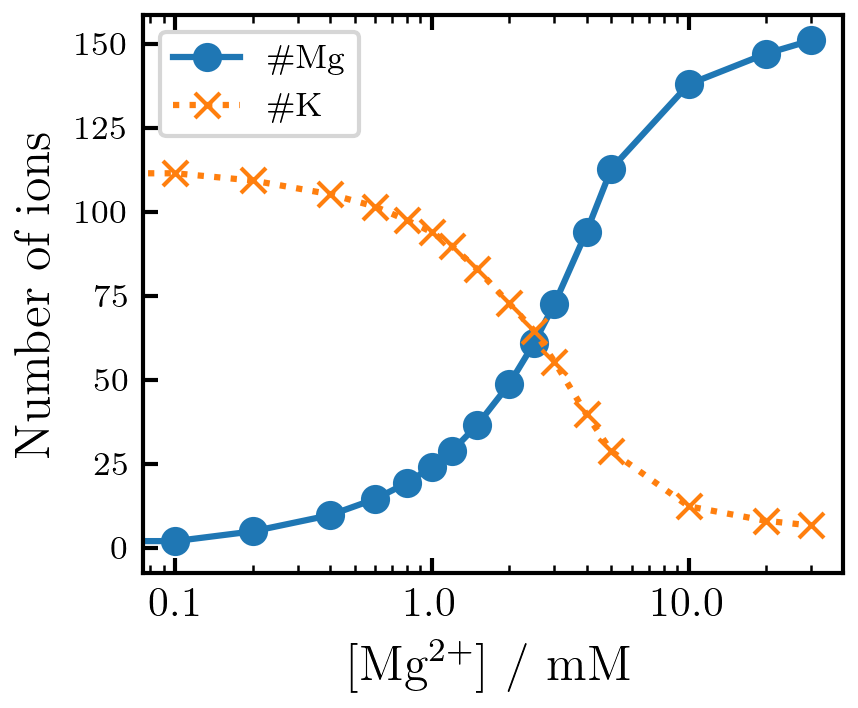

In [112]:
fig, axs = plt.subplots(nrows=1, ncols=1,  figsize=(3,2.5), dpi= 300)

ax = axs
ax.plot([cM*1000 for cM in cMs], [boundMg[cM] for cM in cMs], 'o-', label=r'\#Mg')
ax.plot([cM*1000 for cM in cMs], [boundK[cM] for cM in cMs], 'x:', label=r'\#K')

ax.set_xlabel(r'[Mg$^{2+}$] / mM', fontsize=12)
ax.set_ylabel(r'Number of ions', fontsize=12)

ax.set_xscale('log')
ax.set_xticks([0.1, 1, 10])
ax.set_xticklabels([0.1, 1, 10],fontsize=10)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.xaxis.set_ticks_position('both')
ax.legend()

fig.savefig('nions_bound.pdf')

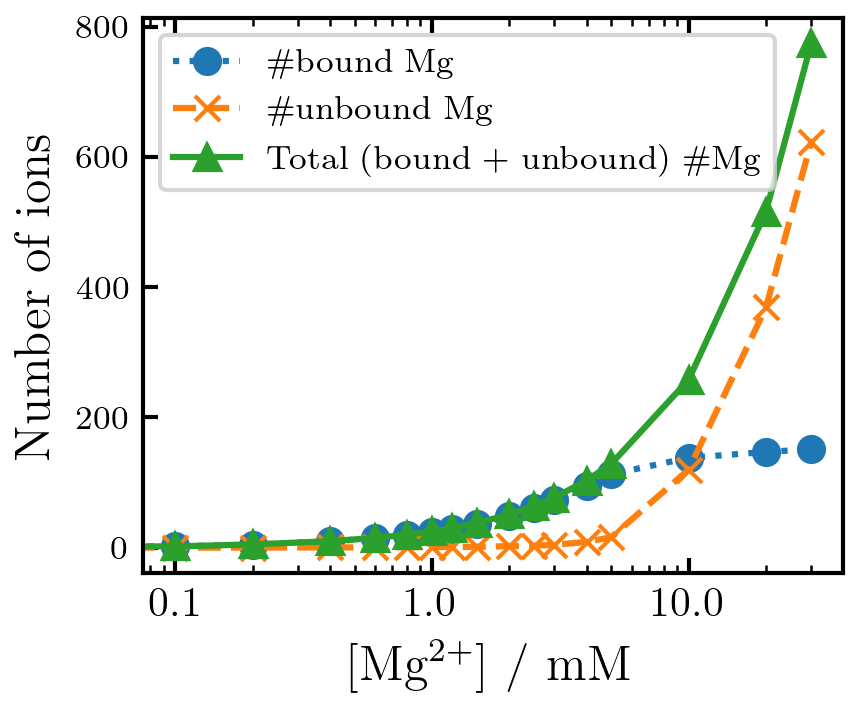

In [119]:
fig, axs = plt.subplots(nrows=1, ncols=1,  figsize=(3,2.5), dpi= 300)

ax = axs
ax.plot([cM*1000 for cM in cMs], [boundMg[cM] for cM in cMs], 'o:', label=r'\#bound Mg')
ax.plot([cM*1000 for cM in cMs], [freeMg[cM] for cM in cMs], 'x--', label=r'\#unbound Mg')
ax.plot([cM*1000 for cM in cMs], [cM_nMgs[cM] for cM in cMs], '^-', label=r'Total (bound + unbound) \#Mg')

ax.set_xlabel(r'[Mg$^{2+}$] / mM', fontsize=12)
ax.set_ylabel(r'Number of ions', fontsize=12)

ax.set_xscale('log')
ax.set_xticks([0.1, 1, 10])
ax.set_xticklabels([0.1, 1, 10],fontsize=10)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.xaxis.set_ticks_position('both')
ax.legend()

fig.savefig('nions_Mg.pdf')

In [116]:
# Calculate the bulk Mg concentrations based on the number of free Mg in the box

#nMg = int( cM *6.022*0.0001*volume)
volume = 350.0 * 350.0 * 350.0

unbound_cMs = {}
for cM in cMs:
    nMg = freeMg[cM]
    conc = nMg / (6.022*0.0001*volume)
    unbound_cMs[cM] = conc
    
    print('%6.4f  %f' % (cM, conc))

0.0000  0.000000
0.0001  0.000003
0.0002  0.000007
0.0004  0.000014
0.0006  0.000021
0.0008  0.000029
0.0010  0.000035
0.0012  0.000045
0.0015  0.000059
0.0020  0.000089
0.0025  0.000120
0.0030  0.000172
0.0040  0.000345
0.0050  0.000626
0.0100  0.004649
0.0200  0.014290
0.0300  0.024128


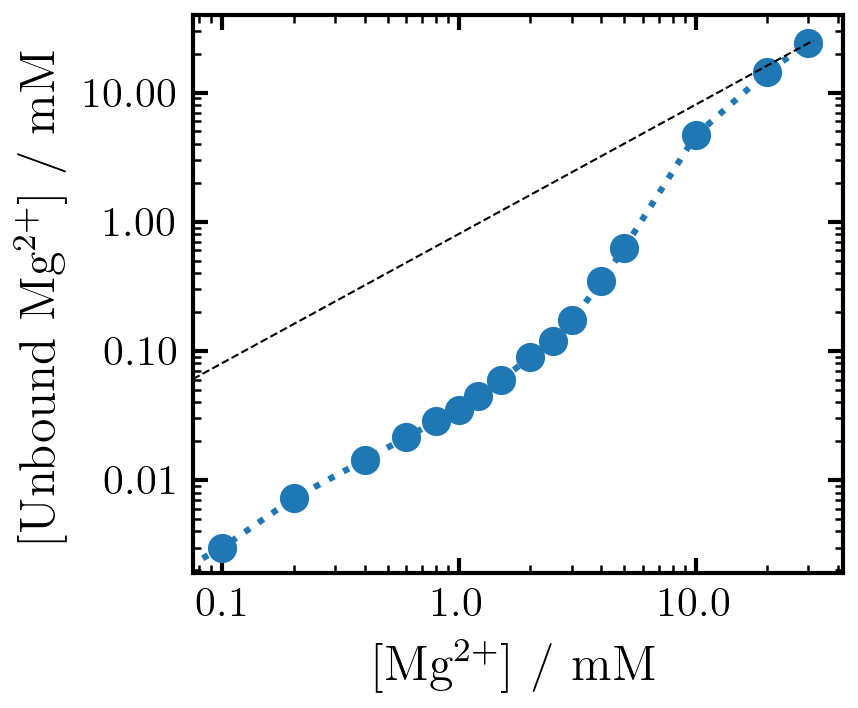

In [118]:
fig, axs = plt.subplots(nrows=1, ncols=1,  figsize=(3,2.5), dpi= 300)

ax = axs
ax.plot([cM*1000 for cM in cMs], [unbound_cMs[cM] * 1000 for cM in cMs], 'o:')

ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c="k", linewidth=0.5)
#ax.plot((0.1,30), (bulk_cMs[0.0000], bulk_cMs[0.0300]), ls="-", c=".3")

ax.set_xlabel(r'[Mg$^{2+}$] / mM', fontsize=12)
ax.set_ylabel(r'[Unbound Mg$^{2+}$] / mM', fontsize=12)

ax.set_yscale('log')
ax.set_yticks([0.01, 0.1, 1, 10])
ax.set_yticklabels([0.01, 0.1, 1, 10],fontsize=10)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.yaxis.set_ticks_position('both')

ax.set_xscale('log')
ax.set_xticks([0.1, 1, 10])
ax.set_xticklabels([0.1, 1, 10],fontsize=10)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.xaxis.set_ticks_position('both')

#ax.legend()
fig.savefig('nions_Unbound_conc.pdf')

## Correlations between Mg and structures

### Correlation between Mg and H19

In [54]:
Np = 345

import math

for cM in cMs:
    
    if cM == 0.0:
        continue
    
    f_mg = open('mg_correlation/cM%6.4f.mg_bound_4.4' % (cM,))
    f_H = open('cM_Hfractions_allornone/cM%6.4f_H19.out' % (cM,))

    table = []
    for i in range(Np):
        table.append([0,0,0,0])

    for lmg, lH in zip(f_mg, f_H):

        nH = int(lH)

        for iP in range(Np):
            if int(lmg[iP:iP+1]) == 0:
                if nH == 0:
                    table[iP][0] += 1   # Unbound, Not formed
                else:
                    table[iP][1] += 1   # Unbound, Formed
            else:
                if nH == 0:
                    table[iP][2] += 1   # Bound, Not formed
                else:
                    table[iP][3] += 1   # Bound, Formed

    f_out = open('mg_correlation/H19/cor_cM%6.4f_H19.out' % (cM,),'w')

    for iP in range(Np):
        c00 = table[iP][0]   # Unbound, Not formed
        c01 = table[iP][1]   # Unbound, Formed
        c10 = table[iP][2]   # Bound, Not formed
        c11 = table[iP][3]   # Bound, Formed
        c0x = c00 + c01  # P1
        c1x = c10 + c11  # Q1
        cx0 = c00 + c10  # P2
        cx1 = c01 + c11  # Q2
                   
        f_out.write('%i  %i %i %i %i' % (iP+2,c00,c01,c10,c11))

        if c01*c10 == 0:
            f_out.write('  %s %s' % ('NaN','NaN'))
        else:
            oddsratio = c00*c11 / float(c01*c10)
            if oddsratio == 0.0:
                f_out.write('  %s %.2f' % ('NaN',0.0))
            else:
                ddG = -kT * math.log(oddsratio)
                f_out.write('  %.2f %.2f' % (ddG, oddsratio))

        s = c0x * c1x * cx0 * cx1
        if s == 0:
            f_out.write('  %s %s %s\n' % ('NaN','NaN','NaN'))
        else:
            phi = (c00*c11 - c10*c01) / math.sqrt(float(s))

            if c0x > cx0: # P1 > P2 ==> Q1 < Q2 (c1x < cx1)
                phimax = math.sqrt((cx0 * c1x) / float(cx1 * c0x))
            else:
                phimax = math.sqrt((cx1 * c0x) / float(cx0 * c1x))

            f_out.write('  %.2f %.2f %.2f\n' % (phi, phimax, phi/phimax,))

    f_out.close()

### Correlation between Mg and TC(THB)

In [48]:
Np = 345

import math

for cM in cMs:
    
    if cM == 0.0:
        continue
        
    for THB in THB_names:
        
        f_mg = open('mg_correlation/cM%6.4f.mg_bound_4.4' % (cM,))
        f_TC = open('cM_THBfractions/cM%6.4f_%s.out' % (cM,THB))
        
        table = []
        for i in range(Np):
            table.append([0,0,0,0])
        
        for lmg, lTC in zip(f_mg, f_TC):
            
            nTC = int(lTC)
            
            for iP in range(Np):
                if int(lmg[iP:iP+1]) == 0:
                    if nTC == 0:
                        table[iP][0] += 1   # Unbound, Not formed
                    else:
                        table[iP][1] += 1   # Unbound, Formed
                else:
                    if nTC == 0:
                        table[iP][2] += 1   # Bound, Not formed
                    else:
                        table[iP][3] += 1   # Bound, Formed

        f_out = open('mg_correlation/TC/cor_cM%6.4f_%s.out' % (cM,THB),'w')
        
        for iP in range(Np):
            c00 = table[iP][0]   # Unbound, Not formed
            c01 = table[iP][1]   # Unbound, Formed
            c10 = table[iP][2]   # Bound, Not formed
            c11 = table[iP][3]   # Bound, Formed
            c0x = c00 + c01  # P1
            c1x = c10 + c11  # Q1
            cx0 = c00 + c10  # P2
            cx1 = c01 + c11  # Q2
            
            f_out.write('%i  %i %i %i %i' % (iP+2,c00,c01,c10,c11))
            
            if c01*c10 == 0:
                f_out.write('  %s %s' % ('NaN','NaN'))
            else:
                oddsratio = c00*c11 / float(c01*c10)
                if oddsratio == 0.0:
                    f_out.write('  %s %.2f' % ('NaN',0.0))
                else:
                    ddG = -kT * math.log(oddsratio)
                    f_out.write('  %.2f %.2f' % (ddG, oddsratio))
                
            s = c0x * c1x * cx0 * cx1
            if s == 0:
                f_out.write('  %s %s %s\n' % ('NaN','NaN','NaN'))
            else:
                phi = (c00*c11 - c10*c01) / math.sqrt(float(s))
                
                if c0x > cx0: # P1 > P2 ==> Q1 < Q2 (c1x < cx1)
                    phimax = math.sqrt((cx0 * c1x) / float(cx1 * c0x))
                else:
                    phimax = math.sqrt((cx1 * c0x) / float(cx0 * c1x))

                f_out.write('  %.2f %.2f %.2f\n' % (phi, phimax, phi/phimax,))

        f_out.close()

In [7]:
# Nucleotides

import numpy as np

x = np.append( np.arange(563,841+1), np.arange(848,913+1) )
y = []

for l in open('./mg_correlation/TC/cor_cM0.0025_TC1.out'):
    lsp = l.split()
    y.append(float(lsp[5]))

ini = 0
end = 0
for nt, ddg in zip(x,y):
    if not ini:
        if ddg < 0:
            ini = nt
            end = 0
    else:
        if ddg < 0:
            end = nt
        elif not end:
            print(ini)
            ini = 0
            end = 0
        else:
            print(ini,end)
            ini = 0
            end = 0

if not ini:
    if not end:
        print(ini)
    else:
        print(ini, end)

563 581
583 587
756 760
763 767
809 826
863 864
872 884
886
888


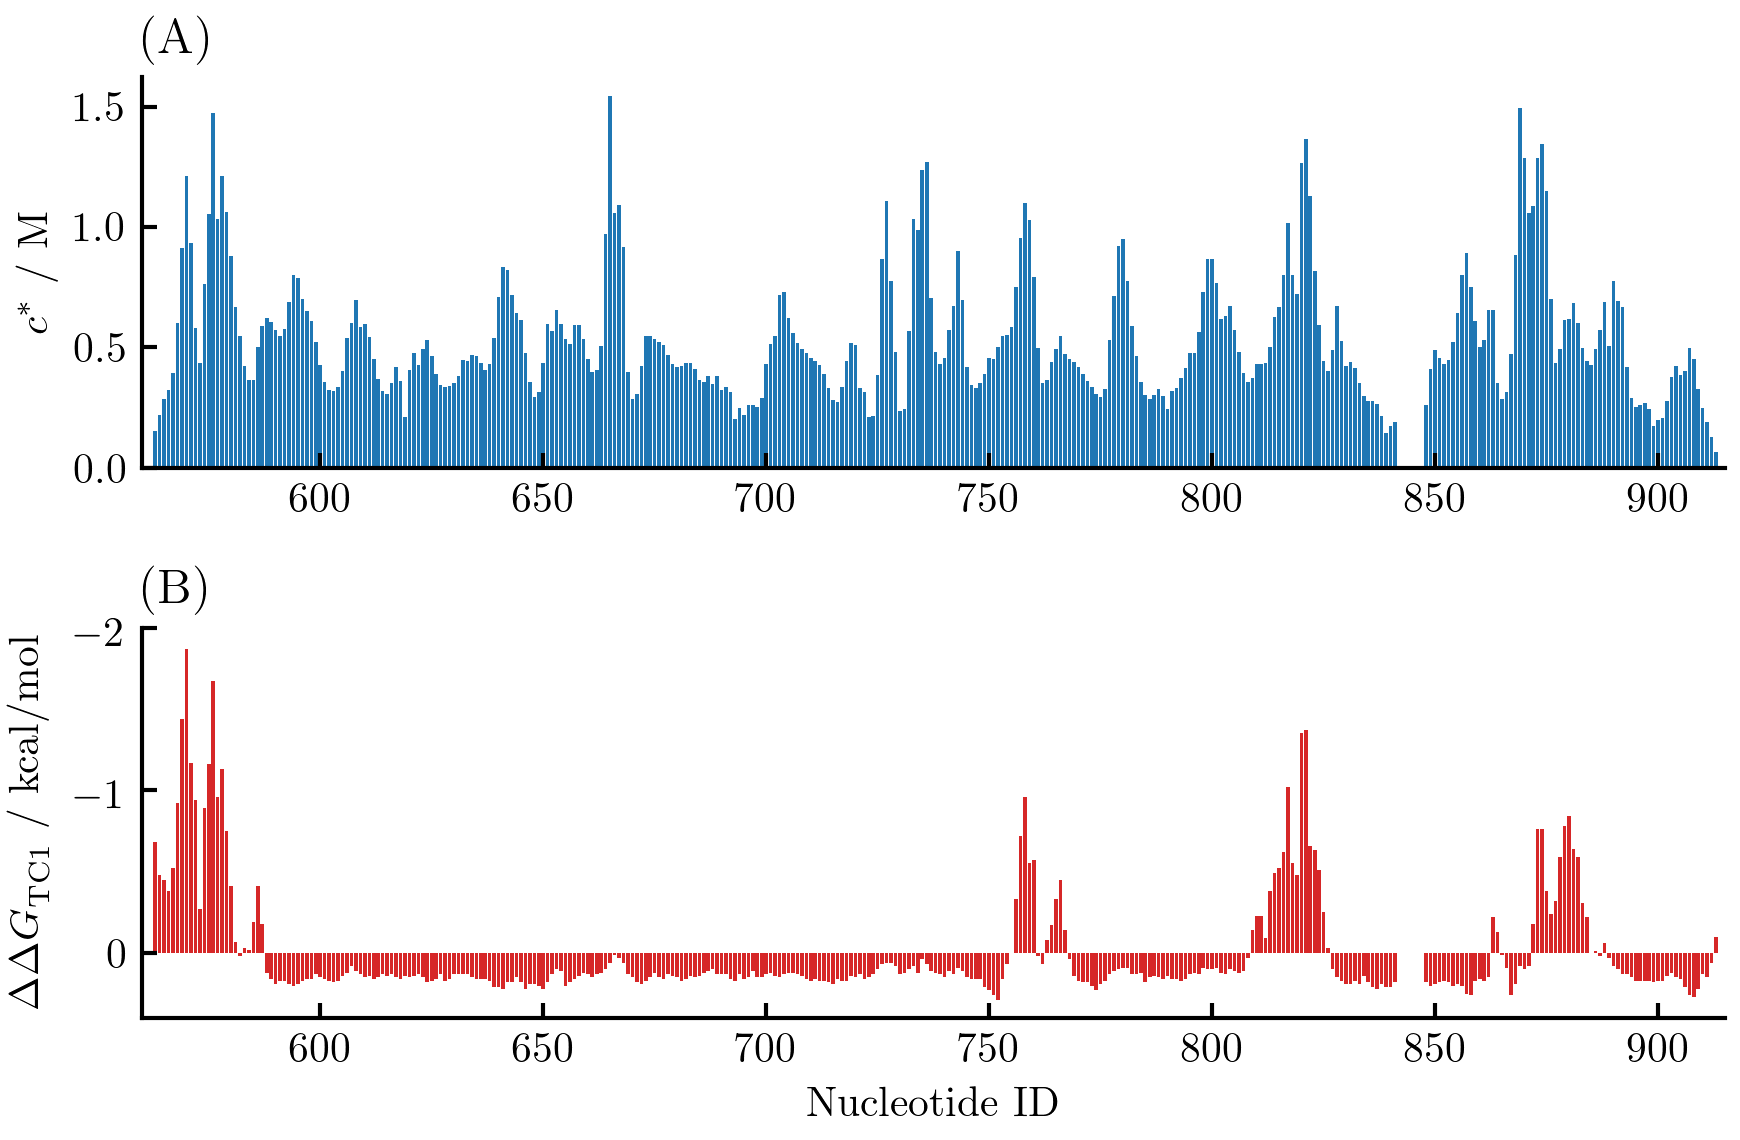

In [86]:
# 0.0025 TC1

Nrows=2
fig, axs = plt.subplots(nrows=Nrows, ncols=1,  figsize=(6,2*Nrows), dpi= 300, sharex=False)

#x = np.arange(2,346+1)
x = np.append( np.arange(563,841+1), np.arange(848,913+1) )

cM = 0.0025
ax = axs[0]
ax.bar(x, concMg_nt[cM], color='C0')
ax.set_xbound(560, 915)
ax.set_ybound(0,)
ax.set_ylabel(r'$c^{\ast}_{}$ / M')
ax.set_title('(A)', loc='left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = axs[1]
y = []
for l in open('./mg_correlation/TC/cor_cM0.0025_TC1.out'):
    lsp = l.split()
    y.append(float(lsp[5]))
ax.bar(x, y, color='C3')
ax.set_xbound(560, 915)
ax.set_ybound(-2,)
ax.set_ylabel(r'$\Delta\Delta G^{}_{\rm{TC1}}$ / kcal/mol')
ax.set_xlabel('Nucleotide ID')
ax.set_title('(B)', loc='left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.invert_yaxis()

fig.savefig('cor_cM0.0025_TC1.pdf', dpi=300)

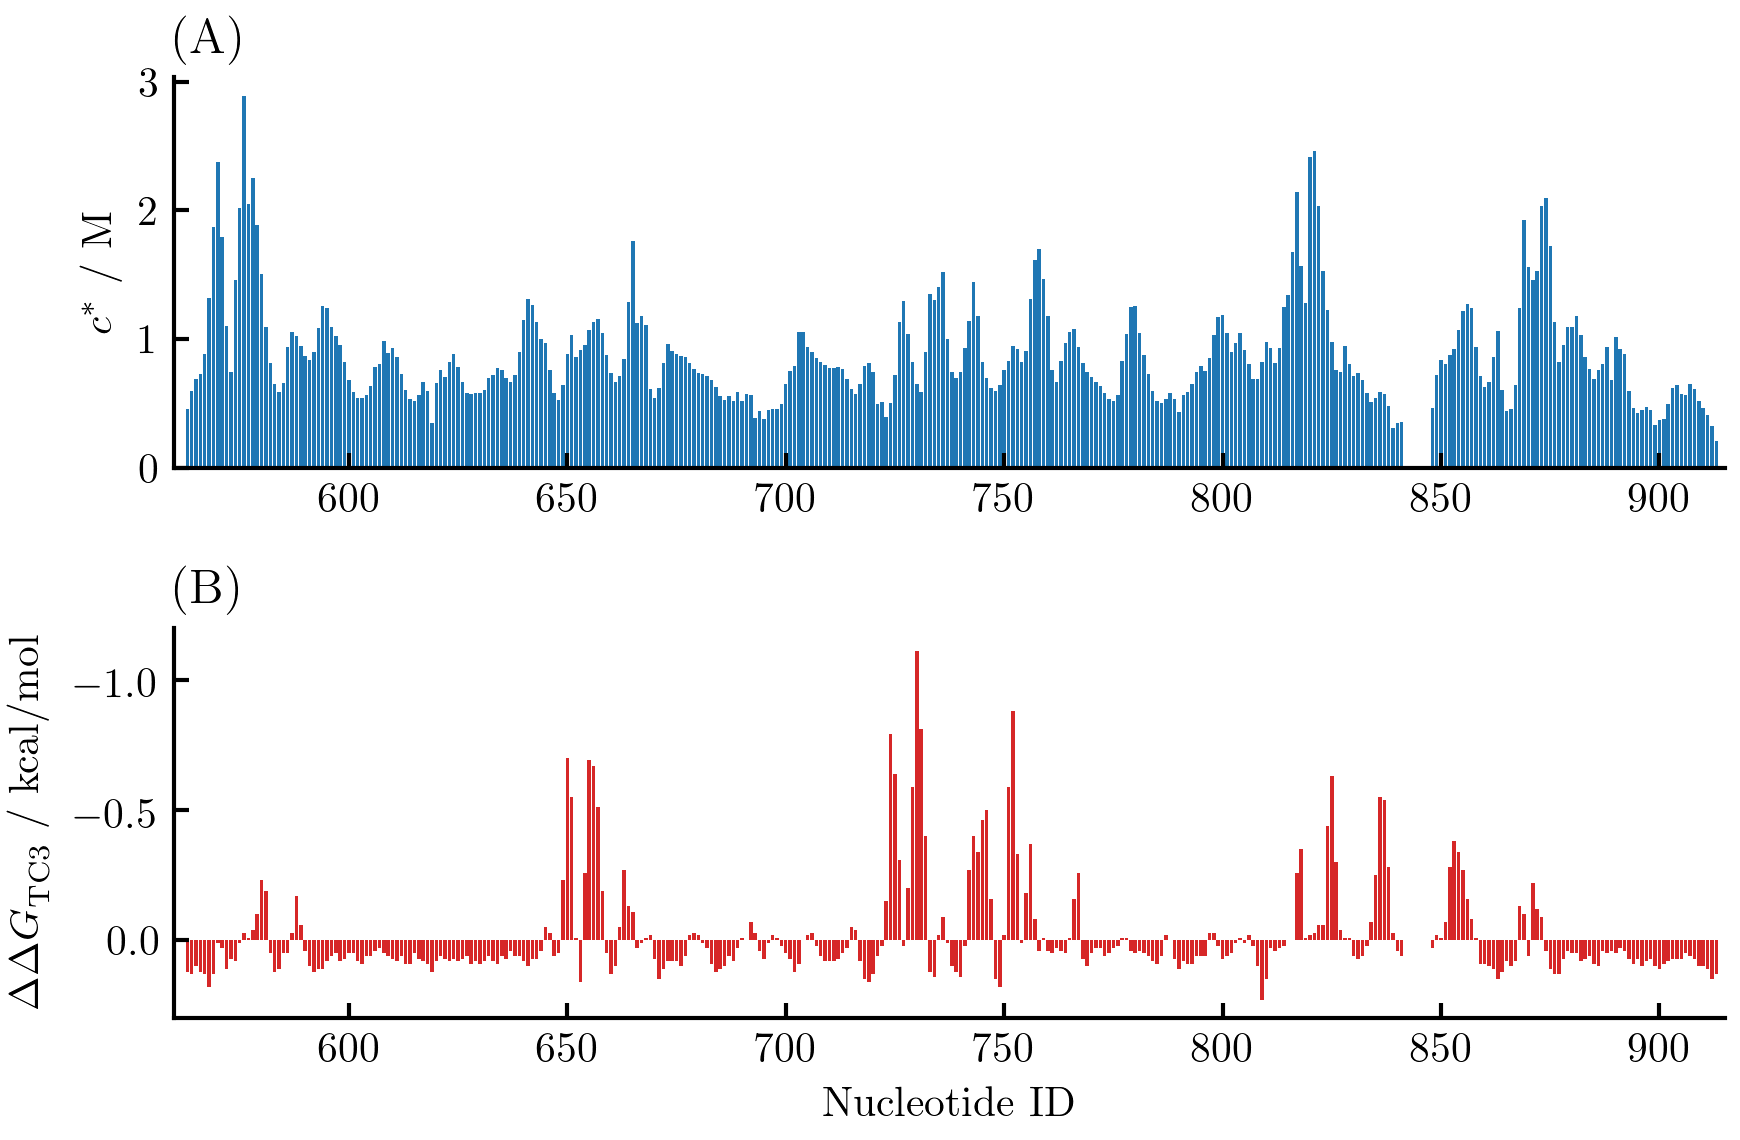

In [89]:
# 0.0040 TC3

Nrows=2
fig, axs = plt.subplots(nrows=Nrows, ncols=1,  figsize=(6,2*Nrows), dpi= 300, sharex=False)

#x = np.arange(2,346+1)
x = np.append( np.arange(563,841+1), np.arange(848,913+1) )

cM = 0.0040
ax = axs[0]
ax.bar(x, concMg_nt[cM], color='C0')
ax.set_xbound(560, 915)
ax.set_ybound(0,)
ax.set_ylabel(r'$c^{\ast}_{}$ / M')
ax.set_title('(A)', loc='left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = axs[1]
y = []
for l in open('./mg_correlation/TC/cor_cM0.0040_TC3.out'):
    lsp = l.split()
    y.append(float(lsp[5]))
ax.bar(x, y, color='C3')
ax.set_xbound(560, 915)
ax.set_ybound(-1.2,)
ax.set_ylabel(r'$\Delta\Delta G^{}_{\rm{TC3}}$ / kcal/mol')
ax.set_xlabel('Nucleotide ID')
ax.set_title('(B)', loc='left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.invert_yaxis()

fig.savefig('cor_cM0.0040_TC3.pdf', dpi=300)

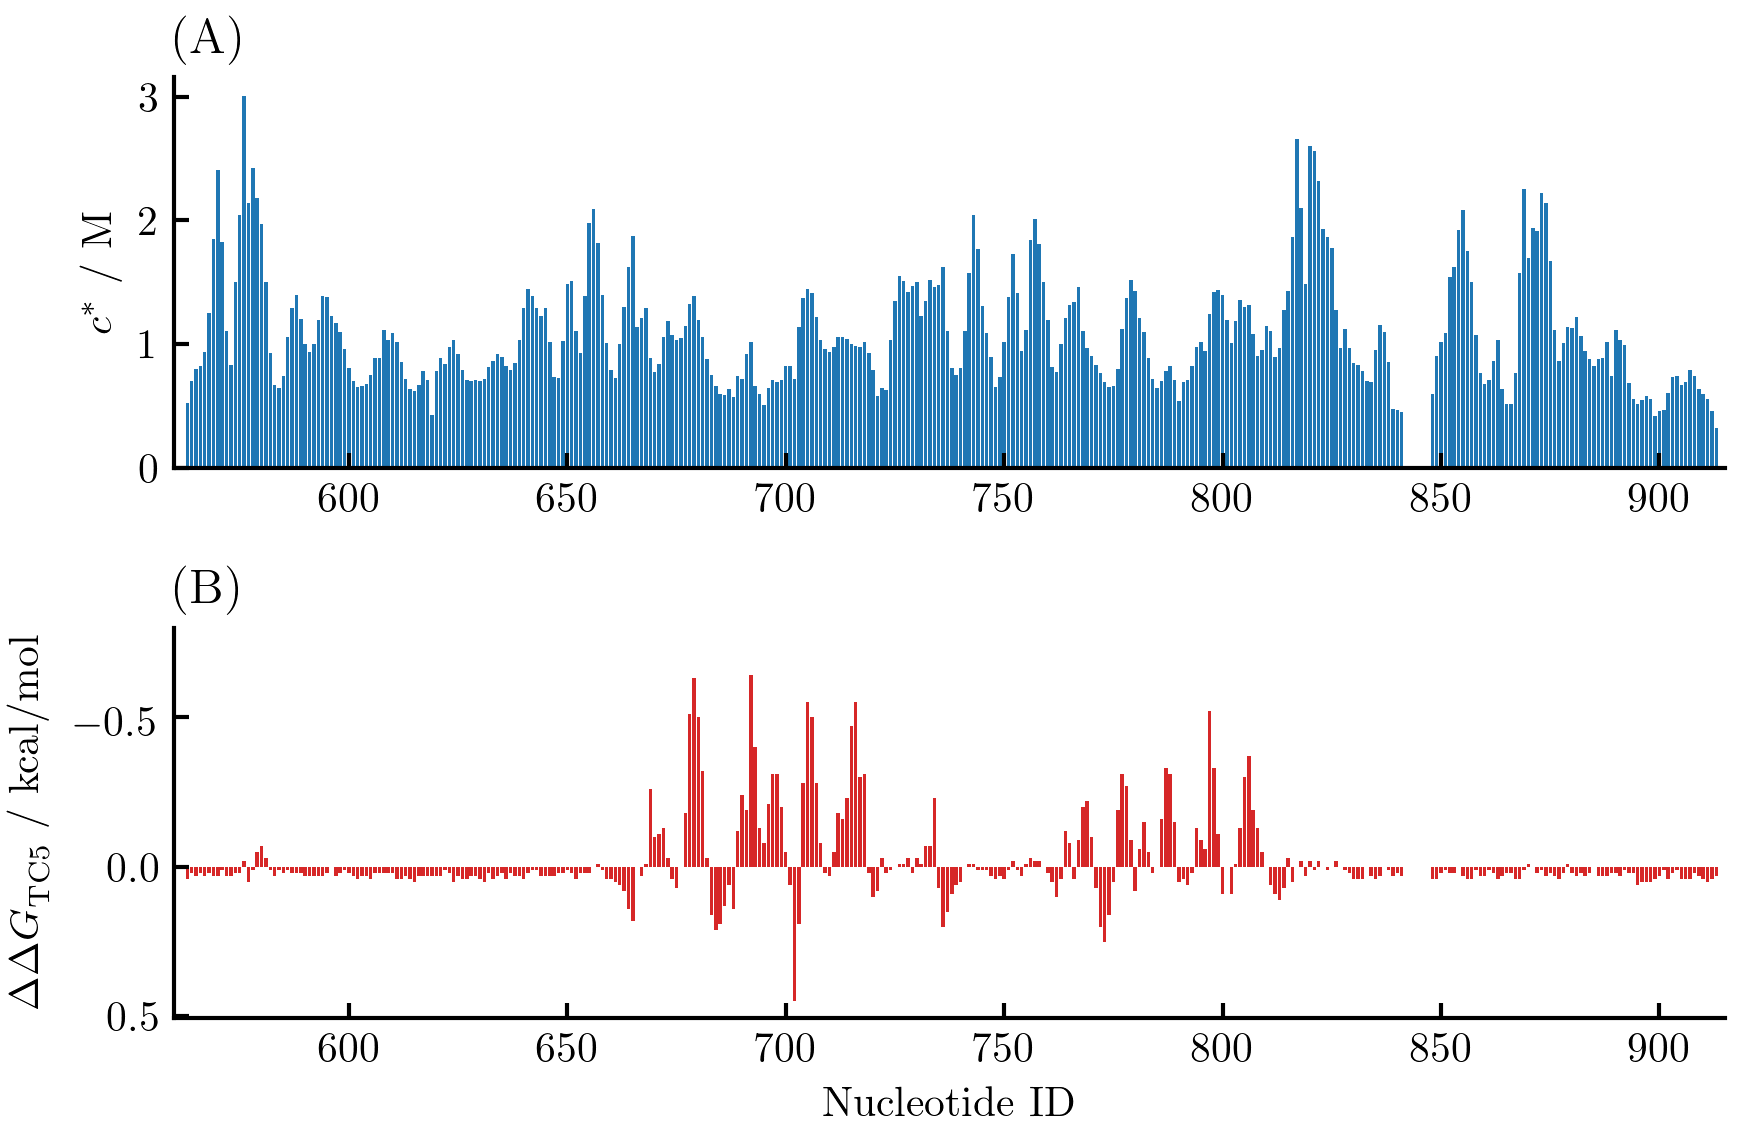

In [91]:
# 0.0050 TC5

Nrows=2
fig, axs = plt.subplots(nrows=Nrows, ncols=1,  figsize=(6,2*Nrows), dpi= 300, sharex=False)

#x = np.arange(2,346+1)
x = np.append( np.arange(563,841+1), np.arange(848,913+1) )

cM = 0.0050
ax = axs[0]
ax.bar(x, concMg_nt[cM], color='C0')
ax.set_xbound(560, 915)
ax.set_ybound(0,)
ax.set_ylabel(r'$c^{\ast}_{}$ / M')
ax.set_title('(A)', loc='left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = axs[1]
y = []
for l in open('./mg_correlation/TC/cor_cM0.0050_TC5.out'):
    lsp = l.split()
    y.append(float(lsp[5]))
ax.bar(x, y, color='C3')
ax.set_xbound(560, 915)
ax.set_ybound(-0.8,)
ax.set_ylabel(r'$\Delta\Delta G^{}_{\rm{TC5}}$ / kcal/mol')
ax.set_xlabel('Nucleotide ID')
ax.set_title('(B)', loc='left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.invert_yaxis()

fig.savefig('cor_cM0.0050_TC5.pdf', dpi=300)

In [8]:
# # 0.0025 TC1
# # 0.0040 TC3
# # 0.0050 TC5

# Nrows=4
# fig, axs = plt.subplots(nrows=Nrows, ncols=1,  figsize=(4,1.5*Nrows), dpi= 300, sharex=False)

# #x = np.arange(2,346+1)
# x = np.append( np.arange(563,841+1), np.arange(848,913+1) )

# ax = axs[0]
# ax.bar(x, concMg_nt[0.0050], color='C2', label=r'[Mg$^{2+}$] = 5.0 mM')
# ax.bar(x, concMg_nt[0.0040], color='C1', label=r'[Mg$^{2+}$] = 4.0 mM')
# ax.bar(x, concMg_nt[0.0025], color='C0', label=r'[Mg$^{2+}$] = 2.5 mM')
# # ax.plot(x, concMg_nt[0.0050], '-', color='C2')
# # ax.plot(x, concMg_nt[0.0040], '-', color='C1')
# # ax.plot(x, concMg_nt[0.0025], '-', color='C0')
# ax.set_xbound(560, 915)
# ax.set_ybound(0,)
# ax.set_ylabel(r'$c^{\ast}_{}$ / M')
# #ax.set_title('(A)', loc='left')
# ax.text(-0.12, 0.95, '(A)', transform=ax.transAxes, size=11, weight='bold')
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.legend(fontsize=6, loc='upper left', bbox_to_anchor=(0.1, 1.15))

# ax = axs[1]
# y = []
# for l in open('./mg_correlation/TC/cor_cM0.0025_TC1.out'):
#     lsp = l.split()
#     y.append(float(lsp[5]))
# ax.bar(x, y, color='C0')
# ax.set_xbound(560, 915)
# ax.set_ybound(-2.0,)
# ax.set_ylabel(r'$\Delta\Delta G^{}_{\rm{TC1}}$ / kcal/mol')
# ax.text(0.05, 0.95, r'(B) [Mg$^{2+}$] = 2.5 mM', transform=ax.transAxes, size=9, weight='bold')
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.invert_yaxis()


# ax = axs[2]
# y = []
# for l in open('./mg_correlation/TC/cor_cM0.0040_TC3.out'):
#     lsp = l.split()
#     y.append(float(lsp[5]))
# ax.bar(x, y, color='C1')
# ax.set_xbound(560, 915)
# ax.set_ybound(-1.2,)
# ax.set_ylabel(r'$\Delta\Delta G^{}_{\rm{TC3}}$ / kcal/mol')
# #ax.set_xlabel('Nucleotide ID')
# ax.text(0.05, 0.95, r'(C) [Mg$^{2+}$] = 4 mM', transform=ax.transAxes, size=9, weight='bold')
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.invert_yaxis()


# ax = axs[3]
# y = []
# for l in open('./mg_correlation/TC/cor_cM0.0050_TC5.out'):
#     lsp = l.split()
#     y.append(float(lsp[5]))
# ax.bar(x, y, color='C2')
# ax.set_xbound(560, 915)
# ax.set_ybound(-0.8,)
# ax.set_ylabel(r'$\Delta\Delta G^{}_{\rm{TC5}}$ / kcal/mol')
# ax.set_xlabel('Nucleotide ID')
# ax.text(0.05, 0.95, r'(D) [Mg$^{2+}$] = 5 mM', transform=ax.transAxes, size=9, weight='bold')
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.invert_yaxis()

# fig.savefig('cor_Mg_TC.pdf', dpi=300)

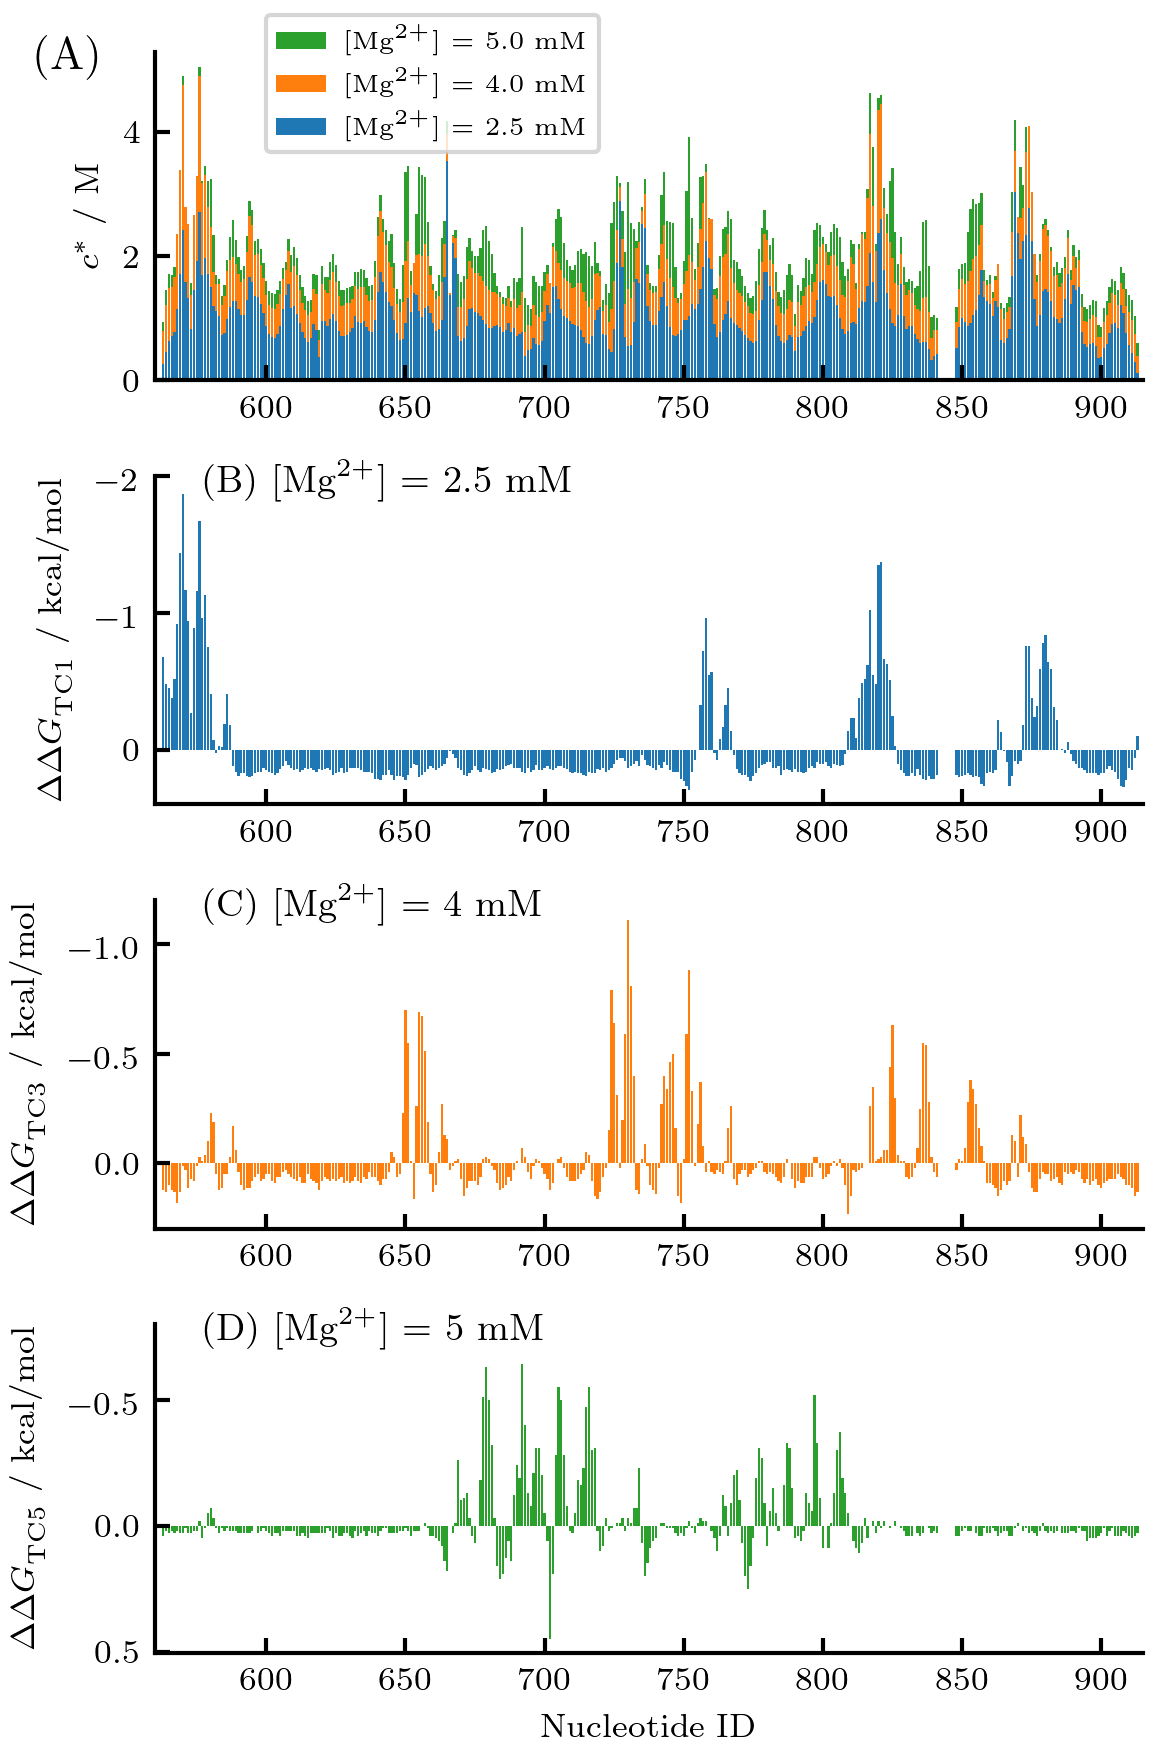

In [57]:
# 0.0025 TC1
# 0.0040 TC3
# 0.0050 TC5

Nrows=4
fig, axs = plt.subplots(nrows=Nrows, ncols=1,  figsize=(4,1.5*Nrows), dpi= 300, sharex=False)

#x = np.arange(2,346+1)
x = np.append( np.arange(563,841+1), np.arange(848,913+1) )

ax = axs[0]
ax.bar(x, concMg_ND_nt[0.0050], color='C2', label=r'[Mg$^{2+}$] = 5.0 mM')
ax.bar(x, concMg_ND_nt[0.0040], color='C1', label=r'[Mg$^{2+}$] = 4.0 mM')
ax.bar(x, concMg_ND_nt[0.0025], color='C0', label=r'[Mg$^{2+}$] = 2.5 mM')
# ax.plot(x, concMg_nt[0.0050], '-', color='C2')
# ax.plot(x, concMg_nt[0.0040], '-', color='C1')
# ax.plot(x, concMg_nt[0.0025], '-', color='C0')
ax.set_xbound(560, 915)
ax.set_ybound(0,)
ax.set_ylabel(r'$c^{\ast}_{}$ / M')
#ax.set_title('(A)', loc='left')
ax.text(-0.12, 0.95, '(A)', transform=ax.transAxes, size=11, weight='bold')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(fontsize=6, loc='upper left', bbox_to_anchor=(0.1, 1.15))

ax = axs[1]
y = []
for l in open('./mg_correlation/TC/cor_cM0.0025_TC1.out'):
    lsp = l.split()
    y.append(float(lsp[5]))
ax.bar(x, y, color='C0')
ax.set_xbound(560, 915)
ax.set_ybound(-2.0,)
ax.set_ylabel(r'$\Delta\Delta G^{}_{\rm{TC1}}$ / kcal/mol')
ax.text(0.05, 0.95, r'(B) [Mg$^{2+}$] = 2.5 mM', transform=ax.transAxes, size=9, weight='bold')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.invert_yaxis()


ax = axs[2]
y = []
for l in open('./mg_correlation/TC/cor_cM0.0040_TC3.out'):
    lsp = l.split()
    y.append(float(lsp[5]))
ax.bar(x, y, color='C1')
ax.set_xbound(560, 915)
ax.set_ybound(-1.2,)
ax.set_ylabel(r'$\Delta\Delta G^{}_{\rm{TC3}}$ / kcal/mol')
#ax.set_xlabel('Nucleotide ID')
ax.text(0.05, 0.95, r'(C) [Mg$^{2+}$] = 4 mM', transform=ax.transAxes, size=9, weight='bold')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.invert_yaxis()


ax = axs[3]
y = []
for l in open('./mg_correlation/TC/cor_cM0.0050_TC5.out'):
    lsp = l.split()
    y.append(float(lsp[5]))
ax.bar(x, y, color='C2')
ax.set_xbound(560, 915)
ax.set_ybound(-0.8,)
ax.set_ylabel(r'$\Delta\Delta G^{}_{\rm{TC5}}$ / kcal/mol')
ax.set_xlabel('Nucleotide ID')
ax.text(0.05, 0.95, r'(D) [Mg$^{2+}$] = 5 mM', transform=ax.transAxes, size=9, weight='bold')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.invert_yaxis()


fig.savefig('cor_Mg_TC_ND.pdf', dpi=300)

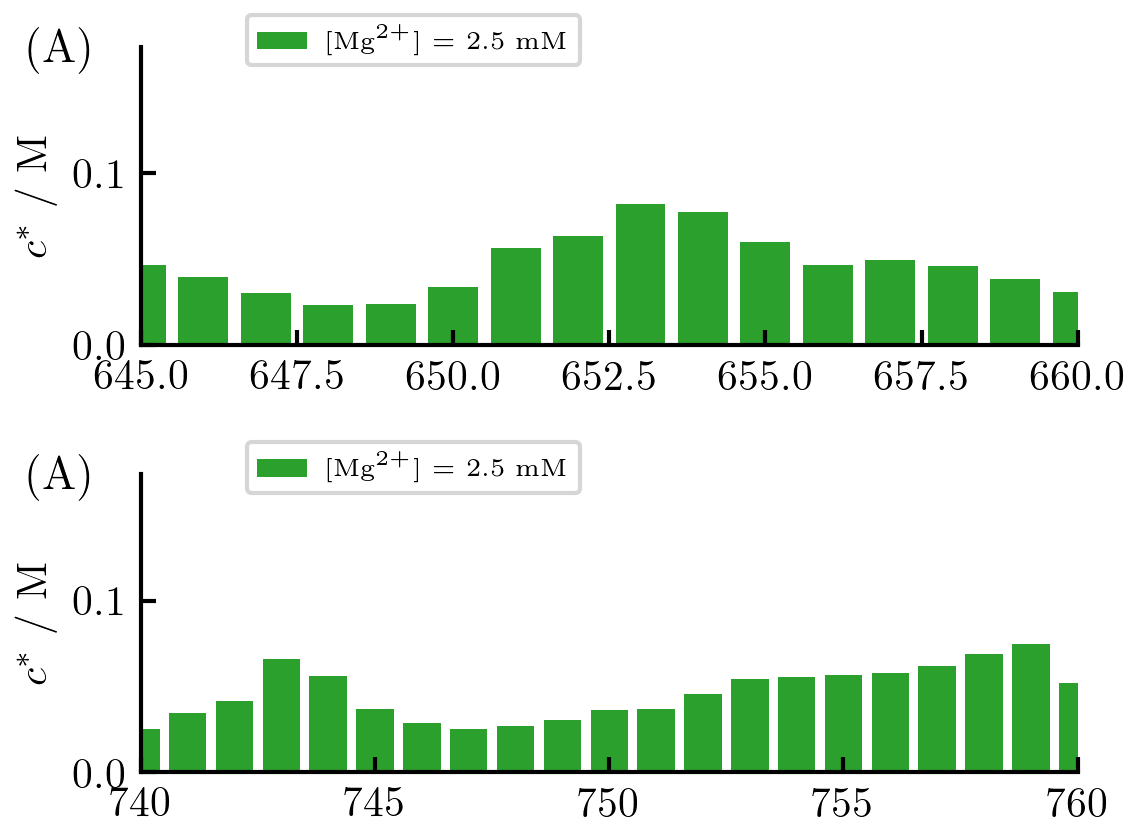

In [204]:
fig, axs = plt.subplots(nrows=2, ncols=1,  figsize=(4,1.5*2), dpi= 300, sharex=False)

#x = np.arange(2,346+1)
x = np.append( np.arange(563,841+1), np.arange(848,913+1) )
 
ax = axs[0]
ax.bar(x, concMg_nt[0.0002], color='C2', label=r'[Mg$^{2+}$] = 2.5 mM')
# ax.bar(x, concMg_nt[0.0025], color='C2', label=r'[Mg$^{2+}$] = 2.5 mM')
# ax.bar(x, concMg_nt[0.0010], color='C1', label=r'[Mg$^{2+}$] = 1.0 mM')
# ax.bar(x, concMg_nt[0.0004], color='C0', label=r'[Mg$^{2+}$] = 0.4 mM')
# ax.plot(x, concMg_nt[0.0050], '-', color='C2')
# ax.plot(x, concMg_nt[0.0040], '-', color='C1')
# ax.plot(x, concMg_nt[0.0025], '-', color='C0')
ax.set_xbound(645, 660)
ax.set_ybound(0,)
ax.set_ylabel(r'$c^{\ast}_{}$ / M')
#ax.set_title('(A)', loc='left')
ax.text(-0.12, 0.95, '(A)', transform=ax.transAxes, size=11, weight='bold')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(fontsize=6, loc='upper left', bbox_to_anchor=(0.1, 1.15))

ax = axs[1]
ax.bar(x, concMg_nt[0.0002], color='C2', label=r'[Mg$^{2+}$] = 2.5 mM')
# ax.bar(x, concMg_nt[0.0025], color='C2', label=r'[Mg$^{2+}$] = 2.5 mM')
# ax.bar(x, concMg_nt[0.0010], color='C1', label=r'[Mg$^{2+}$] = 1.0 mM')
# ax.bar(x, concMg_nt[0.0004], color='C0', label=r'[Mg$^{2+}$] = 0.4 mM')
# ax.plot(x, concMg_nt[0.0050], '-', color='C2')
# ax.plot(x, concMg_nt[0.0040], '-', color='C1')
# ax.plot(x, concMg_nt[0.0025], '-', color='C0')
ax.set_xbound(740, 760)
ax.set_ybound(0,)
ax.set_ylabel(r'$c^{\ast}_{}$ / M')
#ax.set_title('(A)', loc='left')
ax.text(-0.12, 0.95, '(A)', transform=ax.transAxes, size=11, weight='bold')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(fontsize=6, loc='upper left', bbox_to_anchor=(0.1, 1.15))

# ax = axs[2]
# y = []
# for l in open('./mg_correlation/TC/cor_cM0.0050_TC5.out'):
#     lsp = l.split()
#     y.append(float(lsp[5]))
# ax.bar(x, y, color='C2')
# ax.set_xbound(600, 760)
# ax.set_ybound(-0.8,)
# ax.set_ylabel(r'$\Delta\Delta G^{}_{\rm{TC5}}$ / kcal/mol')
# ax.set_xlabel('Nucleotide ID')
# ax.text(0.05, 0.95, r'(D) [Mg$^{2+}$] = 5 mM', transform=ax.transAxes, size=9, weight='bold')
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.invert_yaxis()


#fig.savefig('cor_Mg_TC.pdf', dpi=300)

# Three-way-junction

## Distance (to compare FRET)

Kim et al 2002 PNAS

G577
sugar: imp = 46

C735
sugar: imp = 520

In [4]:
f_out = open('do_dcd_traj_distance_42_520.sh','w')
for cM in cMs:
    f_out.write("dcd_traj_distance.py dcd/cM%6.4f.dcd 46 520 three-way-junction/cM%6.4f.46_520_dist\n" % (cM,cM))
f_out.close()

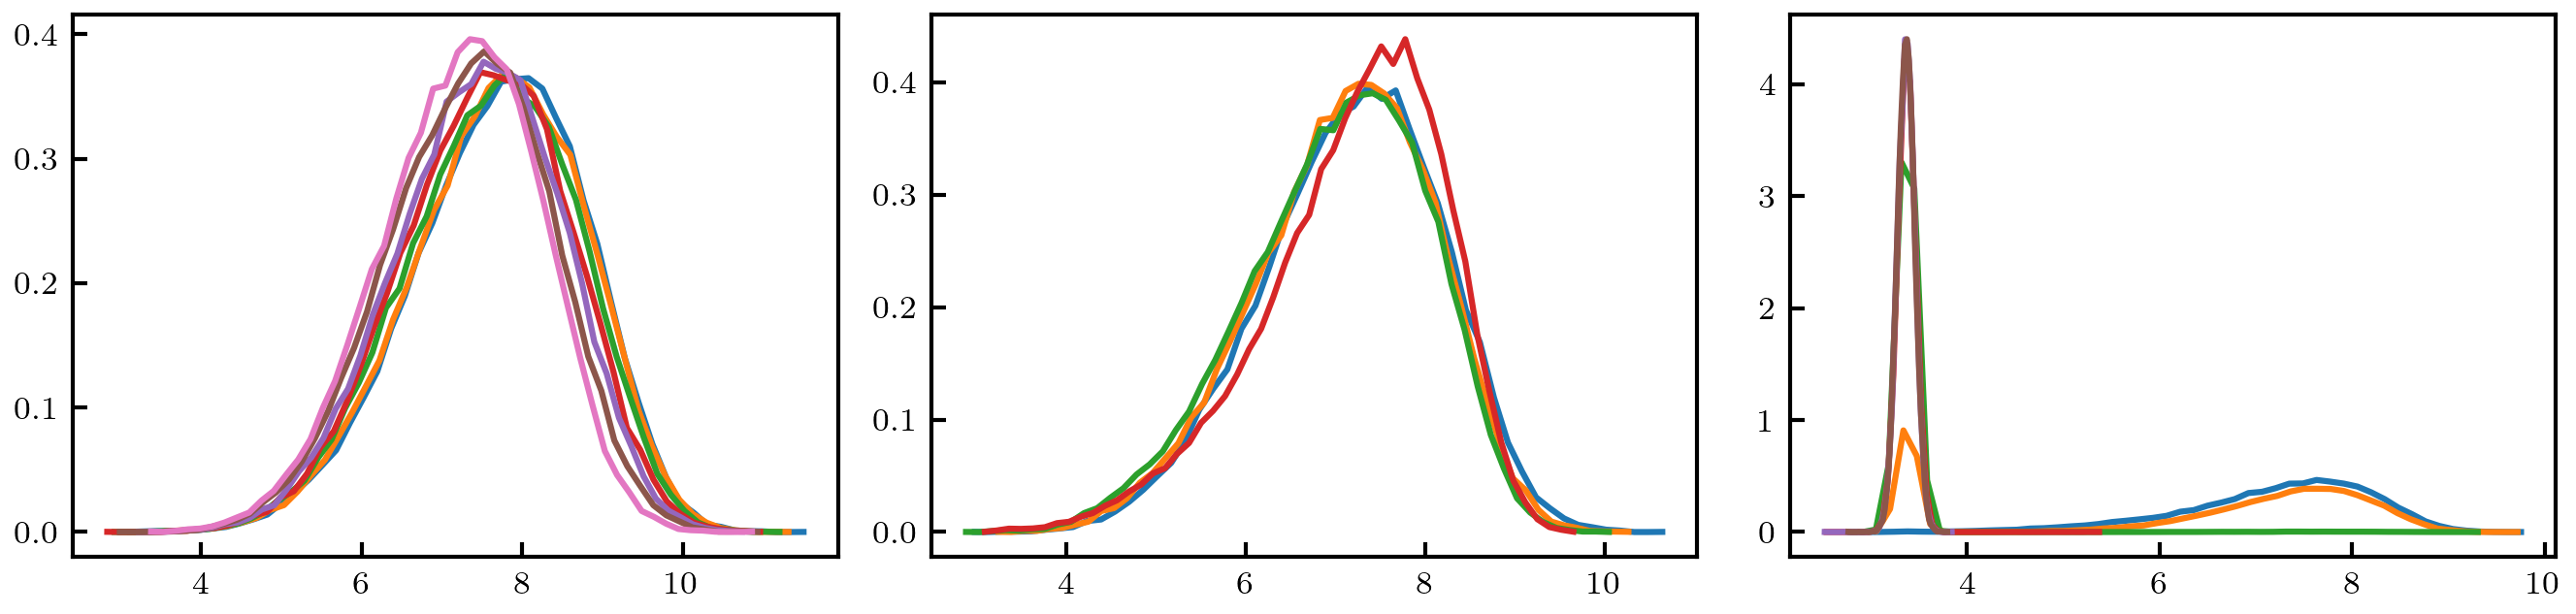

In [25]:
import matplotlib

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(3*3, 2.25), dpi=300)

#for cM in cMs:
for cM in (0.0, 0.0001, 0.0002, 0.0004, 0.0006, 0.0008, 0.001,):
    dist = []
    for l in open('./three-way-junction/cM%6.4f.46_520_dist' % (cM,)):
        lsp = l.split()
        dist.append( float(lsp[0]) * 0.1)  # nm
    
    hist, bins = np.histogram(dist, bins=50, density=True)
    axs[0].plot([0.5*(bins[i]+bins[i+1]) for i in range(len(hist))], hist)
    #axs.set_xbound(45,180)
    
for cM in (0.0012, 0.0015, 0.002, 0.0025,):
    dist = []
    for l in open('./three-way-junction/cM%6.4f.46_520_dist' % (cM,)):
        lsp = l.split()
        dist.append( float(lsp[0]) * 0.1 )  # nm
    
    hist, bins = np.histogram(dist, bins=50, density=True)
    axs[1].plot([0.5*(bins[i]+bins[i+1]) for i in range(len(hist))], hist)
    #axs.set_xbound(45,180)
        
for cM in ( 0.003, 0.004, 0.005, 0.01, 0.02, 0.03):
    dist = []
    for l in open('./three-way-junction/cM%6.4f.46_520_dist' % (cM,)):
        lsp = l.split()
        dist.append( float(lsp[0]) * 0.1 )  # nm
    
    hist, bins = np.histogram(dist, bins=50, density=True)
    axs[2].plot([0.5*(bins[i]+bins[i+1]) for i in range(len(hist))], hist)
    #axs.set_xbound(45,180)

0.001000: 7.218802 7.346900
0.002000: 7.010549 7.413740
0.003000: 7.230774 7.629510
0.004000: 6.339236 3.338380
0.005000: 3.403859 3.318500
0.020000: 3.367483 3.355350


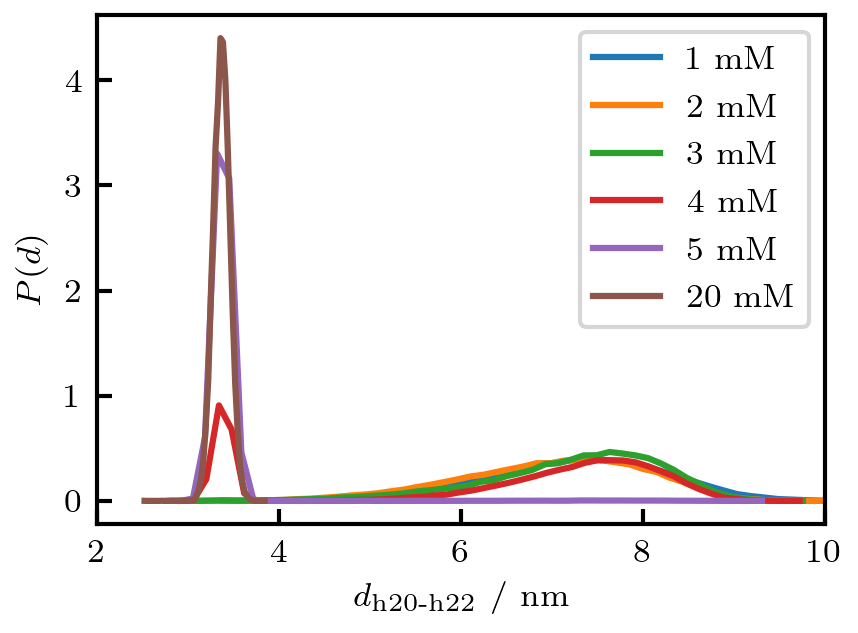

In [47]:
import matplotlib

fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(3, 2.25), dpi=300)

for cM in (0.001,0.002, 0.003,0.004,0.005,0.02):
    dist = []
    for l in open('./three-way-junction/cM%6.4f.46_520_dist' % (cM,)):
        lsp = l.split()
        dist.append( float(lsp[0]) * 0.1)  # nm
    
    hist, bins = np.histogram(dist, bins=50, density=True)
    
    #mode
    m = hist[0]
    im = 0
    for ih, h in enumerate(hist):
        if h > m:
            im = ih
            m = h
    print("%f: %f %f" % (cM, np.mean(dist), 0.5*(bins[im]+bins[im+1])))
    
    axs.plot([0.5*(bins[i]+bins[i+1]) for i in range(len(hist))], hist, label='%2i mM'%(cM*1000,))
    #axs.set_xbound(45,180)

axs.set_xbound(2,10)
axs.set_xlabel(r'$d_{\textrm{h20-h22}}$ / nm')
axs.set_ylabel(r'$P(d)$')
axs.legend()
fig.savefig('dist_h20-h22_distribution.pdf')

## Angle

In [17]:
##### This script was originally written as dcd_traj_16SCD_ThreeWayJunction_angle.py
#####!/usr/bin/env python
'''
Created on 2018/12/13
@author: Naoto Hori
'''

import math
import numpy as np
from cafysis.file_io.dcd import DcdFile


def calc_angle_degree(v1, v2):
    return math.acos( np.dot(v1,v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)) ) * 180.0 / math.pi
    
    
def compute_vH(Nskip, data, residues_ini, residues_end):

    i_direction = 1

    Hs = []
    for res_ini, res_end in zip(residues_ini, residues_end):

        Vs = []
        for res_j in range(res_ini+Nskip, res_end-Nskip+1):

            # Change to serial residue ID
            i = res_j - Nskip - 561
            j = res_j - 561
            k = res_j + Nskip - 561

            # Change to imp for Sugar
            imp = 3 * (i - 1) + 1
            jmp = 3 * (j - 1) + 1
            kmp = 3 * (k - 1) + 1

            xyz_i = data[imp-1]
            xyz_j = data[jmp-1]
            xyz_k = data[kmp-1]

            A = xyz_i - xyz_j
            B = xyz_k - xyz_j

            V1 = A + B
            V1 = V1 / np.linalg.norm(V1)

            Vs.append(V1)

        nV = len(Vs)
        #print ('len=%i' % (nV,))

        for i in range(0, nV-1):
            H = np.cross(Vs[i], Vs[i+1]) * i_direction
            Hs.append(H)

        i_direction *= -1

    vH  = np.array([0.0,0.0,0.0])
    for H in Hs:
        vH += H
    vH /= float(len(Hs))

    return vH


def dcd_traj_16SCD_ThreeWayJunction_angle(input_dcd, output):
    
    #if len(sys.argv) != 3:
    #    print ' Usage: % SCRIPT [input DCD] [output] '
    #    sys.exit(2)

    dcd = DcdFile(input_dcd)

    NMP_SOLUTE = 1037
    Nskip = 3

    resid_ini = []
    resid_end = []

    ########################################################
    ### IMPORTANT:
    ### Specify ids so that the vector origin is the junction.
    ########################################################

    ### H20 
    ### 577 - 586,  755 - 764
    H20_ini = [755, 577]
    H20_end = [764, 586]

    ### H21
    ### 588 - 606, 632 - 651 (longer)
    #H21_ini = [588, 632]
    #H21_end = [606, 651]

    ### 588 - 597, 643 - 651 (shorter)
    H21_ini = [588, 643]
    H21_end = [597, 651]

    ### H22
    ### 734 - 751, 655 - 672
    H22_ini = [655, 734]
    H22_end = [672, 751]

    dcd.open_to_read()
    dcd.read_header()

    f_out = open(output,'w')

    #nframe = 0
    while dcd.has_more_data() :

        data = dcd.read_onestep_np_solute(NMP_SOLUTE)

        #nframe += 1
        #d = math.sqrt( (data[id1][0] - data[id2][0]) ** 2
        #              +(data[id1][1] - data[id2][1]) ** 2
        #              +(data[id1][2] - data[id2][2]) ** 2 )

        vH20 = compute_vH(Nskip, data, H20_ini, H20_end)
        vH21 = compute_vH(Nskip, data, H21_ini, H21_end)
        vH22 = compute_vH(Nskip, data, H22_ini, H22_end)

        angle_20_21 = calc_angle_degree(vH20, vH21)
        angle_20_22 = calc_angle_degree(vH20, vH22)
        angle_21_22 = calc_angle_degree(vH21, vH22)

        f_out.write('%.2f %.2f %.2f\n' % (angle_20_21, angle_21_22, angle_20_22))

    dcd.close()
    f_out.close()

In [ ]:
''' Excecute the function '''

for cM in cMs:
    dcd_traj_16SCD_ThreeWayJunction_angle('./dcd/cM%6.4f.dcd' % (cM,), './three-way-junction/cM%6.4f.TWJ_angle' % (cM,))

In [3]:
AveH2021 = []
AveH2122 = []
AveH2022 = []
StdH2021 = []
StdH2122 = []
StdH2022 = []

for cM in cMs:
    
    n = 0
    aH2021 = []
    aH2122 = []
    aH2022 = []
    for l in open('./three-way-junction/cM%6.4f.TWJ_angle' % (cM,)):
        lsp = l.split()
        aH2021.append( float(lsp[0]) )
        aH2122.append( float(lsp[1]) )
        aH2022.append( float(lsp[2]) )
        n += 1
    
    AveH2021.append( np.mean(aH2021) )
    AveH2122.append( np.mean(aH2122) )
    AveH2022.append( np.mean(aH2022) )
    StdH2021.append( np.std(aH2021) )
    StdH2122.append( np.std(aH2122) )
    StdH2022.append( np.std(aH2022) )

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


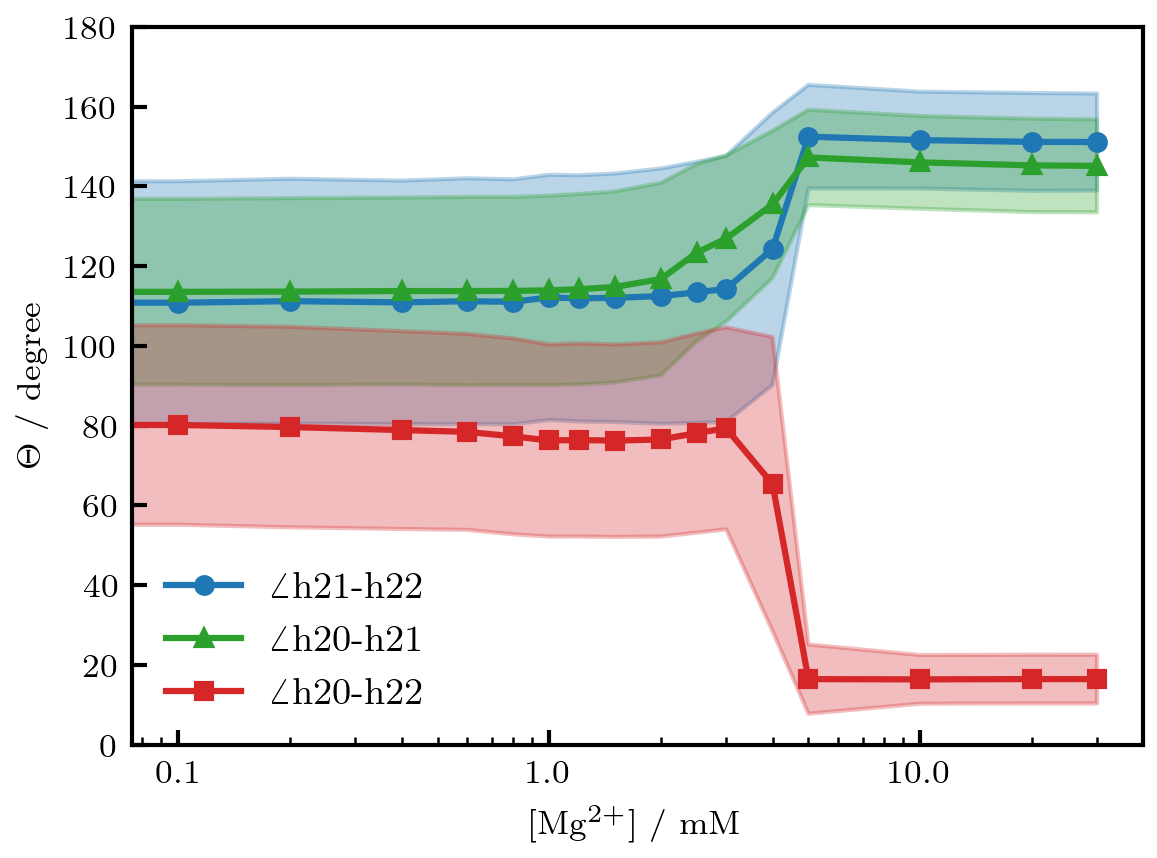

In [8]:
import matplotlib

fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(4, 3), dpi=300)
ax = axs

ax.fill_between([cM * 1000 for cM in cMs], 
                [m - s for m,s in zip(AveH2122,StdH2122)], 
                [m + s for m,s in zip(AveH2122,StdH2122)],
               color='C0', alpha=0.3 )

ax.fill_between([cM * 1000 for cM in cMs], 
                [m - s for m,s in zip(AveH2021,StdH2021)], 
                [m + s for m,s in zip(AveH2021,StdH2021)],
               color='C2', alpha=0.3 )

ax.fill_between([cM * 1000 for cM in cMs], 
                [m - s for m,s in zip(AveH2022,StdH2022)], 
                [m + s for m,s in zip(AveH2022,StdH2022)],
               color='C3', alpha=0.3 )

ax.plot([cM * 1000 for cM in cMs], AveH2122, 'o-', c='C0', markersize=4, label=r'$\angle$h21-h22')
ax.plot([cM * 1000 for cM in cMs], AveH2021, '^-', c='C2', markersize=4, label=r'$\angle$h20-h21')
ax.plot([cM * 1000 for cM in cMs], AveH2022, 's-', c='C3', markersize=4, label=r'$\angle$h20-h22')

#ax.plot([cM * 1000 for cM in cMs], 
#        [a+b+c for a,b,c in zip(AveH2021, AveH2022, AveH2122)], '-', c='k', markersize=4, label=r'$\angle$ Total')

ax.set_ybound(0,180.0)

ax.set_xscale('log')
ax.set_xticks([0.1, 1, 10])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax.set_ylabel(r'$\Theta$ / degree')
ax.set_xlabel(r'[Mg$^{2+}$] / mM')
ax.legend(loc='lower left', fontsize=9, frameon=False)


fig.savefig('ThreeWayJunction_angle.svg', dpi=300)


fig.savefig('ThreeWayJunction_angle.pdf', dpi=300)

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


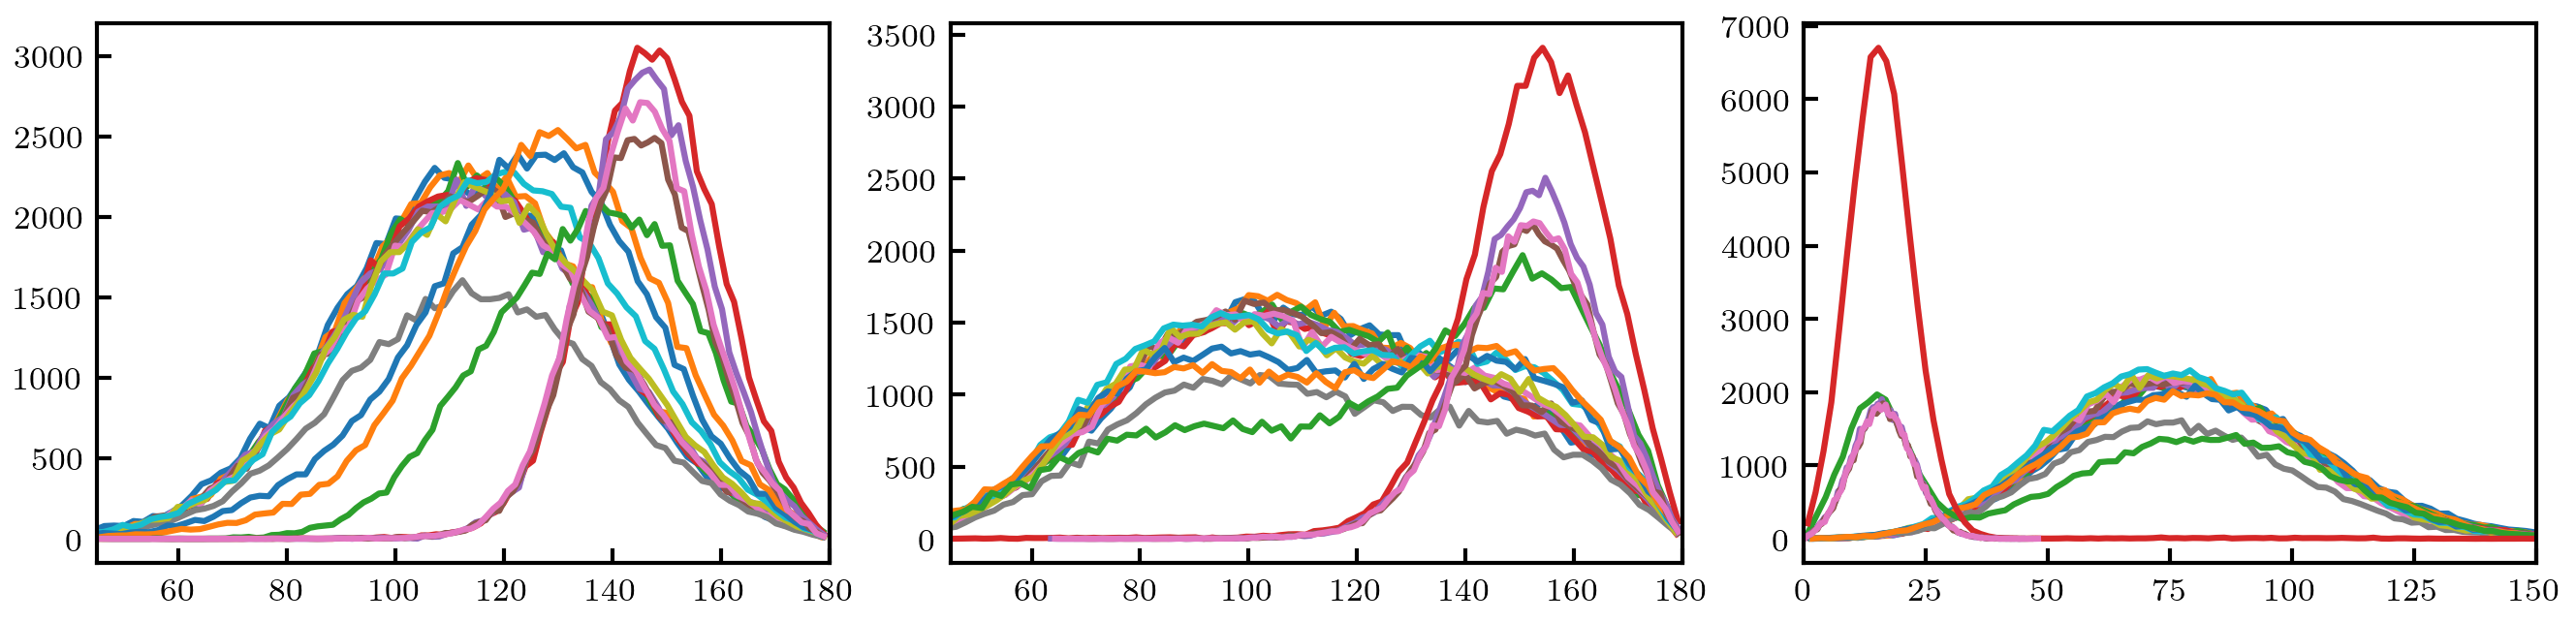

In [8]:
import matplotlib

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(3*3, 2.25), dpi=300)

for cM in cMs:
    
    aH2021 = []
    aH2122 = []
    aH2022 = []
    for l in open('./three-way-junction/cM%6.4f.TWJ_angle' % (cM,)):
        lsp = l.split()
        aH2021.append( float(lsp[0]) )
        aH2122.append( float(lsp[1]) )
        aH2022.append( float(lsp[2]) )
        n += 1
    
    hist, bins = np.histogram(aH2021, bins=100)
    axs[0].plot([0.5*(bins[i]+bins[i+1]) for i in range(len(hist))], hist)
    axs[0].set_xbound(45,180)
    
    hist, bins = np.histogram(aH2122, bins=100)
    axs[1].plot([0.5*(bins[i]+bins[i+1]) for i in range(len(hist))], hist)
    axs[1].set_xbound(45,180)
    
    hist, bins = np.histogram(aH2022, bins=100)
    axs[2].plot([0.5*(bins[i]+bins[i+1]) for i in range(len(hist))], hist)
    axs[2].set_xbound(0,150)
    

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/anacond

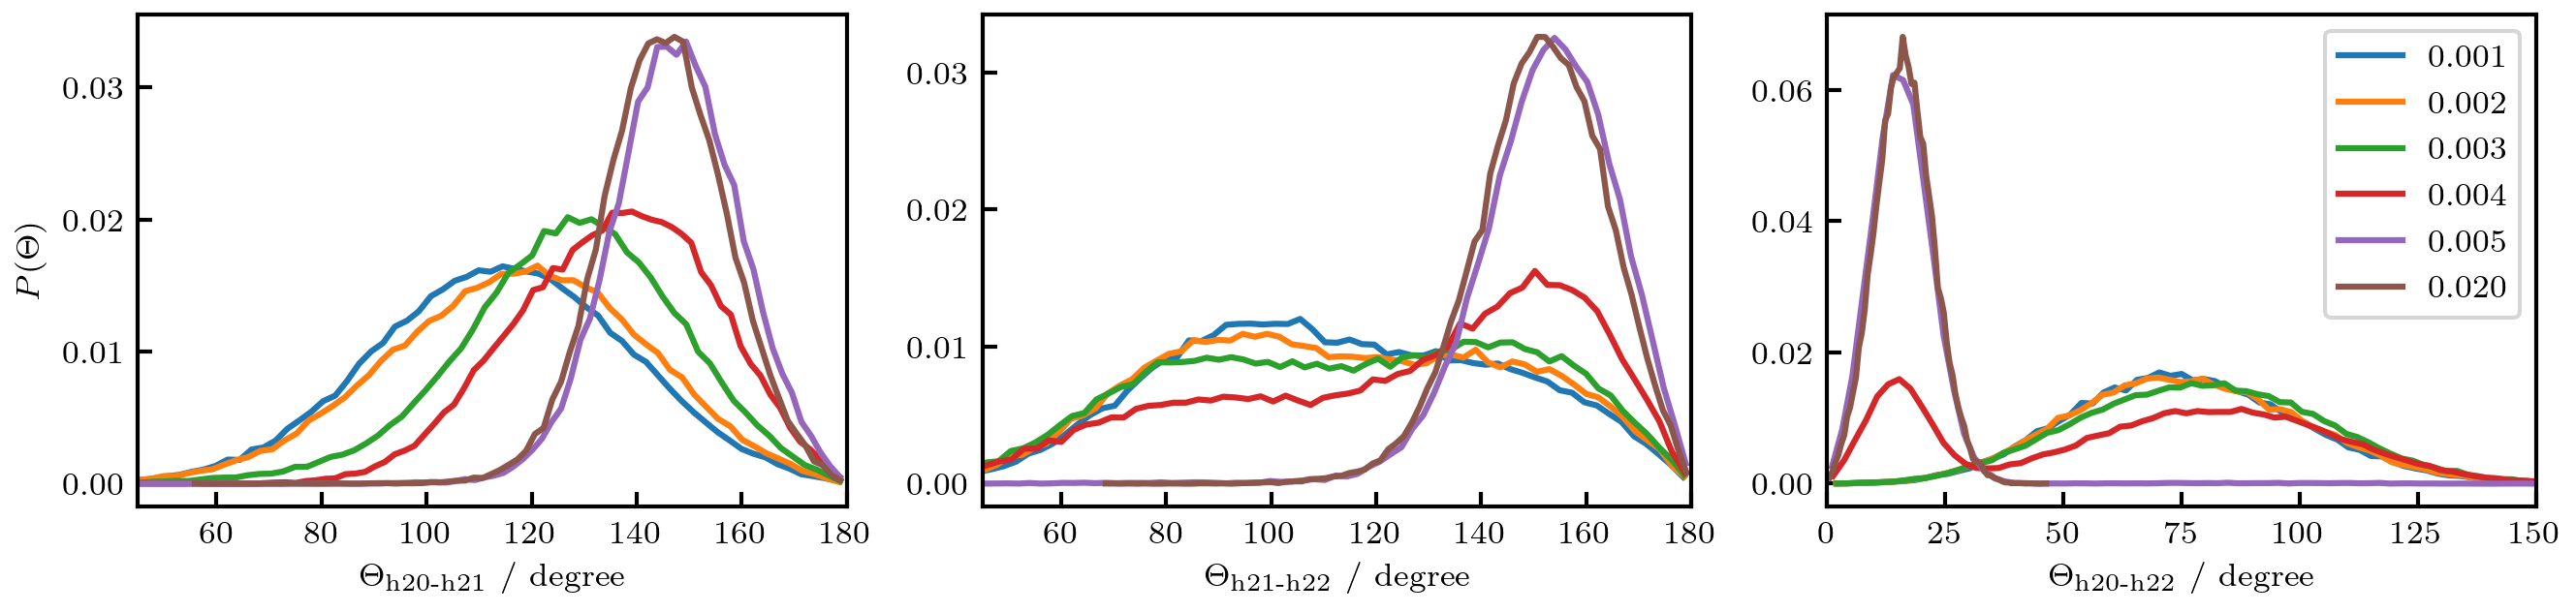

In [26]:
import matplotlib

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(3*3, 2.25), dpi=300)

for cM in (0.001,0.002, 0.003,0.004,0.005,0.02):
    
    aH2021 = []
    aH2122 = []
    aH2022 = []
    for l in open('./three-way-junction/cM%6.4f.TWJ_angle' % (cM,)):
        lsp = l.split()
        aH2021.append( float(lsp[0]) )
        aH2122.append( float(lsp[1]) )
        aH2022.append( float(lsp[2]) )
        n += 1
    
    hist, bins = np.histogram(aH2021, bins=75, density=True)
    axs[0].plot([0.5*(bins[i]+bins[i+1]) for i in range(len(hist))], hist)
    axs[0].set_xbound(45,180)
    axs[0].set_xlabel(r"$\Theta_{\textrm{h20-h21}}$ / degree")
    axs[0].set_ylabel(r"$P(\Theta)$")
    
    hist, bins = np.histogram(aH2122, bins=75, density=True)
    axs[1].plot([0.5*(bins[i]+bins[i+1]) for i in range(len(hist))], hist)
    axs[1].set_xbound(45,180)
    axs[1].set_xlabel(r"$\Theta_{\textrm{h21-h22}}$ / degree")
    #axs[1].set_ylabel(r"$P(\Theta)$")
    
    hist, bins = np.histogram(aH2022, bins=75, density=True)
    axs[2].plot([0.5*(bins[i]+bins[i+1]) for i in range(len(hist))], hist, label='%5.3f'%cM)
    axs[2].set_xbound(0,150)
    axs[2].set_xlabel(r"$\Theta_{\textrm{h20-h22}}$ / degree")
    #axs[2].set_ylabel(r"$P(\Theta)$")
    
    axs[2].legend()
    
    fig.savefig('angle_distribution.svg')

## 2D angle vs distance

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


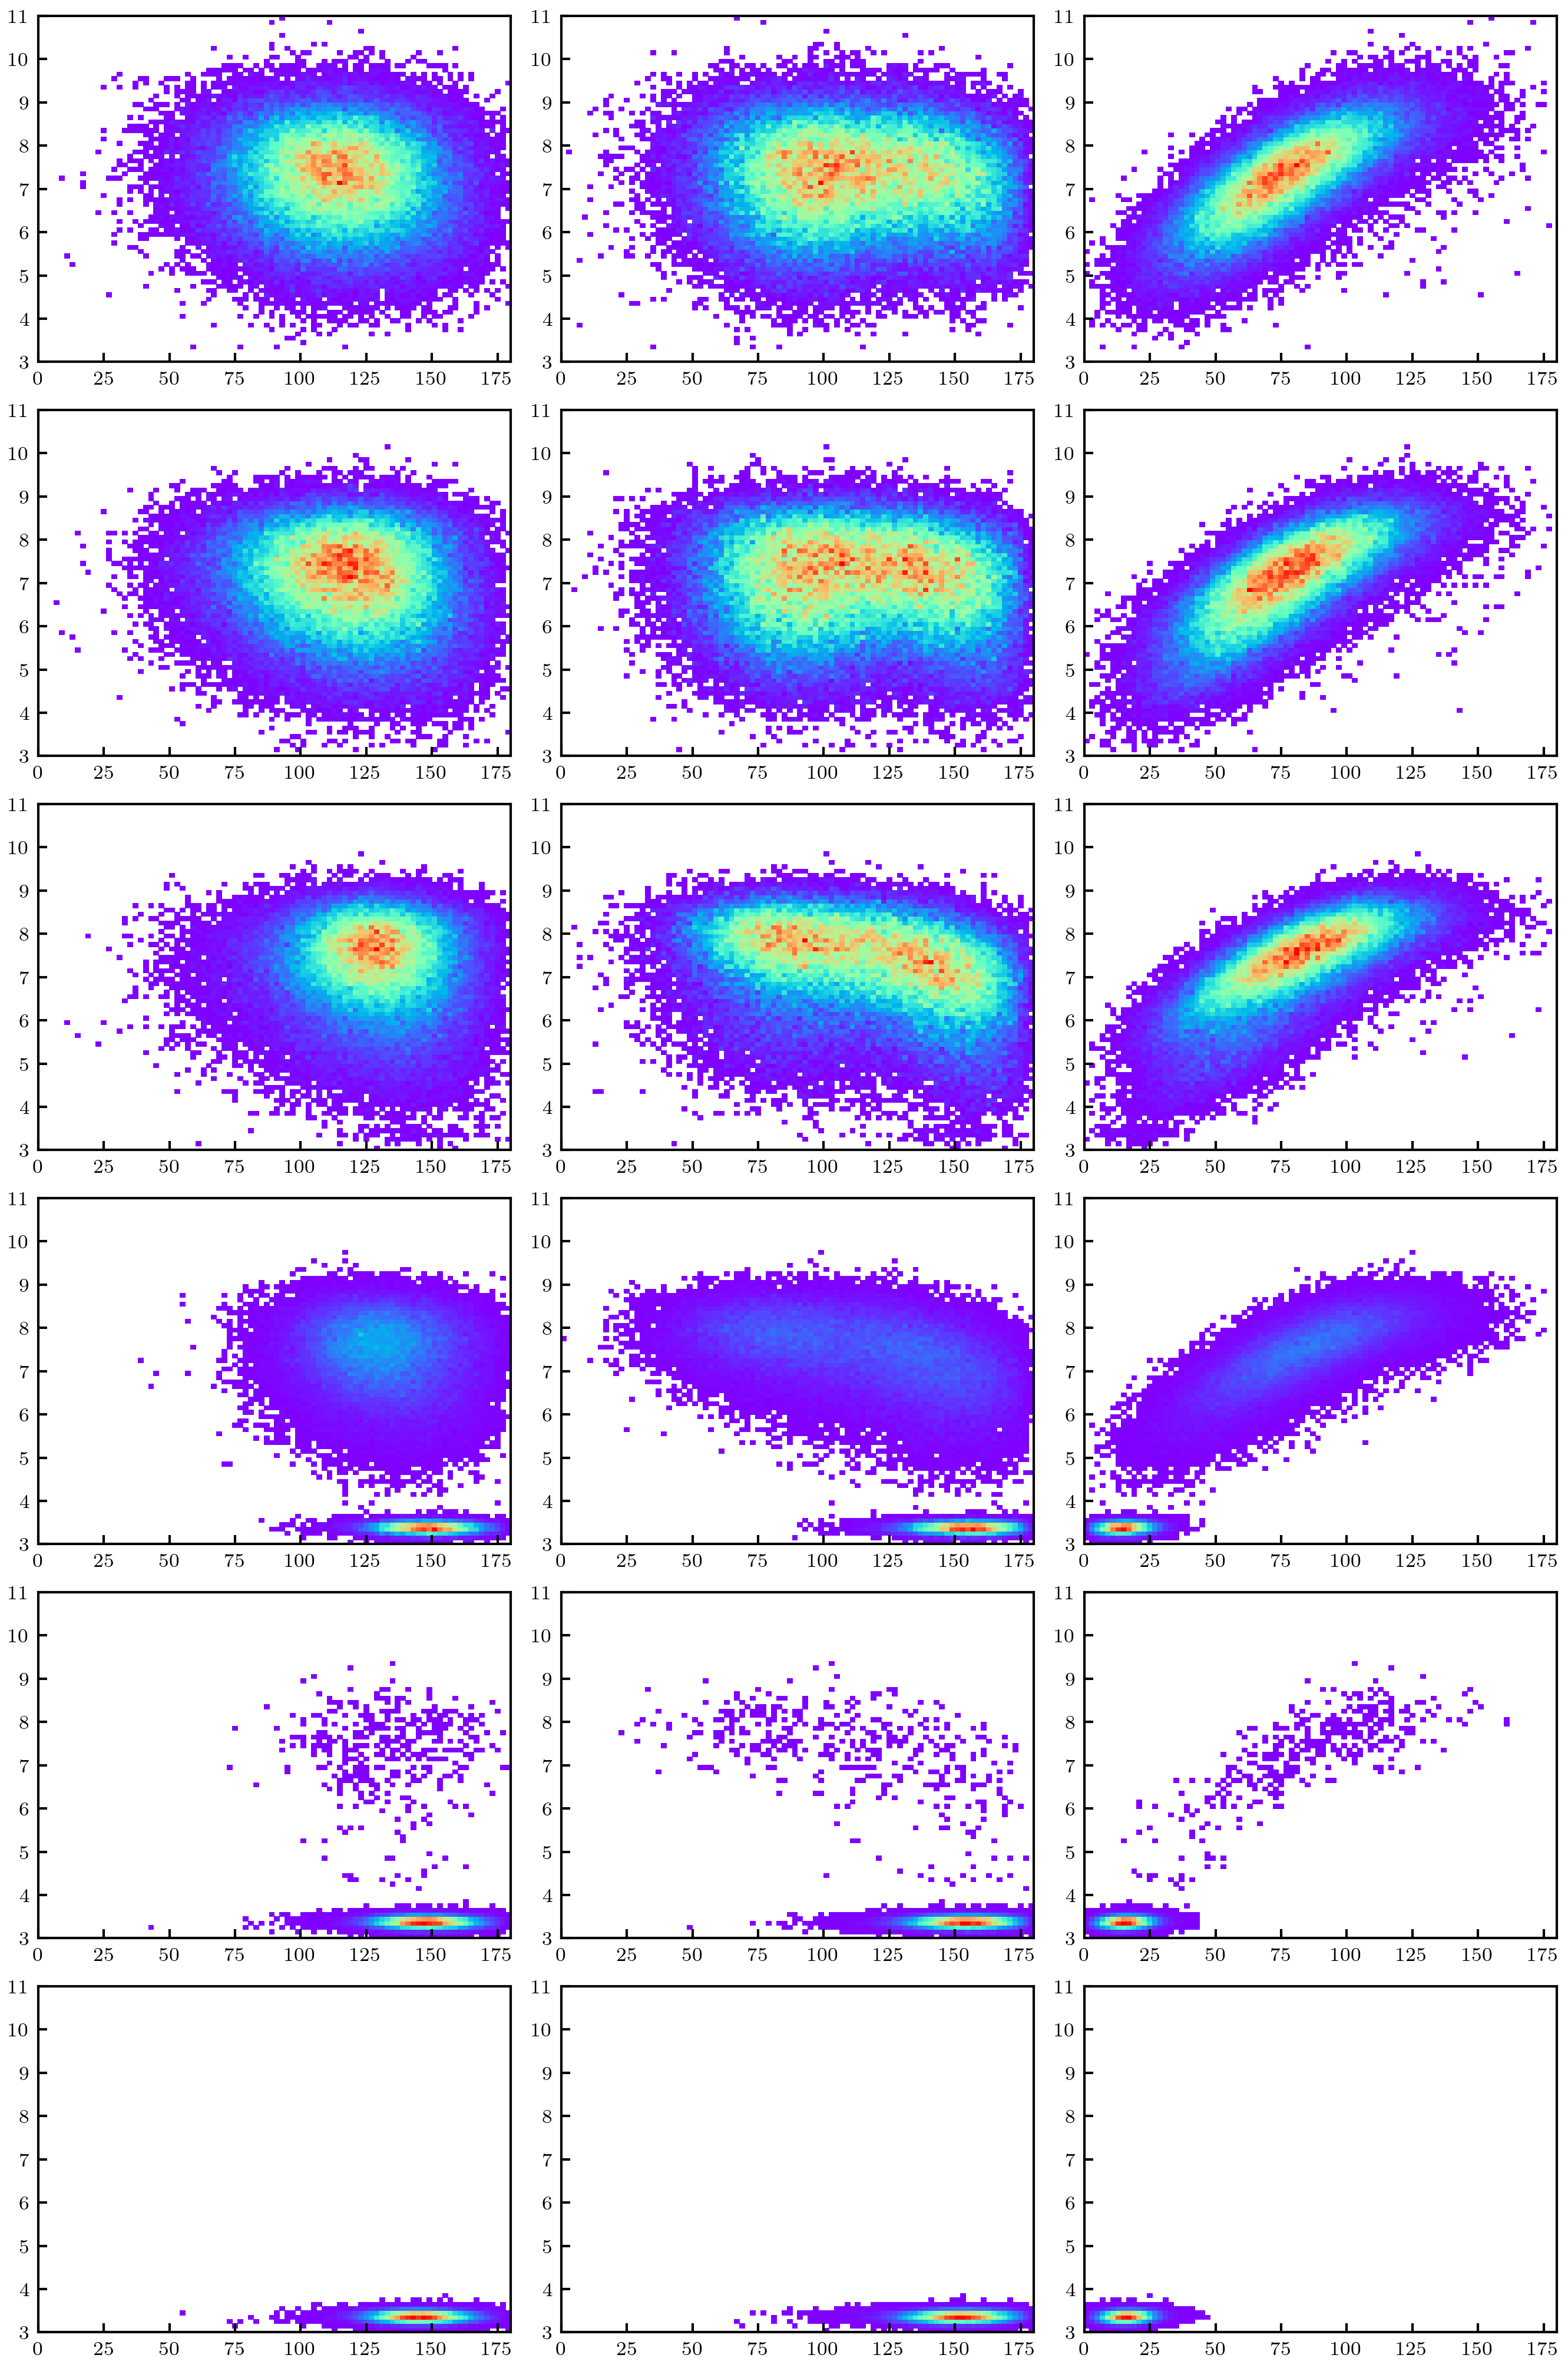

In [13]:

fig, axs = plt.subplots(ncols=3, nrows=6, figsize=(3*3, 2.25*6), dpi=600)

for icM, cM in enumerate((0.001, 0.002, 0.003, 0.004, 0.005, 0.020)):
    dist = []
    for l in open('./three-way-junction/cM%6.4f.46_520_dist' % (cM,)):
        lsp = l.split()
        dist.append( float(lsp[0]) * 0.1)  # nm
    
    aH2021 = []
    aH2122 = []
    aH2022 = []
    for l in open('./three-way-junction/cM%6.4f.TWJ_angle' % (cM,)):
        lsp = l.split()
        aH2021.append( float(lsp[0]) )
        aH2122.append( float(lsp[1]) )
        aH2022.append( float(lsp[2]) )
    
    ############################### 
    H, xedges, yedges = np.histogram2d(aH2021, dist, bins=(90,80),
                                       range=[[0,180.0],[3,11]], density=True)
    
    # H needs to be rotated and flipped
    H = np.rot90(H)
    H = np.flipud(H)
 
    # Mask zeros
    Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value 
    
    axs[icM,0].pcolormesh(xedges,yedges,Hmasked, cmap='rainbow')
 
    ############################### 
    H, xedges, yedges = np.histogram2d(aH2122, dist, bins=(90,80),
                                       range=[[0,180.0],[3,11]], density=True)
    
    # H needs to be rotated and flipped
    H = np.rot90(H)
    H = np.flipud(H)
 
    # Mask zeros
    Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value 
    
    axs[icM,1].pcolormesh(xedges,yedges,Hmasked, cmap='rainbow')

    ############################### 
    H, xedges, yedges = np.histogram2d(aH2022, dist, bins=(90,80),
                                       range=[[0,180.0],[3,11]], density=True)
    
    # H needs to be rotated and flipped
    H = np.rot90(H)
    H = np.flipud(H)
 
    # Mask zeros
    Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value 
    
    axs[icM,2].pcolormesh(xedges,yedges,Hmasked, cmap='rainbow')
    
fig.savefig('TWJ_angle_dist_2D_grid.png')
fig.savefig('TWJ_angle_dist_2D_grid.svg')

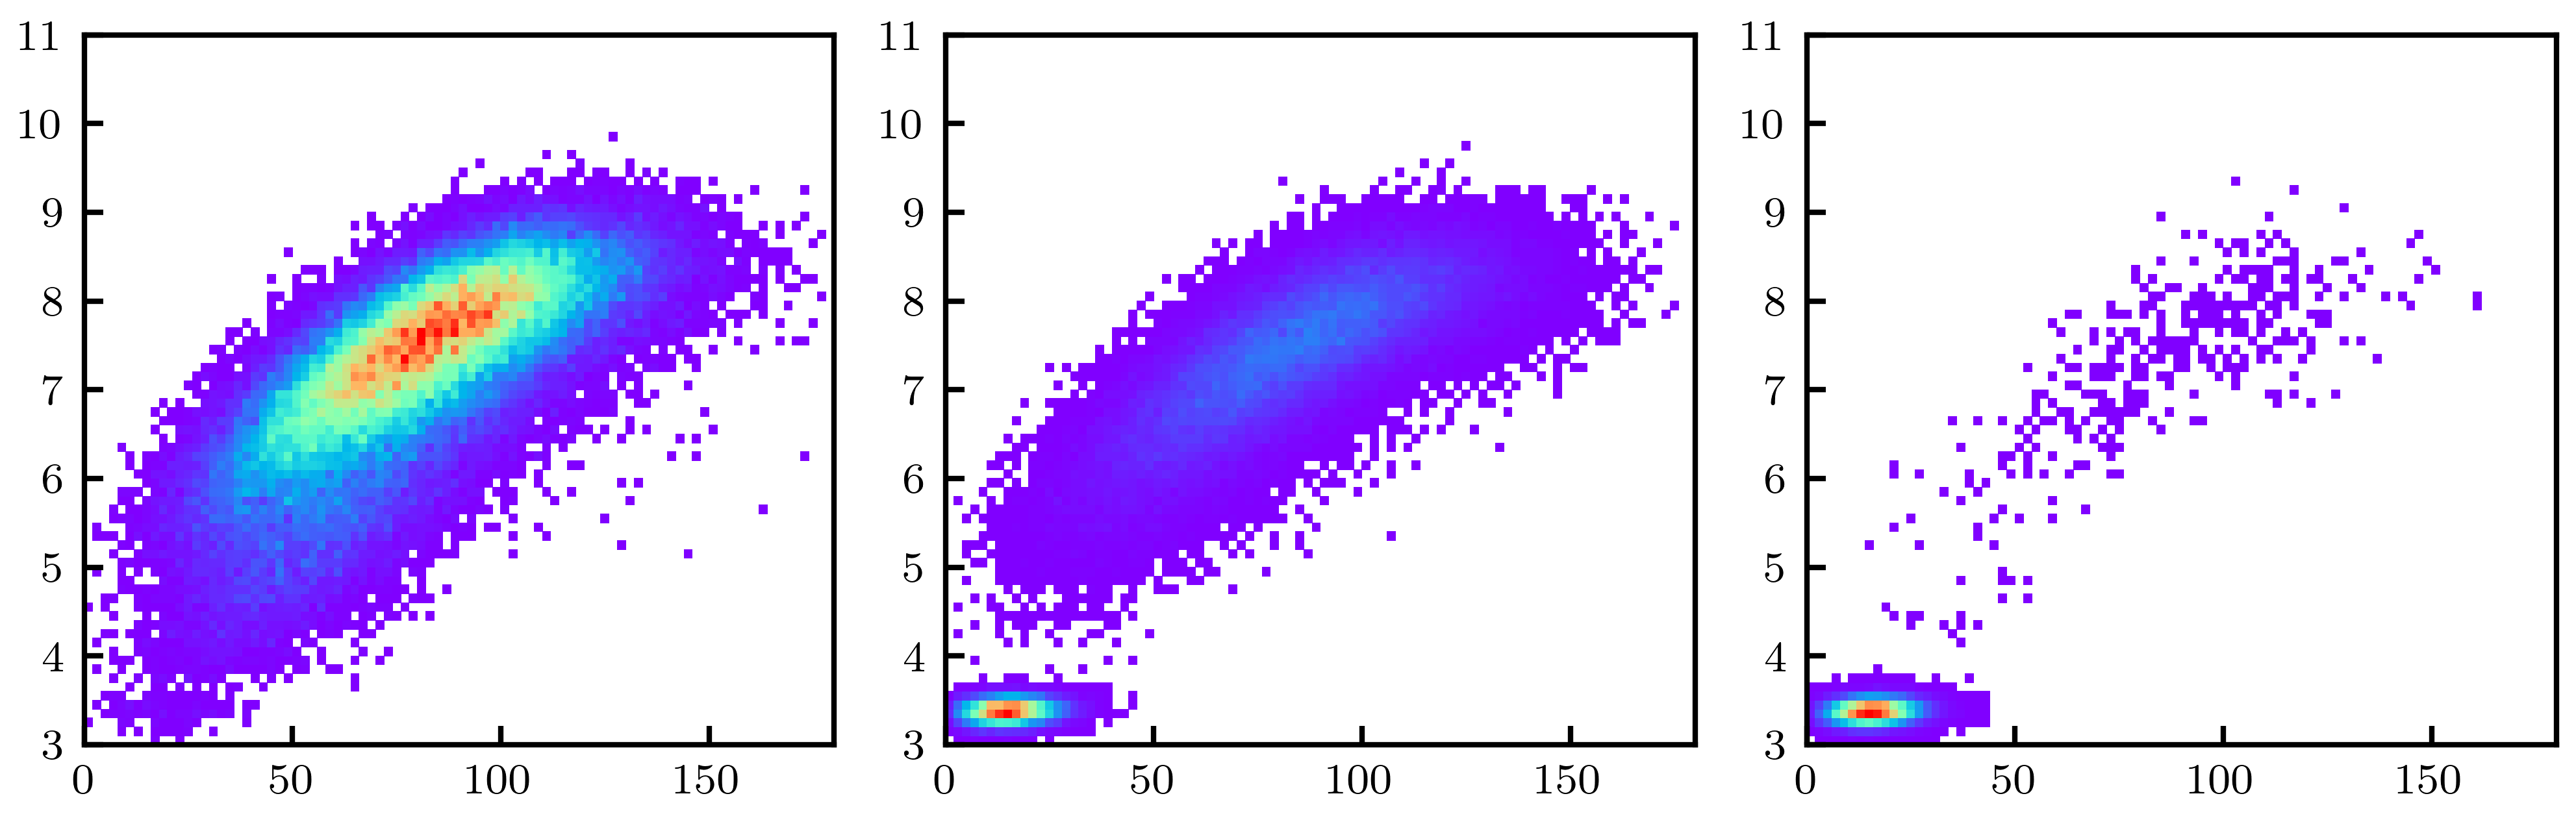

In [16]:

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(2.25*3, 2.25*1), dpi=600)

for icM, cM in enumerate((0.003, 0.004, 0.005)):
    dist = []
    for l in open('./three-way-junction/cM%6.4f.46_520_dist' % (cM,)):
        lsp = l.split()
        dist.append( float(lsp[0]) * 0.1)  # nm
    
    #aH2021 = []
    #aH2122 = []
    aH2022 = []
    for l in open('./three-way-junction/cM%6.4f.TWJ_angle' % (cM,)):
        lsp = l.split()
        #aH2021.append( float(lsp[0]) )
        #aH2122.append( float(lsp[1]) )
        aH2022.append( float(lsp[2]) )

    ############################### 
    H, xedges, yedges = np.histogram2d(aH2022, dist, bins=(90,80),
                                       range=[[0,180.0],[3,11]], density=True)
    
    # H needs to be rotated and flipped
    H = np.rot90(H)
    H = np.flipud(H)
 
    # Mask zeros
    Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value 
    
    axs[icM].pcolormesh(xedges,yedges,Hmasked, cmap='rainbow')

fig.savefig('TWJ_angle_dist_2D_3conc.png')

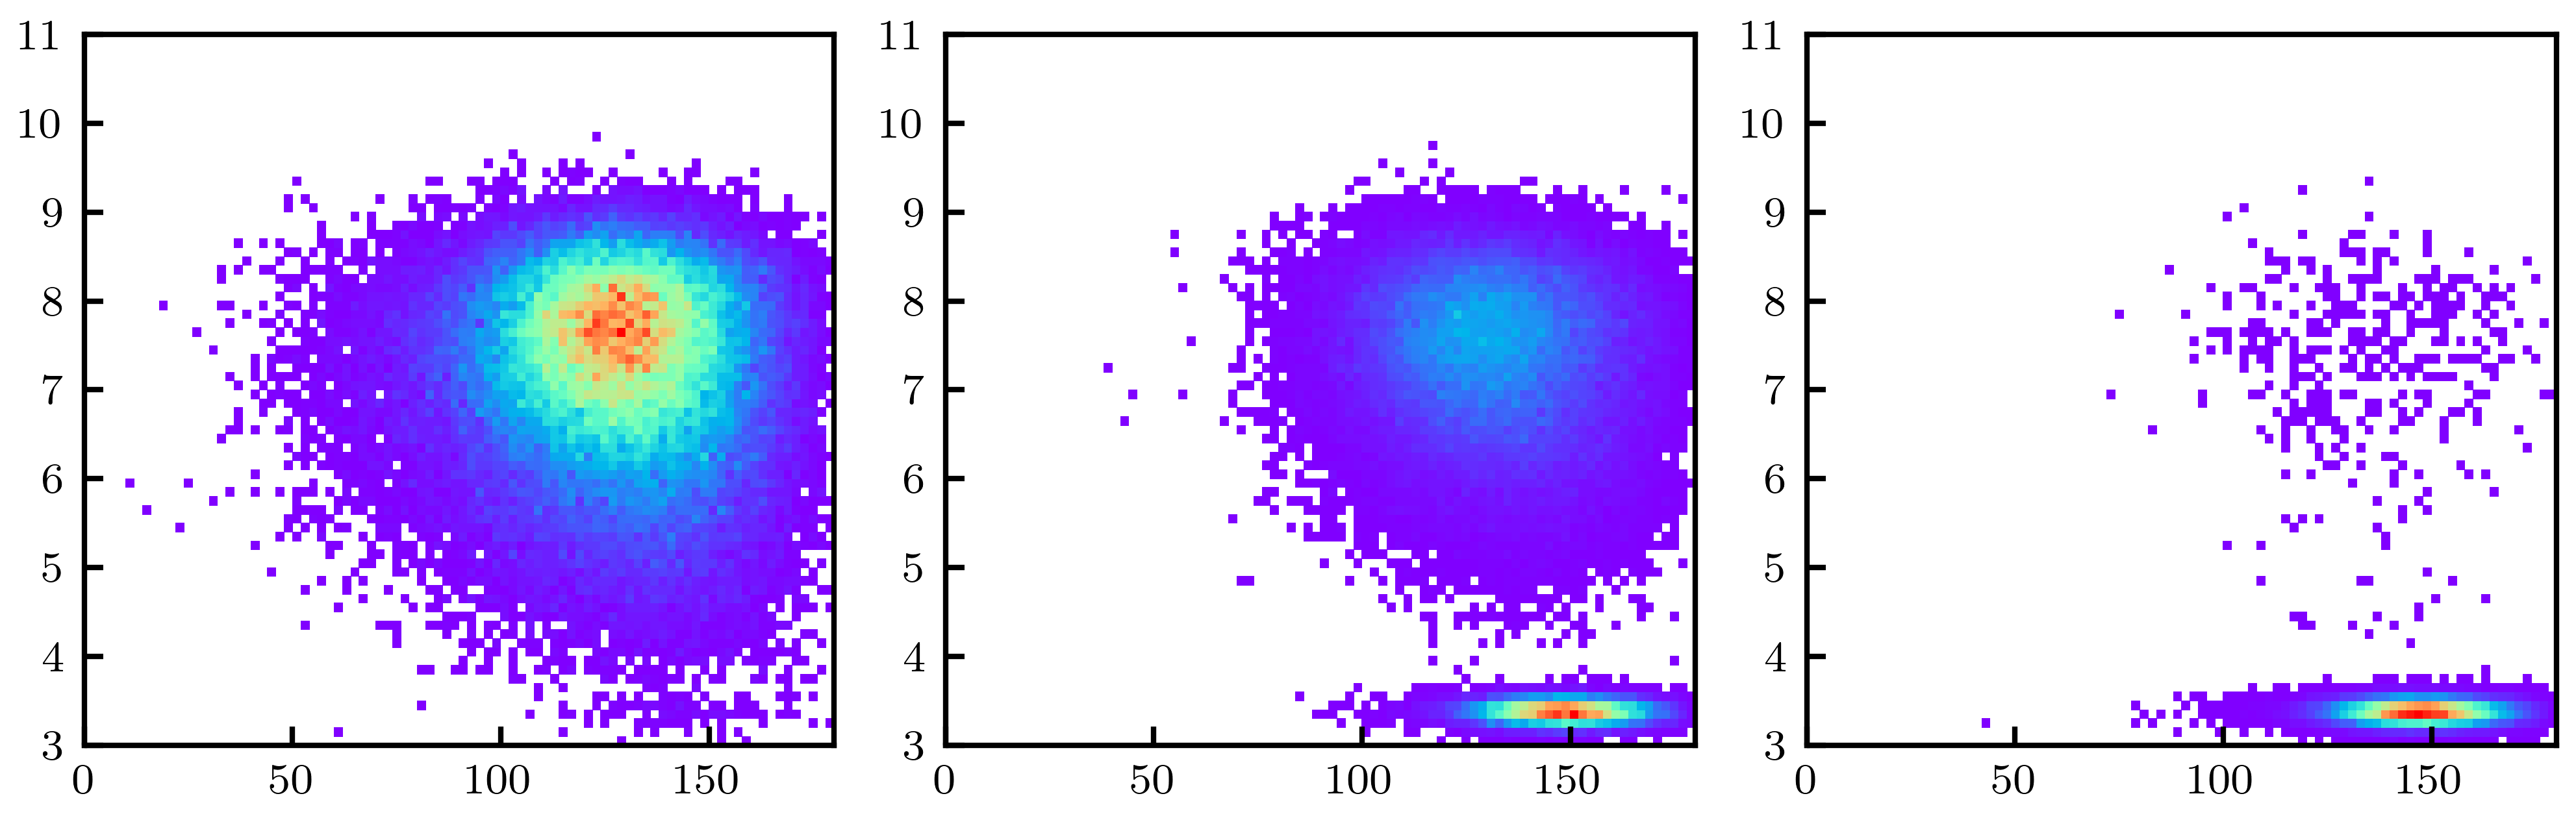

In [4]:

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(2.25*3, 2.25*1), dpi=600)

for icM, cM in enumerate((0.003, 0.004, 0.005)):
    dist = []
    for l in open('./three-way-junction/cM%6.4f.46_520_dist' % (cM,)):
        lsp = l.split()
        dist.append( float(lsp[0]) * 0.1)  # nm
    
    aH2021 = []
    #aH2122 = []
    #aH2022 = []
    for l in open('./three-way-junction/cM%6.4f.TWJ_angle' % (cM,)):
        lsp = l.split()
        aH2021.append( float(lsp[0]) )
        #aH2122.append( float(lsp[1]) )
        #aH2022.append( float(lsp[2]) )

    ############################### 
    H, xedges, yedges = np.histogram2d(aH2021, dist, bins=(90,80),
                                       range=[[0,180.0],[3,11]], density=True)
    
    # H needs to be rotated and flipped
    H = np.rot90(H)
    H = np.flipud(H)
 
    # Mask zeros
    Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value 
    
    axs[icM].pcolormesh(xedges,yedges,Hmasked, cmap='rainbow')

fig.savefig('TWJ_angle_dist_2D_H2021.png')

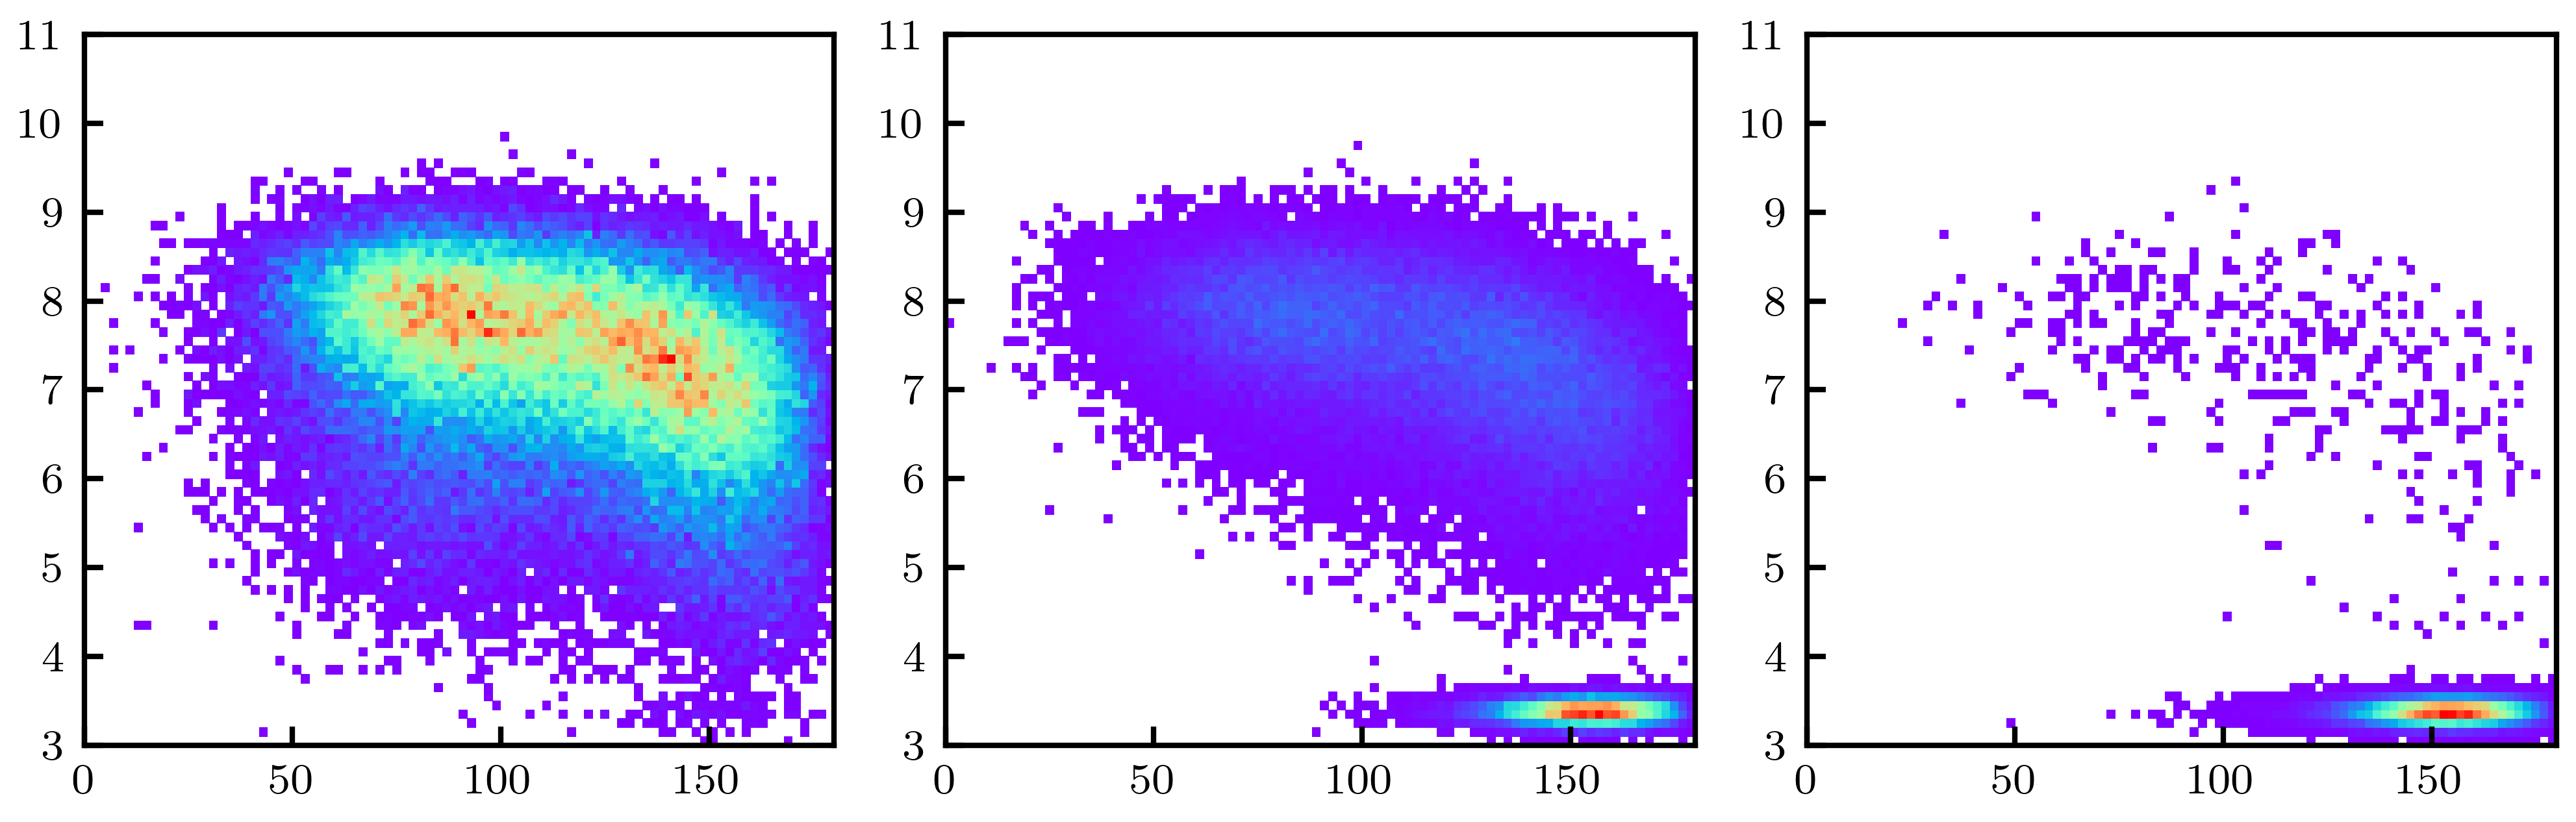

In [5]:

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(2.25*3, 2.25*1), dpi=600)

for icM, cM in enumerate((0.003, 0.004, 0.005)):
    dist = []
    for l in open('./three-way-junction/cM%6.4f.46_520_dist' % (cM,)):
        lsp = l.split()
        dist.append( float(lsp[0]) * 0.1)  # nm
    
    #aH2021 = []
    aH2122 = []
    #aH2022 = []
    for l in open('./three-way-junction/cM%6.4f.TWJ_angle' % (cM,)):
        lsp = l.split()
        #aH2021.append( float(lsp[0]) )
        aH2122.append( float(lsp[1]) )
        #aH2022.append( float(lsp[2]) )

    ############################### 
    H, xedges, yedges = np.histogram2d(aH2122, dist, bins=(90,80),
                                       range=[[0,180.0],[3,11]], density=True)
    
    # H needs to be rotated and flipped
    H = np.rot90(H)
    H = np.flipud(H)
 
    # Mask zeros
    Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value 
    
    axs[icM].pcolormesh(xedges,yedges,Hmasked, cmap='rainbow')

fig.savefig('TWJ_angle_dist_2D_H2122.png')

# SASA

## Extract structures and compute SASA

In [8]:
if INITIAL_RUN:
    os.mkdir('sasa')

In [7]:
if INITIAL_RUN:
    # Extract conformations at every 200 frames
    f_sh = open('sasa/extract.sh','w')

    for cM in cMs:
        f_sh.write('dcd_frame_extract_as_movie.py')
        f_sh.write(' ../dcd/cM%6.4f.dcd' % (cM,))
        f_sh.write(' %i' % (0,))
        f_sh.write(' %i' % (10000000,))
        f_sh.write(' %i' % (200,))
        f_sh.write(' ../MDcode/pdb/16SCD.cg.rna.pdb cM%6.4f.movie' % (cM,))
        f_sh.write('\n')

    f_sh.close()

In [11]:
if INITIAL_RUN:
    for cM in cMs:
        os.mkdir('./sasa/cM%6.4f_cg' % (cM,))
        os.mkdir('./sasa/cM%6.4f_aa' % (cM,))

In [14]:
if INITIAL_RUN:
    # Generate PDB
    for cM in cMs:
        fout = False
        for l in open('./sasa/cM%6.4f.movie' % (cM,)):
            if l[0:5] == 'MODEL':
                if fout:
                    fout.close()
                m = int(l.split()[1])
                fout = open('./sasa/cM%6.4f_cg/%010i.pdb' % (cM,m),'w')
                continue
            fout.write(l)
        fout.close()

In [18]:
if INITIAL_RUN:
    for cM in cMs:
        os.mkdir('./sasa/cM%6.4f_aamin' % (cM,))

In [19]:
if INITIAL_RUN:
    for cM in cMs:
        os.mkdir('./sasa/cM%6.4f_aamin_pops' % (cM,))

In [ ]:
# convert_pdb_pops.py

In [20]:
if INITIAL_RUN:
    for cM in cMs:
        os.mkdir('./sasa/cM%6.4f_frss' % (cM,))

In [ ]:
# submit_freesasa.py

## SASA of the native structure

execute 
```
freesasa -f pdb ../16SCD.pdb -o 16SCD.frss -e 16SCD.frss.err
```
on lakers

## Convert to SASA at residue level

In [6]:
import glob

N_NT = 346
res_sasa_cM = {}
n_sum_cM = {}

for cM in cMs:

    res_sasa = [0.0]*(N_NT+1)
    n_sum = [0]*(N_NT+1)
    
    files = glob.glob('./sasa/cM%6.4f_frss/*.pdb' % (cM,))
    
    for f in files:
        resID_save = -1
        sasa_save = 0.0

        for l in open(f):
            if l[0:4] != 'ATOM':
                continue
            
            atomname = l[13:16]
            if not atomname in ("C4'", "C5'"):
                continue
            
            resID = int(l[23:26])
            if resID != resID_save:
                if sasa_save != 0.0:
                    res_sasa[resID_save] += sasa_save
                    n_sum[resID_save] += 1
                    sasa_save = 0.0
                resID_save = resID

            SASA = float(l[60:66])
            if SASA > sasa_save:
                sasa_save = SASA

        if sasa_save != 0.0:
            res_sasa[resID_save] += sasa_save
            n_sum[resID_save] += 1
    
    res_sasa_cM[cM] = res_sasa
    n_sum_cM[cM] = n_sum



############# Native (PDB)
res_sasa_Native_C4 = [0.0]*(N_NT+1)
res_sasa_Native_C5 = [0.0]*(N_NT+1)
for l in open('./sasa/16SCD.frss'):
    if l[0:4] != 'ATOM':
        continue
    atomname = l[13:16]
    if not atomname in ("C4'", "C5'"):
        continue
    resID = int(l[23:26])
    if resID <= 841:
        resID -= 561
    else:
        resID -= 567
    
    SASA = float(l[60:66])

    if atomname == "C4'":
        res_sasa_Native_C4[resID] = SASA
    elif atomname == "C5'":
        res_sasa_Native_C5[resID] = SASA


############# Output
f_out = open('sasa/freesasa_C45larger_sasa.out','w')
f_out.write('#  1 resID\n')
f_out.write('#  2 SASA(PDB larger)\n')
f_out.write('#  3 SASA(PDB C4)\n')
f_out.write('#  4 SASA(PDB C5)\n')

for i, cM in enumerate(cMs):
    f_out.write('# %2i SASA(Mg=%6.4f)\n' % (5+i,cM,))

for i in range(1,N_NT+1):
    f_out.write('%3i' % i)
    if res_sasa_Native_C4[i] > res_sasa_Native_C5[i]:
        f_out.write(' %f' % (res_sasa_Native_C4[i],))
    else:
        f_out.write(' %f' % (res_sasa_Native_C5[i],))
    f_out.write(' %f' % (res_sasa_Native_C4[i],))
    f_out.write(' %f' % (res_sasa_Native_C5[i],))
    
    for cM in cMs:
        f_out.write(' %f' % (res_sasa_cM[cM][i] / float(n_sum_cM[cM][i]),))
    f_out.write('\n')

f_out.close()

SystemExit: 1

/home/hori/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3304: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## SASA Data load

In [22]:
sasa_res_PDB = []
sasa_res = {}
for cM in cMs:
    sasa_res[cM] = []

for l in open('sasa/freesasa_C45larger_sasa.out'):
    if l[0]=='#':
        continue
    lsp = l.split()
    sasa_res_PDB.append( float(lsp[1]) )
    for icM, cM in enumerate(cMs):
        sasa_res[cM].append( float(lsp[icM+4]) )


## Plot raw SASA values

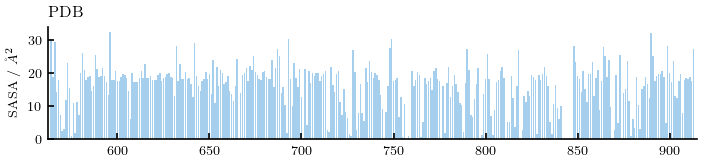

In [25]:
# PDB
fig, axs = plt.subplots(nrows=1, ncols=1,  figsize=(6,1.5*1), dpi= 120, sharex=False)

#x = np.arange(2,346+1)
x = np.append( np.arange(562,841+1), np.arange(848,913+1) )

ax = axs
ax.bar(x, sasa_res_PDB, color='#a5cfed')
ax.set_xbound(562, 915)
ax.set_ybound(0,)
ax.set_ylabel(r'SASA / $\AA^{2}$')
ax.set_title('PDB', loc='left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


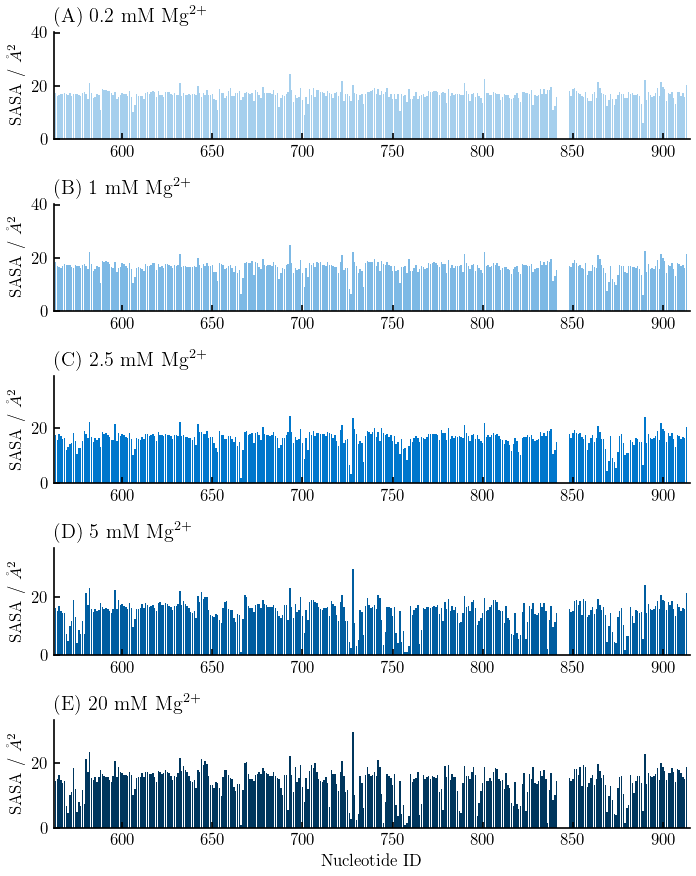

In [8]:
cM_plot = [0.0002, 0.001, 0.0025, 0.005, 0.020]
Nrows = len(cM_plot)

fig, axs = plt.subplots(nrows=Nrows, ncols=1,  figsize=(6,1.5*Nrows), dpi= 120, sharex=False)

#x = np.arange(2,346+1)
x = np.append( np.arange(562,841+1), np.arange(848,913+1) )


# 0.0002
icM = 0
cM = cM_plot[icM]
ax = axs[icM]
ax.bar(x, sasa_res[cM], color='#a5cfed')
ax.set_xbound(562, 915)
ax.set_ybound(0,)
ax.set_ylabel(r'SASA / $\AA^{2}$')
ax.set_title('(A) 0.2 mM Mg$^{2+}$', loc='left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# 0.001
icM = 1
cM = cM_plot[icM]
ax = axs[icM]
ax.bar(x, sasa_res[cM], color='#7db9e5')
ax.set_xbound(562, 915)
ax.set_ybound(0,)
ax.set_ylabel(r'SASA / $\AA^{2}$')
ax.set_title('(B) 1 mM Mg$^{2+}$', loc='left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


# 0.0025
icM = 2
cM = cM_plot[icM]
ax = axs[icM]
ax.bar(x, sasa_res[cM], color='#0077cc')
ax.set_xbound(562, 915)
ax.set_ybound(0,)
ax.set_ylabel(r'SASA / $\AA^{2}$')
ax.set_title('(C) 2.5 mM Mg$^{2+}$', loc='left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


# 0.005
icM = 3
cM = cM_plot[icM]
ax = axs[icM]
ax.bar(x, sasa_res[cM], color='#005da0')
ax.set_xbound(562, 915)
ax.set_ybound(0,)
ax.set_ylabel(r'SASA / $\AA^{2}$')
ax.set_title(r'(D) 5 mM Mg$^{2+}$', loc='left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# 0.020
icM = 4
cM = cM_plot[icM]
ax = axs[icM]
ax.bar(x, sasa_res[cM], color='#00365d')
ax.set_xbound(562, 915)
ax.set_ybound(0,)
ax.set_ylabel(r'SASA / $\AA^{2}$')
ax.set_title('(E) 20 mM Mg$^{2+}$', loc='left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Nucleotide ID')

fig.savefig('sasa.pdf', dpi=300)

## Calculate Protection Factors

In [29]:
if INITIAL_RUN:
    # PDB
    sasa_res_PF_PDB = []
    for i, sasa_U, sasa in zip(x,sasa_res[0.0000],sasa_res_PDB):
        pf = sasa_U / sasa
        sasa_res_PF_PDB.append(pf)
        
    # simulations
    sasa_res_PF = {}
    for cM in cMs:
        sasa_res_PF[cM] = []

        for i, sasa_U, sasa in zip(x,sasa_res[0.0000],sasa_res[cM]):
            pf = sasa_U / sasa
            sasa_res_PF[cM].append(pf)

    # Output 
    x = np.append( np.arange(562,841+1), np.arange(848,913+1) )
    
    f_out = open('sasa/sasa_PF_PDB.out','w')
    for i, pf in zip(x, sasa_res_PF_PDB):
        f_out.write('%3i %8.4f\n' % (i,pf))
    f_out.close()
    
    for cM in cMs:
        f_out = open('sasa/sasa_PF_cM%6.4f.out' % (cM,),'w')

        for i, pf in zip(x,sasa_res_PF[cM]):
            f_out.write('%3i %8.4f\n' % (i,pf))

        f_out.close()
        
else:
    
    # PDB
    sasa_res_PF_PDB = []
    for i, sasa_U, sasa in zip(x,sasa_res[0.0000],sasa_res_PDB):
        if sasa == 0.0:
            sasa = 0.01
        pf = sasa_U / sasa
        sasa_res_PF_PDB.append(pf)
        
    # Output 
    x = np.append( np.arange(562,841+1), np.arange(848,913+1) )
    
    f_out = open('sasa/sasa_PF_PDB.out','w')
    for i, pf in zip(x, sasa_res_PF_PDB):
        f_out.write('%3i %8.4f\n' % (i,pf))
    f_out.close()    
        
    sasa_res_PF = {}
    for cM in cMs:
        sasa_res_PF[cM] = []

        for l in open('sasa/sasa_PF_cM%6.4f.out' % (cM,)):

            pf = float(l.split()[1])
            sasa_res_PF[cM].append(pf)

## Plot Protection Factor (PF)

/home/hori/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/home/hori/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/hori/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


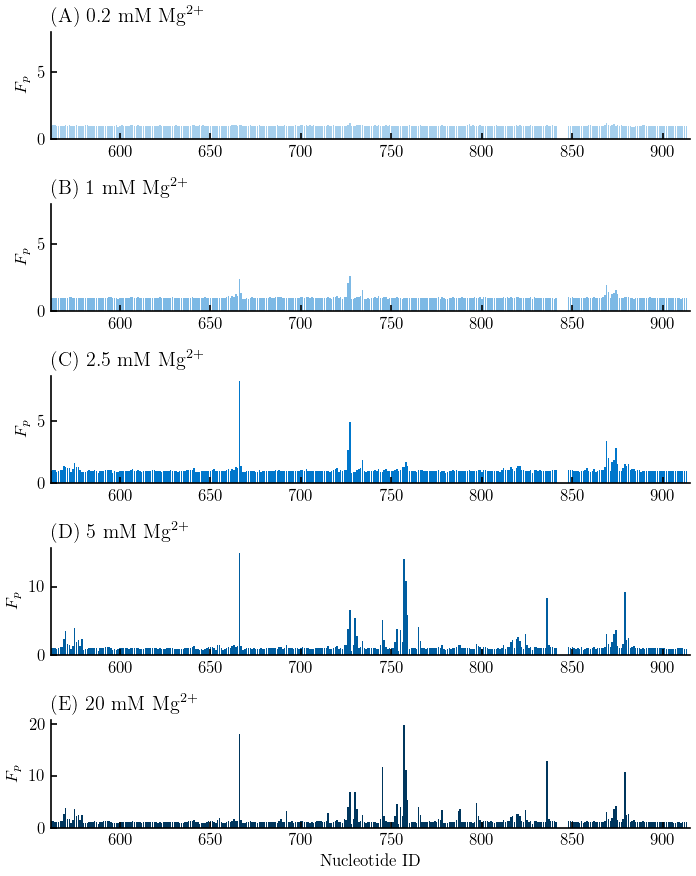

In [22]:

cM_plot = [0.0002, 0.001, 0.0025, 0.005, 0.020]
Nrows = len(cM_plot)

fig, axs = plt.subplots(nrows=Nrows, ncols=1,  figsize=(6,1.5*Nrows), dpi= 120, sharex=False)

#x = np.arange(2,346+1)
x = np.append( np.arange(562,841+1), np.arange(848,913+1) )


# 0.0002
icM = 0
cM = cM_plot[icM]
ax = axs[icM]
ax.bar(x, sasa_res_PF[cM], color='#a5cfed')
ax.set_xbound(562, 915)
ax.set_ybound(0,8)
ax.set_ylabel(r'$F_{p}$')
ax.set_title('(A) 0.2 mM Mg$^{2+}$', loc='left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# 0.001
icM = 1
cM = cM_plot[icM]
ax = axs[icM]
ax.bar(x, sasa_res_PF[cM], color='#7db9e5')
ax.set_xbound(562, 915)
ax.set_ybound(0,8)
ax.set_ylabel(r'$F_{p}$')
ax.set_title('(B) 1 mM Mg$^{2+}$', loc='left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


# 0.0025
icM = 2
cM = cM_plot[icM]
ax = axs[icM]
ax.bar(x, sasa_res_PF[cM], color='#0077cc')
ax.set_xbound(562, 915)
ax.set_ybound(0,)
ax.set_ylabel(r'$F_{p}$')
ax.set_title('(C) 2.5 mM Mg$^{2+}$', loc='left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


# 0.005
icM = 3
cM = cM_plot[icM]
ax = axs[icM]
ax.bar(x, sasa_res_PF[cM], color='#005da0')
ax.set_xbound(562, 915)
ax.set_ybound(0,)
ax.set_ylabel(r'$F_{p}$')
ax.set_title(r'(D) 5 mM Mg$^{2+}$', loc='left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# 0.020
icM = 4
cM = cM_plot[icM]
ax = axs[icM]
ax.bar(x, sasa_res_PF[cM], color='#00365d')
ax.set_xbound(562, 915)
ax.set_ybound(0,)
ax.set_ylabel(r'$F_{p}$')
ax.set_title('(E) 20 mM Mg$^{2+}$', loc='left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Nucleotide ID')

fig.savefig('sasa_res.pdf', dpi=300)

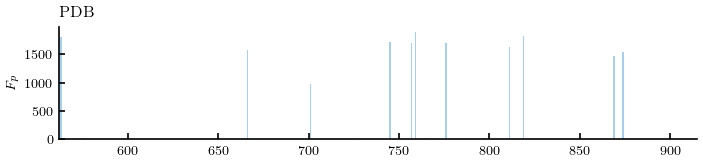

In [31]:
Nrows = 1
fig, axs = plt.subplots(nrows=Nrows, ncols=1,  figsize=(6,1.5*Nrows), dpi= 120, sharex=False)

#x = np.arange(2,346+1)
x = np.append( np.arange(562,841+1), np.arange(848,913+1) )

ax = axs
ax.bar(x, sasa_res_PF_PDB, color='#a5cfed')
ax.set_xbound(562, 915)
#ax.set_ybound(0,8)
ax.set_ylabel(r'$F_{p}$')
ax.set_title('PDB', loc='left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

## Plot Protection Factor (log scale)

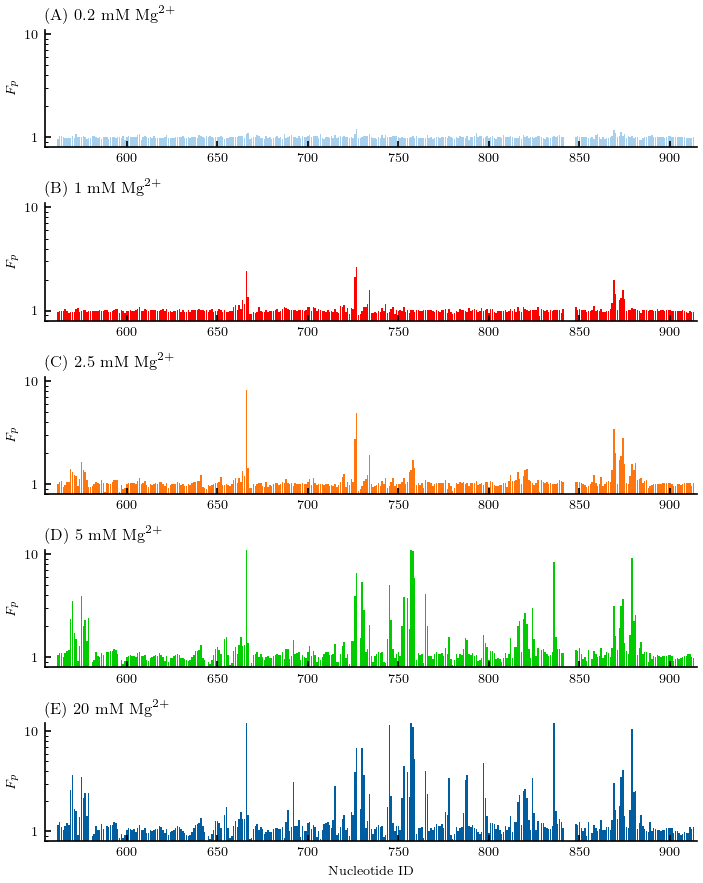

In [50]:
import matplotlib

cM_plot = [0.0002, 0.001, 0.0025, 0.005, 0.020]
Nrows = len(cM_plot)

fig, axs = plt.subplots(nrows=Nrows, ncols=1,  figsize=(6,1.5*Nrows), dpi= 120, sharex=False)

#x = np.arange(2,346+1)
x = np.append( np.arange(562,841+1), np.arange(848,913+1) )

# 0.0002
icM = 0
cM = cM_plot[icM]
ax = axs[icM]
ax.bar(x, sasa_res_PF[cM], color='#a5cfed')
ax.set_xbound(555, 915)
ax.set_ylabel(r'$F_{p}$')
ax.set_title('(A) 0.2 mM Mg$^{2+}$', loc='left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yscale('log')
ax.set_yticks([1,10])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_ybound(0.8,11)

# 0.001
icM = 1
cM = cM_plot[icM]
ax = axs[icM]
ax.bar(x, sasa_res_PF[cM], color='#fd0000')
ax.set_xbound(555, 915)
ax.set_ylabel(r'$F_{p}$')
ax.set_title('(B) 1 mM Mg$^{2+}$', loc='left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yscale('log')
ax.set_yticks([1,10])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_ybound(0.8,11)

# 0.0025
icM = 2
cM = cM_plot[icM]
ax = axs[icM]
ax.bar(x, sasa_res_PF[cM], color='#ff760e')
ax.set_xbound(555, 915)
ax.set_ylabel(r'$F_{p}$')
ax.set_title('(C) 2.5 mM Mg$^{2+}$', loc='left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yscale('log')
ax.set_yticks([1,10])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_ybound(0.8,11)

# 0.005
icM = 3
cM = cM_plot[icM]
ax = axs[icM]
#ax.bar(x, sasa_res_PF[cM], color='#005da0')
ax.bar(x, sasa_res_PF[cM], color='#00cc00')
ax.set_xbound(555, 915)
ax.set_ylabel(r'$F_{p}$')
ax.set_title(r'(D) 5 mM Mg$^{2+}$', loc='left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yscale('log')
ax.set_yticks([1,10])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_ybound(0.8,11)

# 0.020
icM = 4
cM = cM_plot[icM]
ax = axs[icM]
ax.bar(x, sasa_res_PF[cM], color='#005da0')
ax.set_xbound(555, 915)
ax.set_ylabel(r'$F_{p}$')
ax.set_title('(E) 20 mM Mg$^{2+}$', loc='left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Nucleotide ID')
ax.set_yscale('log')
ax.set_yticks([1,10])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_ybound(0.8,12)

fig.savefig('sasa_res_log.pdf', dpi=300)
fig.savefig('sasa_res_log.png', dpi=600)

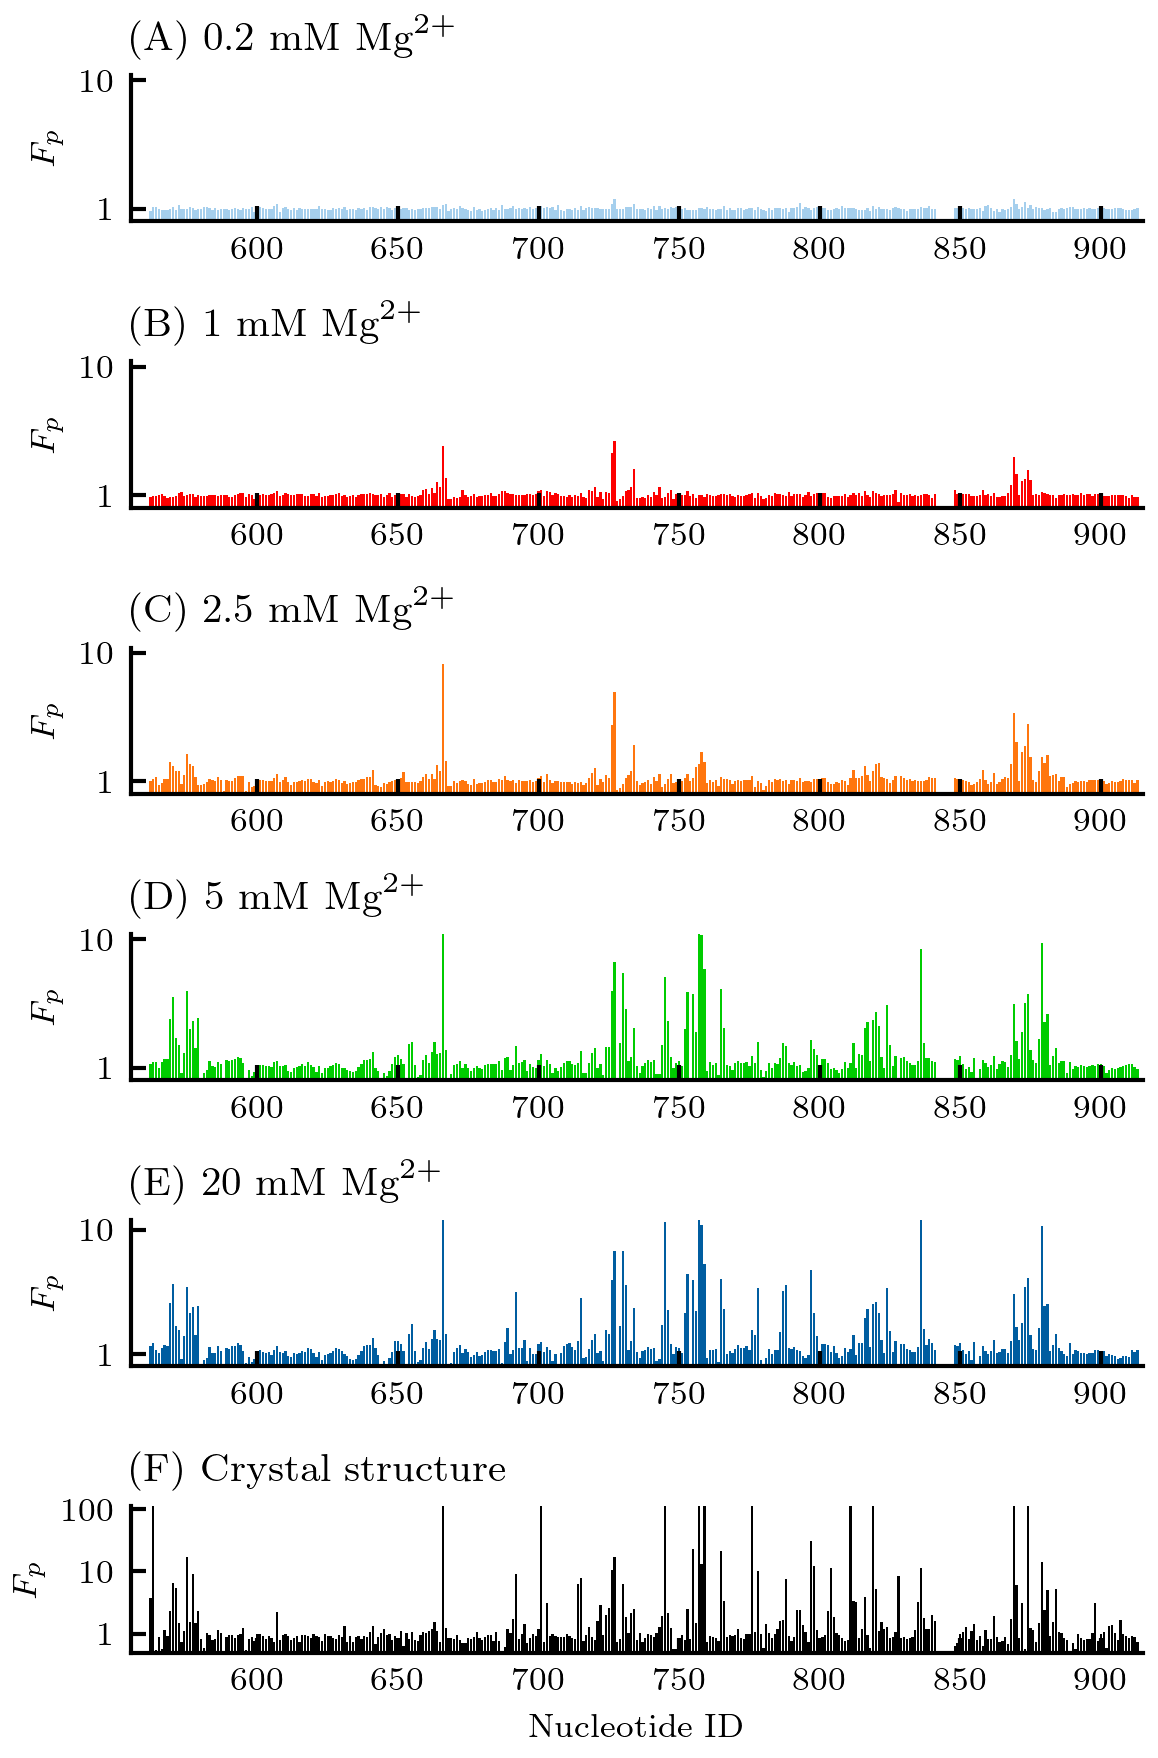

In [54]:
import matplotlib

cM_plot = [0.0002, 0.001, 0.0025, 0.005, 0.020]
Nrows = len(cM_plot) + 1

fig, axs = plt.subplots(nrows=Nrows, ncols=1,  figsize=(4,1*Nrows), dpi= 300, sharex=False)

#x = np.arange(2,346+1)
x = np.append( np.arange(562,841+1), np.arange(848,913+1) )

# 0.0002
icM = 0
cM = cM_plot[icM]
ax = axs[icM]
ax.bar(x, sasa_res_PF[cM], color='#a5cfed')
ax.set_xbound(555, 915)
ax.set_ylabel(r'$F_{p}$')
ax.set_title('(A) 0.2 mM Mg$^{2+}$', loc='left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yscale('log')
ax.set_yticks([1,10])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_ybound(0.8,11)

# 0.001
icM = 1
cM = cM_plot[icM]
ax = axs[icM]
ax.bar(x, sasa_res_PF[cM], color='#fd0000')
ax.set_xbound(555, 915)
ax.set_ylabel(r'$F_{p}$')
ax.set_title('(B) 1 mM Mg$^{2+}$', loc='left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yscale('log')
ax.set_yticks([1,10])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_ybound(0.8,11)

# 0.0025
icM = 2
cM = cM_plot[icM]
ax = axs[icM]
ax.bar(x, sasa_res_PF[cM], color='#ff760e')
ax.set_xbound(555, 915)
ax.set_ylabel(r'$F_{p}$')
ax.set_title('(C) 2.5 mM Mg$^{2+}$', loc='left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yscale('log')
ax.set_yticks([1,10])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_ybound(0.8,11)

# 0.005
icM = 3
cM = cM_plot[icM]
ax = axs[icM]
#ax.bar(x, sasa_res_PF[cM], color='#005da0')
ax.bar(x, sasa_res_PF[cM], color='#00cc00')
ax.set_xbound(555, 915)
ax.set_ylabel(r'$F_{p}$')
ax.set_title(r'(D) 5 mM Mg$^{2+}$', loc='left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yscale('log')
ax.set_yticks([1,10])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_ybound(0.8,11)

# 0.020
icM = 4
cM = cM_plot[icM]
ax = axs[icM]
ax.bar(x, sasa_res_PF[cM], color='#005da0')
ax.set_xbound(555, 915)
ax.set_ylabel(r'$F_{p}$')
ax.set_title('(E) 20 mM Mg$^{2+}$', loc='left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yscale('log')
ax.set_yticks([1,10])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_ybound(0.8,12)

ax = axs[-1]
ax.bar(x, sasa_res_PF_PDB, color='k')
ax.set_xbound(555, 915)
ax.set_ylabel(r'$F_{p}$')
ax.set_title('(F) Crystal structure', loc='left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yscale('log')
ax.set_yticks([1,10,100])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#ax.set_ybound(0.8,11)
ax.set_ybound(0.5,110)
ax.set_xlabel('Nucleotide ID')

fig.savefig('sasa_res_log_wPDB.pdf', dpi=300)
fig.savefig('sasa_res_log_wPDB.svg', dpi=300)
fig.savefig('sasa_res_log_wPDB.png', dpi=600)

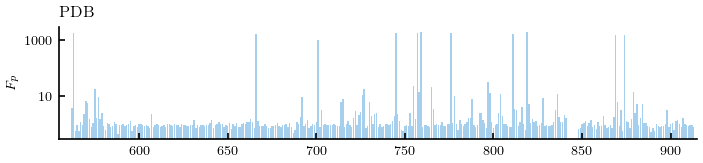

In [35]:
Nrows = 1
fig, axs = plt.subplots(nrows=Nrows, ncols=1,  figsize=(6,1.5*Nrows), dpi= 120, sharex=False)

#x = np.arange(2,346+1)
x = np.append( np.arange(562,841+1), np.arange(848,913+1) )

ax = axs
ax.bar(x, sasa_res_PF_PDB, color='#a5cfed')
ax.set_xbound(555, 915)
ax.set_ylabel(r'$F_{p}$')
ax.set_title('PDB', loc='left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yscale('log')
#ax.set_yticks([1,10])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#ax.set_ybound(0.8,11)

In [33]:
## Extract nucleotide IDs whose PF is higher than 2.0

f_out = open('sasa_PF_ntIDs_higherthan2.txt','w')

cM_plot = [0.0002, 0.001, 0.0025, 0.005, 0.020]

for cM in cM_plot:
    
    f_out.write('######\n')
    f_out.write('# %f\n' % (cM,))
    print ('#######')
    print ('# %f' % (cM,))
    
    for i, pf in zip(x, sasa_res_PF[cM]):
        if pf > 2.0:
            print (i, end =" ")
            f_out.write(' %i' % (i,))
    
    f_out.write('\n\n')
    print ('')
    print ('')
f_out.close()

#######
# 0.000200


#######
# 0.001000
666 726 727 

#######
# 0.002500
666 726 727 869 870 874 

#######
# 0.005000
569 570 575 576 577 579 666 726 727 730 731 734 745 746 752 753 755 757 758 759 765 766 816 817 819 820 821 824 836 869 873 874 879 880 881 

#######
# 0.020000
569 570 575 576 577 579 666 692 715 726 727 730 731 734 745 746 752 753 755 756 757 758 759 765 766 778 787 788 797 798 817 819 820 821 824 836 869 873 874 879 880 881 



# P(r)

## Whole fragment

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


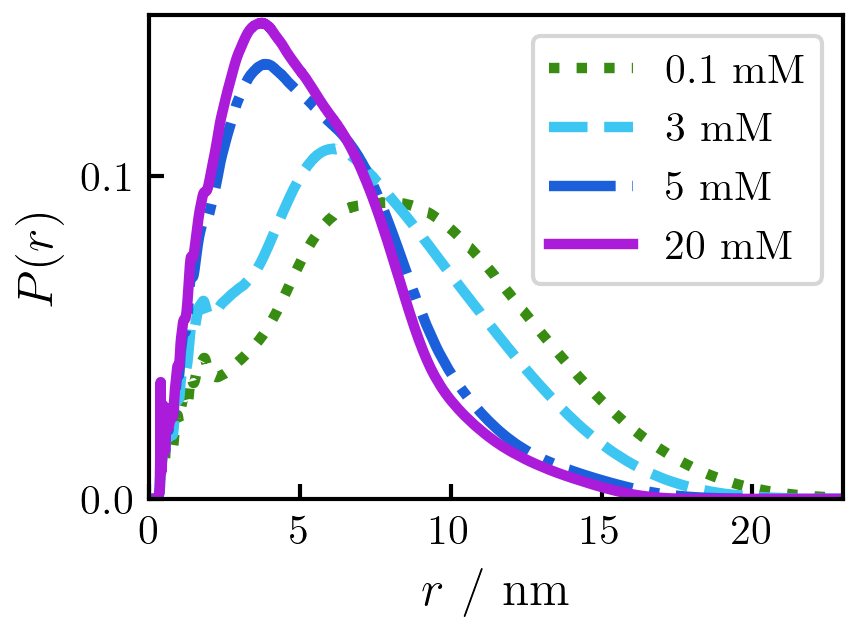

In [62]:
fig, ax = plt.subplots(figsize=(3,2.25), dpi=300)

# 0.1 mM Mg
x = []
y = []
for l in open('./Pr/cM0.0001.Pr'):
    if l[0] == '#':
        continue
    lsp = [float(c) for c in l.split()]
    x.append(0.1*0.5*(lsp[0]+lsp[1])) # nm
    y.append(10*lsp[3])
ax.plot(x,y,label='0.1 mM',linestyle=':',c='#378C11ff',linewidth=2.5)

# 3 mM Mg
x = []
y = []
for l in open('./Pr/cM0.0030.Pr'):
    if l[0] == '#':
        continue
    lsp = [float(c) for c in l.split()]
    x.append(0.1*0.5*(lsp[0]+lsp[1])) # nm
    y.append(10*lsp[3])
ax.plot(x,y,label='3 mM',linestyle='--',c='#3DC6F1ff',linewidth=2.5)

# 5 mM Mg
x = []
y = []
for l in open('./Pr/cM0.0050.Pr'):
    if l[0] == '#':
        continue
    lsp = [float(c) for c in l.split()]
    x.append(0.1*0.5*(lsp[0]+lsp[1])) # nm
    y.append(10*lsp[3])
ax.plot(x,y,label='5 mM',linestyle='-.',c='#1B60DAff',linewidth=2.5)

# 20 mM Mg
x = []
y = []
for l in open('./Pr/cM0.0200.Pr'):
    if l[0] == '#':
        continue
    lsp = [float(c) for c in l.split()]
    x.append(0.1*0.5*(lsp[0]+lsp[1])) # nm
    y.append(10*lsp[3])
ax.plot(x,y,label='20 mM',linestyle='-',c='#AB1BDAff',linewidth=2.5)

ax.set_xlim(0,23)
ax.set_ylim(0,0.15)
ax.set_yticks((0.0,0.1))
ax.set_ylabel(r'$P(r)$', fontsize=12)
ax.set_xlabel(r'$r$ / nm', fontsize=12)
ax.set_xticklabels((0,5,10,15,20),fontsize=10)
ax.set_yticklabels((0.0,0.1), fontsize=10)
ax.legend(fontsize=10)

fig.savefig('Pr.pdf')
fig.savefig('Pr.svg')

## Fragment except h21 and h27

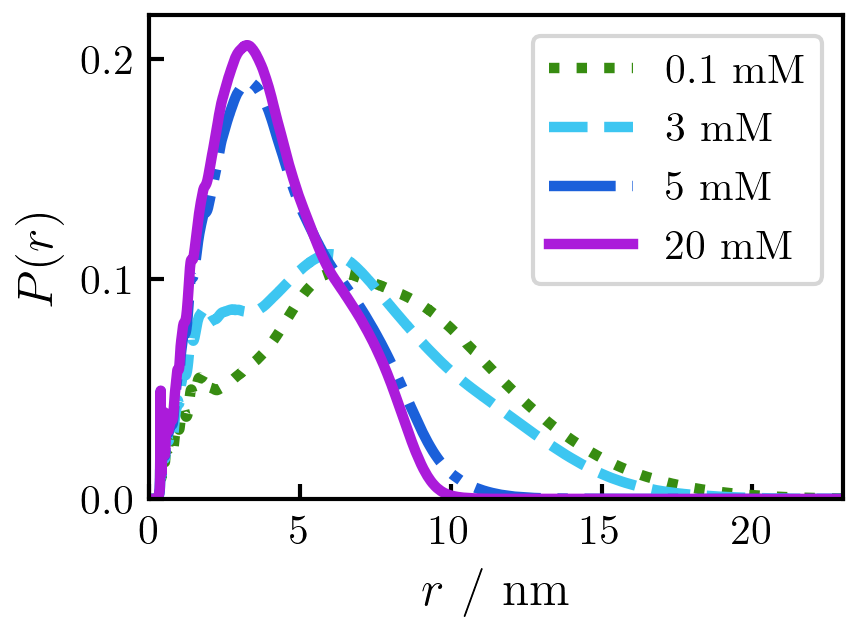

In [63]:
fig, ax = plt.subplots(figsize=(3,2.25), dpi=300)

# 0.1 mM Mg
x = []
y = []
for l in open('./Pr_cut/cM0.0001.Pr'):
    if l[0] == '#':
        continue
    lsp = [float(c) for c in l.split()]
    x.append(0.1*0.5*(lsp[0]+lsp[1])) # nm
    y.append(10*lsp[3])
ax.plot(x,y,label='0.1 mM',linestyle=':',c='#378C11ff',linewidth=2.5)

# 3 mM Mg
x = []
y = []
for l in open('./Pr_cut/cM0.0030.Pr'):
    if l[0] == '#':
        continue
    lsp = [float(c) for c in l.split()]
    x.append(0.1*0.5*(lsp[0]+lsp[1])) # nm
    y.append(10*lsp[3])
ax.plot(x,y,label='3 mM',linestyle='--',c='#3DC6F1ff',linewidth=2.5)

# 5 mM Mg
x = []
y = []
for l in open('./Pr_cut/cM0.0050.Pr'):
    if l[0] == '#':
        continue
    lsp = [float(c) for c in l.split()]
    x.append(0.1*0.5*(lsp[0]+lsp[1])) # nm
    y.append(10*lsp[3])
ax.plot(x,y,label='5 mM',linestyle='-.',c='#1B60DAff',linewidth=2.5)

# 20 mM Mg
x = []
y = []
for l in open('./Pr_cut/cM0.0200.Pr'):
    if l[0] == '#':
        continue
    lsp = [float(c) for c in l.split()]
    x.append(0.1*0.5*(lsp[0]+lsp[1])) # nm
    y.append(10*lsp[3])
ax.plot(x,y,label='20 mM',linestyle='-',c='#AB1BDAff',linewidth=2.5)

ax.set_xlim(0,23)
ax.set_ylim(0,0.22)
ax.set_yticks((0.0,0.1,0.2))
ax.set_ylabel(r'$P(r)$', fontsize=12)
ax.set_xlabel(r'$r$ / nm', fontsize=12)
ax.set_xticklabels((0,5,10,15,20),fontsize=10)
ax.set_yticklabels((0.0,0.1,0.2), fontsize=10)
ax.legend(fontsize=10)

fig.savefig('Pr_cut.pdf')
fig.savefig('Pr_cut.svg')

# Shape parameters

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


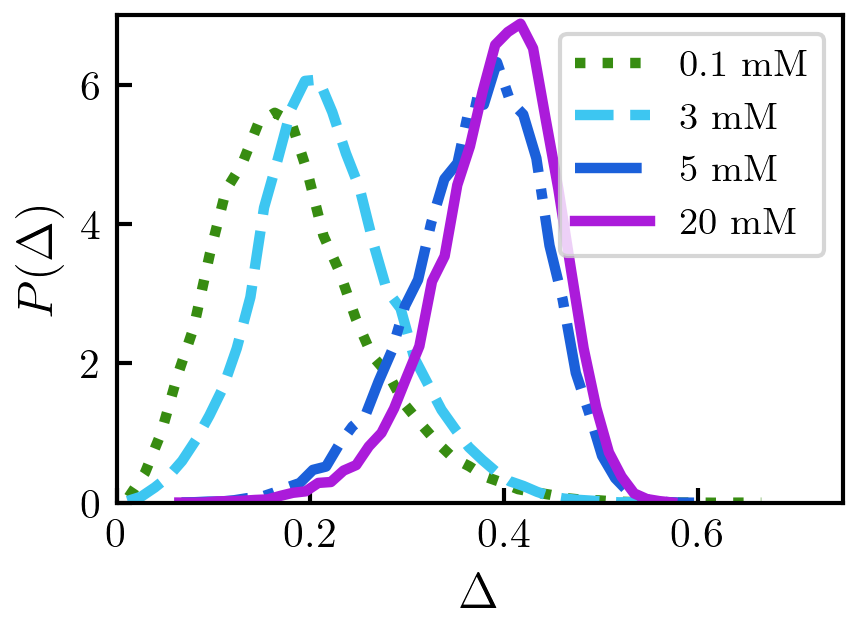

In [66]:
import numpy as np

NBINS = 40
fig, ax = plt.subplots(figsize=(3,2.25), dpi=300)

# 0.1 mM Mg
data = []
for l in open('./shape/cM0.0001.shape'):
    data.append(float(l.split()[1]))
hist, bins = np.histogram(data,bins=NBINS,density=True)
ax.plot([0.5*(bins[i]+bins[i+1]) for i in range(len(hist))]
        ,hist, label='0.1 mM',linestyle=':',c='#378C11ff',linewidth=2.5)

# 3 mM Mg
data = []
for l in open('./shape/cM0.0030.shape'):
    data.append(float(l.split()[1]))
hist, bins = np.histogram(data,bins=NBINS,density=True)
ax.plot([0.5*(bins[i]+bins[i+1]) for i in range(len(hist))]
        ,hist, label='3 mM',linestyle='--',c='#3DC6F1ff',linewidth=2.5)

# 5 mM Mg
data = []
for l in open('./shape/cM0.0050.shape'):
    data.append(float(l.split()[1]))
hist, bins = np.histogram(data,bins=NBINS,density=True)
ax.plot([0.5*(bins[i]+bins[i+1]) for i in range(len(hist))]
        ,hist, label='5 mM',linestyle='-.',c='#1B60DAff',linewidth=2.5)

# 20 mM Mg
data = []
for l in open('./shape/cM0.0200.shape'):
    data.append(float(l.split()[1]))
hist, bins = np.histogram(data,bins=NBINS,density=True)
ax.plot([0.5*(bins[i]+bins[i+1]) for i in range(len(hist))]
        ,hist, label='20 mM',linestyle='-',c='#AB1BDAff',linewidth=2.5)

ax.set_xlim(0,0.75)
ax.set_ylim(0,7)
ax.set_ylabel(r'$P(\Delta)$', fontsize=12)
ax.set_xlabel(r'$\Delta$', fontsize=12)
ax.set_xticks((0,0.2,0.4,0.6))
ax.set_xticklabels((0,0.2,0.4,0.6), fontsize=10)
ax.set_yticks((0,2,4,6))
ax.set_yticklabels((0,2,4,6), fontsize=10)
ax.legend(fontsize=9)

fig.savefig('shape_delta.pdf')
fig.savefig('shape_delta.svg')

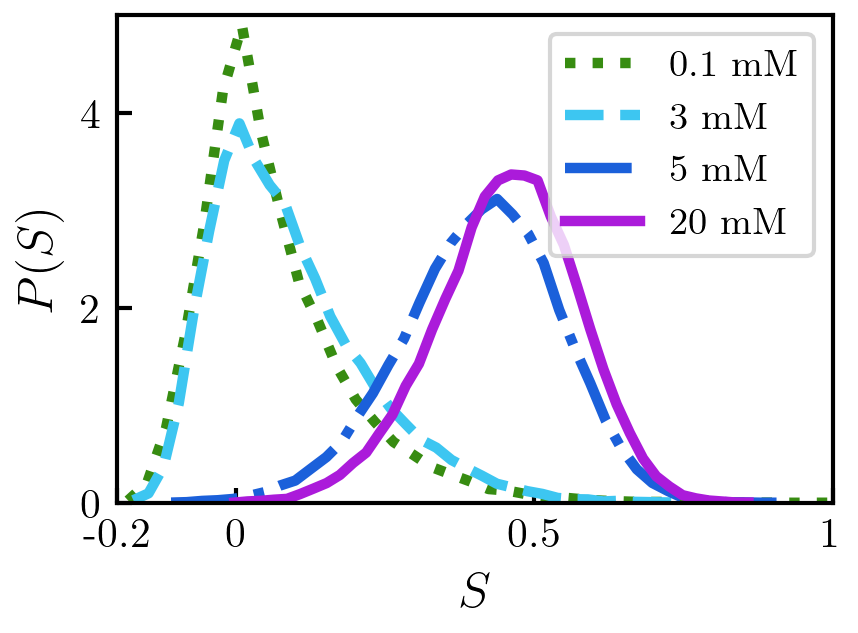

In [67]:
import numpy as np

NBINS = 40
fig, ax = plt.subplots(figsize=(3,2.25), dpi=300)

# 0.1 mM Mg
data = []
for l in open('./shape/cM0.0001.shape'):
    data.append(float(l.split()[2]))
hist, bins = np.histogram(data,bins=NBINS,density=True)
ax.plot([0.5*(bins[i]+bins[i+1]) for i in range(len(hist))]
        ,hist, label='0.1 mM',linestyle=':',c='#378C11ff',linewidth=2.5)

# 3 mM Mg
data = []
for l in open('./shape/cM0.0030.shape'):
    data.append(float(l.split()[2]))
hist, bins = np.histogram(data,bins=NBINS,density=True)
ax.plot([0.5*(bins[i]+bins[i+1]) for i in range(len(hist))]
        ,hist, label='3 mM',linestyle='--',c='#3DC6F1ff',linewidth=2.5)

# 5 mM Mg
data = []
for l in open('./shape/cM0.0050.shape'):
    data.append(float(l.split()[2]))
hist, bins = np.histogram(data,bins=NBINS,density=True)
ax.plot([0.5*(bins[i]+bins[i+1]) for i in range(len(hist))]
        ,hist, label='5 mM',linestyle='-.',c='#1B60DAff',linewidth=2.5)

# 20 mM Mg
data = []
for l in open('./shape/cM0.0200.shape'):
    data.append(float(l.split()[2]))
hist, bins = np.histogram(data,bins=NBINS,density=True)
ax.plot([0.5*(bins[i]+bins[i+1]) for i in range(len(hist))]
        ,hist, label='20 mM',linestyle='-',c='#AB1BDAff',linewidth=2.5)

ax.set_xlim(-0.2,1.0)
ax.set_ylim(0,5)
ax.set_ylabel(r'$P(S)$', fontsize=12)
ax.set_xlabel(r'$S$', fontsize=12)
ax.set_xticks((-0.2,0,0.5,1))
ax.set_xticklabels((-0.2,0,0.5,1), fontsize=10)
ax.set_yticks((0,2,4))
ax.set_yticklabels((0,2,4), fontsize=10)
ax.legend(fontsize=9)

fig.savefig('shape_S.pdf')
fig.savefig('shape_S.svg')

# Spacial distribution of Mg

## Align trajectory with the crystal structure excluding h21 and h27

In [ ]:


f_sh = open('rmsd_excludeH21H27.sh','w')
for cM in cMs:
    f_sh.write('bestfit_dcd_by_pdb_part_onlyRMSD.py')
    f_sh.write(' ./make_ninfo/16SCD_ninfo.cg.pdb ./dcd/cM%6.4f.dcd 1 77 270 950' % (cM,))
    f_sh.write(' > rmsd/cM%6.4f.excludeH21H27.rmsd\n' % (cM,))
f_sh.close()